In [ ]:
import re
import os
import pandas as pd 
import numpy as np 
import csv
import base64
import glob
from scipy.stats import zscore
import pandas as pd

In [ ]:
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6


In [ ]:
# OASIS subjects
!gdown 1_iQKcOhqtCPrta3Cz0pjbO02C2VaQ4wV -O data.rar

Downloading...
From (uriginal): https://drive.google.com/uc?id=1_iQKcOhqtCPrta3Cz0pjbO02C2VaQ4wV
From (redirected): https://drive.google.com/uc?id=1_iQKcOhqtCPrta3Cz0pjbO02C2VaQ4wV&confirm=t&uuid=c1fff6b3-5534-496b-b9d8-bad65fce3b8a
To: /content/data.rar
100% 314M/314M [00:02<00:00, 136MB/s]


In [ ]:
!mkdir subjects

In [ ]:
!unrar x "/content/data.rar" "/content/subjects/"
!rm -r "data.rar"


UNRAR 5.61 beta 1 freeware      Copyright (c) 1993-2018 Alexander Roshal


Extracting from /content/data.rar

Extracting  /content/subjects/ana_press_6_esfand.csv                       0%  OK 
Extracting  /content/subjects/ana_press_all.csv                            1%  OK 
Extracting  /content/subjects/asriran_6_esfand.csv                         1%  OK 
Extracting  /content/subjects/asriran_all.csv                              3%  4%  5%  6%  OK 
Extracting  /content/subjects/entekhab_6_esfand.csv                        6%  OK 
Extracting  /content/subjects/entekhab_all.csv                             7%  9% 10% 11% 13% 14% 15%  OK 
Extracting  /content/subjects/farsnews_6_esfand.csv                       15%  OK 
Extracting  /content/subjects/farsnews_all.csv                            16% 18% 19% 21% 22% 23% 25% 26% 27% 29%  OK 
Extractin

In [ ]:
log_6_esfand = pd.read_csv('./subjects/ana_press_6_esfand.csv', encoding='utf8')
log_all = pd.read_csv('./subjects/ana_press_all.csv', encoding='utf8')
log_6_esfand.tail()

,@timestamp,message
2164,"Feb 24, 2023 @ 23:47:45.200","{""levelname"": ""INFO"", ""message"": ""producing ur..."
2165,"Feb 24, 2023 @ 23:33:45.581","{""levelname"": ""INFO"", ""message"": ""producing ur..."
2166,"Feb 24, 2023 @ 23:33:12.460","{""levelname"": ""INFO"", ""message"": ""producing ur..."
2167,"Feb 24, 2023 @ 23:10:57.044","{""levelname"": ""INFO"", ""message"": ""producing ur..."
2168,"Feb 24, 2023 @ 23:10:30.640","{""levelname"": ""INFO"", ""message"": ""producing ur..."


In [ ]:
log_all.tail()

,url,html
1954,https://ana.press/fa/news/801006/%D8%A7%D8%B9%...,PGh0bWw+PGJvZHk+PGgxPjQwMyBGb3JiaWRkZW48L2gxPg...
1955,https://ana.press/fa/news/515601/-%D8%B4%D9%87...,PCFET0NUWVBFIGh0bWw+IDxodG1sPiA8aGVhZD4gICAgIC...
1956,https://ana.press/fa/news/515601/-%D8%B4%D9%87...,PCFET0NUWVBFIGh0bWw+IDxodG1sPiA8aGVhZD4gICAgIC...
1957,https://ana.press/fa/news/359275/%D8%A7%DB%8C%...,PGh0bWw+PGJvZHk+PGgxPjQwMyBGb3JiaWRkZW48L2gxPg...
1958,https://ana.press/fa/news/359275/%D8%A7%DB%8C%...,PGh0bWw+PGJvZHk+PGgxPjQwMyBGb3JiaWRkZW48L2gxPg...


In [ ]:
!mkdir dataset_text
!mkdir dataset_unknown_text

In [ ]:
# !rm -r /content/dataset_text
# !rm -r /content/dataset_unknown_text

In [ ]:
counter_yes = 0
counter_no = 0

file_addr = glob.glob(os.path.join('/content/subjects','*_all.csv'))
for file in file_addr:
  site_name = (file.split('_')[0]).split('/')[-1]
  print(file, 'is processing...')
  test = pd.read_csv(file, encoding='utf8', on_bad_lines='skip')

  for i in range(len(test['html'])):
    html_string = base64.b64decode(test['html'][i]) # type:byte
    try:
      b = html_string.decode("utf8") # type:string
    except:
      b = html_string.decode("latin-1") # type:string
    
    if 'description' in b:
      counter_yes += 1
      address_txt = f'/content/dataset_text/{site_name}_{i}.txt'
      with open(address_txt, "w") as text_file:
        text_file.write(b)

    else:
      counter_no += 1
      address_txt = f'/content/dataset_unknown_text/{site_name}_{i}.txt'
      with open(address_txt, "w") as text_file:
        text_file.write(b)

/content/subjects/varzesh3_all.csv is processing...
/content/subjects/entekhab_all.csv is processing...
/content/subjects/yjcnews_all.csv is processing...
/content/subjects/isna_all.csv is processing...
/content/subjects/mehrnews_all.csv is processing...
/content/subjects/farsnews_all.csv is processing...
/content/subjects/asriran_all.csv is processing...
/content/subjects/shana_all.csv is processing...
/content/subjects/ana_press_all.csv is processing...
/content/subjects/khabaronline_all.csv is processing...
/content/subjects/mashreghnews_all.csv is processing...
/content/subjects/jahannews_all.csv is processing...
/content/subjects/iscanews_all.csv is processing...
/content/subjects/tasnimnews_all.csv is processing...


In [ ]:
print(counter_yes, counter_no)

81206 2705


In [ ]:
lst = os.listdir('/content/dataset_text') # directory path
len(lst)

81206

In [ ]:
lst = os.listdir('/content/dataset_unknown_text') # directory path
len(lst)

2705

# main

# sample html

In [1]:
html_doc2 = """

<!DOCTYPE html>
<html class="no-js" lang="fa" xmlns="http://www.w3.org/1999/xhtml"><head id="j_id_4"><link type="text/css" rel="stylesheet" href="/javax.faces.resource/theme.css.xhtml?ln=primefaces-aristo" /><script type="text/javascript">if(window.PrimeFaces){PrimeFaces.settings.locale='fa_IR';}</script>
        <title>محسنی اژه‌ای: باید به تقویت اقتصاد، رشد تولید و جلوگیری از کاهش ارزش پول ملی کمک کنیم - ایسنا
        </title>
    <meta itemprop="inLanguage" content="fa-IR" />
    <meta itemprop="name" name="twitter:title" property="dc.title" content="محسنی اژه‌ای: باید به تقویت اقتصاد، رشد تولید و جلوگیری از کاهش ارزش پول ملی کمک کنیم" />
    <meta name="description" property="dc.description" content="رئیس قوه قضاییه گفت: اگر بخواهیم عدالت اجتماعی را بسط دهیم باید به تقویت اقتصاد و رشد تولید و جلوگیری از کاهش ارزش پول ملی، کمک کنیم." />
    <meta property="og:type" content="article" />
    <meta name="twitter:url" property="og:url" content="https://www.isna.ir/news/1402011707797/محسنی-اژه-ای-باید-به-تقویت-اقتصاد-رشد-تولید-و-جلوگیری-از-کاهش" />
    <meta property="article:modified_time" content="2023-04-06T16:28:45Z" />
    <meta property="article:section" content="سیاسی &gt; حقوقی و قضایی" />
    <meta name="keywords" property="article:tag" content="استانی-سیاسی,شعار سال 1402" />
    <meta name="twitter:creator" property="article:author" content="" />
    <meta property="nastooh:topic" content="Politics" />
    <meta property="nastooh:subtopic" content="6006" />
    <meta property="nastooh:pageType" content="news" />
    <meta property="nastooh:newsType" content="coverage" />
    <meta property="nastooh:publishDate" content="2023-04-06" />
    <meta property="nastooh:commentCount" content="na" />
    <meta property="nastooh:keywordCount" content="2" />
    <meta property="nastooh:bodyWordCount" content="large" />
    <meta property="nastooh:code" content="1402011707797" />
    <meta property="nastooh:nid" content="62193059" />
    <meta property="og:title" itemprop="headline" content="محسنی اژه‌ای: باید به تقویت اقتصاد، رشد تولید و جلوگیری از کاهش ارزش پول ملی کمک کنیم" />
    <meta name="twitter:description" itemprop="description" property="og:description" content="رئیس قوه قضاییه گفت: اگر بخواهیم عدالت اجتماعی را بسط دهیم باید به تقویت اقتصاد و رشد تولید و جلوگیری از کاهش ارزش پول ملی، کمک کنیم." />
    <meta name="thumbnail" itemprop="thumbnailUrl" content="https://cdn.isna.ir/d/2023/04/06/1/62570829.jpg?ts=1680785120111" />
    <meta name="twitter:image" itemprop="image" property="og:image" content="https://cdn.isna.ir/d/2023/04/06/4/62570829.jpg?ts=1680785120111" />
    <meta itemprop="datePublished" property="article:published_time" content="2023-04-06T16:10:45Z" />
    <meta itemprop="dateModified" property="article:modified" content="2023-04-06T16:28:45Z" />
    <meta name="twitter:card" content="summary_large_image" />
    <meta name="genre" itemprop="genre" content="News" />
    <link rel="author" href="ایسنا" />
    <link rel="canonical" href="https://www.isna.ir/news/1402011707797/محسنی-اژه-ای-باید-به-تقویت-اقتصاد-رشد-تولید-و-جلوگیری-از-کاهش" />
    <link property="og:site_name" href="ایسنا" />
    <link rel="amphtml" href="https://www.isna.ir/amp/1402011707797/" />
	<script data-schema="WebPage" type="application/ld+json">
    {"@context":"https://schema.org","@type":"NewsArticle","mainEntityOfPage":{"@type":"WebPage","@id":"https://www.isna.ir/news/1402011707797/محسنی-اژه-ای-باید-به-تقویت-اقتصاد-رشد-تولید-و-جلوگیری-از-کاهش","breadcrumb":"سیاسی > حقوقی و قضایی"},"headline":"محسنی اژه‌ای: باید به تقویت اقتصاد، رشد تولید و جلوگیری از کاهش ارزش پول ملی کمک کنیم","datePublished":"2023-04-06T16:10:45Z","dateModified":"2023-04-06T16:28:45Z","author":{"@type":"Person","name":"المیرا دادمهر (اگیر)"},"publisher":{"@type":"Organization","name":"خبرگزاری ایسنا | صفحه اصلی |  ISNA News Agency","url":"https://www.isna.ir","logo":{"type":"ImageObject","width":"64","height":"64","url":"https://www.isna.ir/resources/theme/resources/theme/isna/img/favicon.ico"}},"thumbnailUrl":"https://cdn.isna.ir/d/2023/04/06/2/62570829.jpg?ts=1680785120111","description":"رئیس قوه قضاییه گفت: اگر بخواهیم عدالت اجتماعی را بسط دهیم باید به تقویت اقتصاد و رشد تولید و جلوگیری از کاهش ارزش پول ملی، کمک کنیم.","url":"https://www.isna.ir/news/1402011707797/محسنی-اژه-ای-باید-به-تقویت-اقتصاد-رشد-تولید-و-جلوگیری-از-کاهش","keywords":["استانی-سیاسی","شعار سال 1402"],"timeRequired":"PT3M9.8S","image":["https://cdn.isna.ir/d/2023/04/06/4/62570829.jpg?ts=1680785120111","https://cdn.isna.ir/d/2023/04/06/3/62570829.jpg?ts=1680785120111","https://cdn.isna.ir/d/2023/04/06/2/62570829.jpg?ts=1680785120111"]}
    </script>
    <script type="application/ld+json">
    {"@context":"https://schema.org","@type":"BreadcrumbList","itemListElement":[{"@type":"ListItem","position":1,"name":"خبرگزاری ایسنا | صفحه اصلی |  ISNA News Agency","item":"https://www.isna.ir"},{"@type":"ListItem","position":2,"name":"سیاسی","item":"https://www.isna.ir/service/Politics"},{"@type":"ListItem","position":3,"name":"حقوقی و قضایی","item":"https://www.isna.ir/service/Politics/6006"},{"@type":"ListItem","position":4,"name":"محسنی اژه‌ای: باید به تقویت اقتصاد، رشد تولید و جلوگیری از کاهش ارزش پول ملی کمک کنیم","item":"https://www.isna.ir/news/1402011707797/محسنی-اژه-ای-باید-به-تقویت-اقتصاد-رشد-تولید-و-جلوگیری-از-کاهش"}]}
    </script>
    <meta charset="utf-8" />
    <meta http-equiv="X-UA-Compatible" content="IE=edge" />
    <meta http-equiv="Content-Language" content="fa" />
    <meta name="viewport" content="width=device-width, initial-scale=1.0" /><meta http-equiv="refresh" content="600" />
    <link rel="shortcut icon" href="/resources/theme/isna/img/favicon.ico" type="image/x-icon" />
    <link rel="search" type="application/opensearchdescription+xml" title="ایسنا" href="https://www.isna.ir/opensearch.xhtml" />
    <meta property="og:site_name" content="ایسنا" />
    <meta property="og:locale" content="fa_IR" />
    <meta name="generator" content="www.nastooh.ir" />
    <meta name="language" content="fa" />
    <meta name="rating" content="General" />
    <meta name="copyright" content="© 2023 isna.ir. All rights reserved" />
    <meta name="expires" content="never" />
    <meta name="publisher" content="خبرگزاری ایسنا | صفحه اصلی |  ISNA News Agency" />
    <meta name="dc.publisher" content="خبرگزاری ایسنا | صفحه اصلی |  ISNA News Agency" />
    <meta name="date" content="2023-04-07 T 13:45:21 +0330" />
        <link href="/resources/theme/isna/css/style.css?_=20230228" type="text/css" rel="stylesheet" />
        <script src="/resources/theme/global/js/vendor/jquery.min.js?20211116"></script>
        <script src="/resources/theme/global/js/jwplayer/jwplayer.js"></script>
        <script src="/resources/theme/global/js/vendor/modernizr-2.6.2.min.js"></script></head>
    <body class="body-rtl rtl  pt-news ptc-coverage">
        <div class="overlay"></div>
    <div id="linksWrapper">
        <div class="container">
            <div class="row">
                        <div class="col-sm-3">
                            <ul>
                                <li class="title-col"><h3>پایگاه‌های اطلاع‌رسانی</h3></li>
                                            <li><a target="_blank" href="https://www.imam-khomeini.ir">پرتال امام خمینی (ره)</a></li>
                                            <li><a target="_blank" href="http://leader.ir">سایت مقام معظم رهبری</a></li>
                                            <li><a target="_blank" href="http://president.ir">سایت ریاست جمهوری</a></li>
                                            <li><a target="_blank" href="http://www.parliran.ir">سایت مجلس شورای اسلامی</a></li>
                                            <li><a target="_blank" href="http://www.dadiran.ir">سایت قوه قضاییه</a></li>
                                            <li><a target="_blank" href="http://www.shora-gc.ir/Portal/Home">سایت شورای نگهبان</a></li>
                                            <li><a target="_blank" href="http://www.acecr.ac.ir">سایت جهاد دانشگاهی</a></li>
                            </ul>
                        </div>
                        <div class="col-sm-3">
                            <ul>
                                <li class="title-col"><h3>خبرگزاری‌ها</h3></li>
                                            <li><a target="_blank" href="http://www.ana.ir/">آنا</a></li>
                                            <li><a target="_blank" href="https://www.ilna.news/">ایلنا</a></li>
                                            <li><a target="_blank" href="https://iqna.ir/">ایکنا</a></li>
                                            <li><a target="_blank" href="http://www.irna.ir"> ایرنا</a></li>
                                            <li><a target="_blank" href="https://www.tasnimnews.com/">تسنیم</a></li>
                                            <li><a target="_blank" href="https://www.tabnak.ir/">تابناک</a></li>
                                            <li><a target="_blank" href="http://www.defapress.ir/Fa/Default.aspx">دفاع مقدس</a></li>
                                            <li><a target="_blank" href="http://www.sinapress.ir/">سینا پرس</a></li>
                                            <li><a target="_blank" href="https://www.shana.ir/">شانا</a></li>
                                            <li><a target="_blank" href="http://www.iqna.ir/">قرآنی</a></li>
                                            <li><a target="_blank" href="http://www.mojnews.com/">موج</a></li>
                                            <li><a target="_blank" href="http://www.iribnews.ir/">واحد مرکزی خبر</a></li>
                                            <li><a target="_blank" href="http://www.honaronline.ir/">هنر آنلاین</a></li>
                            </ul>
                        </div>
                        <div class="col-sm-3">
                            <ul>
                                <li class="title-col"><h3>دانشگاه‌ها</h3></li>
                                            <li><a target="_blank" href="http://ut.ac.ir/fa">دانشگاه تهران</a></li>
                                            <li><a target="_blank" href="http://www.atu.ac.ir">دانشگاه علامه طباطبایی</a></li>
                                            <li><a target="_blank" href="http://www.sharif.ir/home">دانشگاه صنعتی شریف</a></li>
                                            <li><a target="_blank" href="http://www.aut.ac.ir/aut/fa">دانشگاه صنعتی امیرکبیر</a></li>
                                            <li><a target="_blank" href="http://www.sbu.ac.ir">دانشگاه شهید بهشتی</a></li>
                                            <li><a target="_blank" href="http://www.iau.ac.ir">دانشگاه آزاد اسلامی</a></li>
                                            <li><a target="_blank" href="http://www.khu.ac.ir/">دانشگاه خوارزمی</a></li>
                                            <li><a target="_blank" href="http://www.kntu.ac.ir/">دانشگاه صنعتی خواجه نصیرالدین طوسی</a></li>
                                            <li><a target="_blank" href="http://www.scu.ac.ir">دانشگاه شهید چمران اهواز</a></li>
                                            <li><a target="_blank" href="https://www.um.ac.ir">دانشگاه فردوسی مشهد</a></li>
                                            <li><a target="_blank" href="http://www.ui.ac.ir">دانشگاه اصفهان</a></li>
                                            <li><a target="_blank" href="http://www.tabrizu.ac.ir">دانشگاه تبریز</a></li>
                                            <li><a target="_blank" href="http://www.tums.ac.ir">دانشگاه علوم پزشکی تهران</a></li>
                                            <li><a target="_blank" href="http://www.sbmu.ac.ir">دانشگاه علوم‌پزشکی شهید بهشتی</a></li>
                                            <li><a target="_blank" href="http://www.pnu.ac.ir">دانشگاه پیام نور</a></li>
                                            <li><a target="_blank" href="http://usc.ac.ir">دانشگاه علم و فرهنگ</a></li>
                                            <li><a target="_blank" href="http://www.uast.ac.ir/">دانشگاه جامع علمی کاربردی</a></li>
                            </ul>
                        </div>
                        <div class="col-sm-3">
                            <ul>
                                <li class="title-col"><h3>روزنامه‌ها</h3></li>
                                            <li><a target="_blank" href="http://afarineshdaily.ir/afarinesh/Home.aspx">آفرینش</a></li>
                                            <li><a target="_blank" href="https://www.ettelaat.com">اطلاعات</a></li>
                                            <li><a target="_blank" href="http://www.rrk.ir/">جمهوری اسلامی</a></li>
                                            <li><a target="_blank" href="http://khorasannews.com/">خراسان</a></li>
                                            <li><a target="_blank" href="https://resalat-news.com/">رسالت</a></li>
                                            <li><a target="_blank" href="http://mardomsalari.com/Template1/Home.aspx">مردم‌سالاری</a></li>
                            </ul>
                        </div>
            </div>
            <a href="#" id="close-links"><i class="fa fa-angle-up"></i></a>
        </div>
    </div>
    <header class="main-header">
        <div class="container">
            <div class="row">
                <div class="col-lg-12 col-md-3 col-sm-4 col-xs-12">
                    <h1>
                            <a class="header-img" href="/">
                                <img src="/resources/theme/isna/img/header.png" alt="isna header" />
                            </a>
                    </h1>
                </div>
                    <div class="col-lg-12 col-md-9 col-sm-8">
                        <div class="row">
                                <div class="col-lg-7 col-md-12 col-xs-12">
                                    <nav class="top-menu-bar">
                                        <ul class="top-menu">
                                                        <li data-id="10" class=""><a target="_blank" href="http://www.isna.ir/page/archive.xhtml">آرشیو</a></li>
                                                        <li data-id="6" class=""><a target="_blank" href="http://www.isna.ir/news/95031711050/">خط مشی</a></li>
                                                        <li data-id="7" class=""><a target="_blank" href="http://www.isna.ir/news/95031711051/">درباره ایسنا</a></li>
                                                        <li data-id="8" class=""><a target="_blank" href="http://www.isna.ir/news/95031711058/">تماس با ایسنا</a></li>
                                                        <li data-id="15" class=""><a target="_blank" href="">پیوندها</a></li>
                                                        <li data-id="104" class=""><a target="_blank" href="https://www.isna.ir/service/Science-Academia/sd">مجله سپهر دانش</a></li>
                                        </ul>
                                    </nav>
                                </div>
                                <div class="col-lg-1 col-md-12 col-xs-12" style="height: 30px;">
                                    <div class="header-tools _negative-top">
                                        <div class="top-search">
                                            <form action="/search" method="get">
                                                <input name="q" type="text" placeholder="جستجو در همهٔ اخبار" />
                                                <button><i class="fa fa-search"></i></button>
                                                <span href="#" class="custom-search" data-toggle="tooltip">
                                                <i class="fa fa-calendar-o"></i>
                                                <input name="dt" />
                                            </span>
                                            </form>
                                            <a class="advanced-search" href="#"><i class="fa fa-sliders"></i></a>
                                        </div>
                                    </div>
                                </div>
                            <div class="col-lg-4 col-md-12 col-xs-12">
                                <nav class="top-menu-bar">
                                    <ul class="social-links">
                                        <li><a href="https://www.isna.ir/service/video/isnatv"><i class="fa fa-television blink"></i></a></li>
                                        <li><a href="#"><i class="fa fa-android"></i></a></li>
                                        <li><a href="http://isna.ir/#"><i class="fa fa-apple"></i></a></li>
                                        <li><a href="https://twitter.com/isna_farsi"><i class="fa fa-twitter"></i></a></li>
                                        <li><a href="https://i.instagram.com/isna.news"><i class="fa fa-instagram"></i></a></li>
                                        <li><a href="#"><i class="fa fa-facebook"></i></a></li>
                                        <li><a href="https://www.aparat.com/ISNA"><i class="aparat"></i></a></li>
                                    </ul>
                                    <ul class="language">
                                        <li><a href="http://www.isna.ir/">فارسی</a></li>
                                        <li><a href="http://ar.isna.ir/">العربية</a></li>
                                        <li><a href="http://en.isna.ir/">English</a></li>
                                        <li><a href="http://fr.isna.ir/">Français</a></li>
                                    </ul>
                                </nav>
                            </div>
                        </div>
                    </div>
            </div>
        </div>
    <div class="nav-bar">
        <div class="container pos-relative">
            <button type="button" class="navbar-toggle collapsed" data-toggle="collapse" data-target="#mainMenu">
                <span>  
                    <span class="icon-bar"></span>
                    <span class="icon-bar"></span>
                    <span class="icon-bar"></span>
                </span>
                <span class="resmenu-text">سرویس‌های خبری</span>
            </button>
            <button type="button" class="sidebar-toggle hamburger is-closed hidden-lg hidden-md">
                <span>  
                    <span class="hamb-top"></span>
                    <span class="hamb-middle"></span>
                    <span class="hamb-bottom"></span>
                </span>
                <span class="resmenu-text">آخرین اخبار</span>
            </button>
            <nav class="main-menu collapse navbar-collapse" id="mainMenu">
                <ul>
                    <li class=""><a href="/">صفحه اصلی</a></li>
                    <li class="">
                        <a href="/service/Science-Academia">علمی و دانشگاهی</a>
                    </li>
                    <li class="">
                        <a href="/service/Culture-Art">فرهنگی و هنری</a>
                    </li>
                    <li class="active">
                        <a href="/service/Politics">سیاسی</a>
                    </li>
                    <li class="">
                        <a href="/service/Economy">اقتصادی</a>
                    </li>
                    <li class="">
                        <a href="/service/Social">اجتماعی</a>
                    </li>
                    <li class="">
                        <a href="/service/World">بین الملل</a>
                    </li>
                    <li class="">
                        <a href="/service/Sports">ورزشی</a>
                    </li>
                    <li class="">
                        <a href="/service/province">استان ها</a>
                    </li>
                    <li class="">
                        <a href="/service/photo">عکس</a>
                    </li>
                    <li class="">
                        <a href="/service/video">ویدئو</a>
                    </li>
                    <li class="">
                        <a href="/service/voice">صوت</a>
                    </li>
                    <li class="">
                        <a href="/service/graphic">گرافیک</a>
                    </li>
                    <li class="">
                        <a href="/service/isnaplus">ایسنا+</a>
                    </li>
                    <li class="">
                        <a href="/service/Market">بازار</a>
                    </li>
                    <li class="">
                        <a href="/service/isnaclub">باشگاه دانشجویان</a>
                    </li>
                </ul>
            </nav>
            <ul class="header-stats">
                
                <li>جمعه ۱۸ فروردین ۱۴۰۲ - ۱۳:۴۵</li>
                <li>GMT 10:15</li>
            </ul>
        </div>
            <div class="submenu hidden-xs">
                <div class="container">
                <div class="service-title">
                    <h1><a href="/service/Politics">سرویس سیاسی</a></h1>
                </div>
                <div class="service-menu">
                    <ul>
                            <li class="">
                                <a href="/service/Politics/Imamandleaders" target="_self">اندیشه امام و رهبری</a>
                            </li>
                            <li class="">
                                <a href="/service/Politics/6001" target="_self">سیاست داخلی</a>
                            </li>
                            <li class="">
                                <a href="/service/Politics/6002" target="_self">دولت</a>
                            </li>
                            <li class="">
                                <a href="/service/Politics/6003" target="_self">مجلس</a>
                            </li>
                            <li class="">
                                <a href="/service/Politics/6004" target="_self">سیاست خارجی</a>
                            </li>
                            <li class="">
                                <a href="/service/Politics/6009" target="_self">انرژی هسته‎‌ای</a>
                            </li>
                            <li class="">
                                <a href="/service/Politics/%20Defense%20and%20Security" target="_self">دفاعی - امنيتی</a>
                            </li>
                            <li class="active">
                                <a href="/service/Politics/6006" target="_self">حقوقی و قضایی</a>
                            </li>
                    </ul>
                </div>
            </div>
            </div>
    </div>
    </header>
    <header class="second-header">
        <div class="container">
            <div class="row">
                <div class="col-12">
                    <h1>
                        <a class="header-img" href="/"></a>
                    </h1>
                    <button type="button" class="navbar-toggle collapsed" data-toggle="collapse" data-target="#mainMenu2">
                        <span>
                            <span class="icon-bar"></span>
                            <span class="icon-bar"></span>
                            <span class="icon-bar"></span>
                        </span>
                    </button>
                    <button type="button" class="search-toggle collapsed" data-toggle="collapse" data-target="#top-search"><i class="fa fa-search"></i></button>
                </div>
            </div>
            <div class="row">
                <div class="col-12">
                    <div class="top-search" id="top-search">
                        <form action="/search" method="get">
                            <input name="q" type="text" placeholder="جستجو در همهٔ اخبار" />
                            <button><i class="fa fa-search"></i></button>
                        </form>
                    </div>
                    <nav class="top-menu-bar">
                        <ul class="top-menu">
                                        <li data-id="10" class=""><a target="_blank" href="http://www.isna.ir/page/archive.xhtml">آرشیو</a></li>
                                        <li data-id="6" class=""><a target="_blank" href="http://www.isna.ir/news/95031711050/">خط مشی</a></li>
                                        <li data-id="7" class=""><a target="_blank" href="http://www.isna.ir/news/95031711051/">درباره ایسنا</a></li>
                                        <li data-id="8" class=""><a target="_blank" href="http://www.isna.ir/news/95031711058/">تماس با ایسنا</a></li>
                                        <li data-id="15" class=""><a target="_blank" href="">پیوندها</a></li>
                                        <li data-id="104" class=""><a target="_blank" href="https://www.isna.ir/service/Science-Academia/sd">مجله سپهر دانش</a></li>
                        </ul>
                    </nav>
                </div>
            </div>
        </div>
        <div class="nav-bar">
            <div class="container pos-relative">
                <nav class="main-menu collapse navbar-collapse" id="mainMenu2">
    <ul>
        <li class=""><a href="/">صفحه اصلی</a></li>
                <li class="">
                    <a href="/service/Science-Academia">علمی و دانشگاهی</a>
                </li>
                <li class="">
                    <a href="/service/Culture-Art">فرهنگی و هنری</a>
                </li>
                <li class="active">
                    <a href="/service/Politics">سیاسی</a>
                </li>
                <li class="">
                    <a href="/service/Economy">اقتصادی</a>
                </li>
                <li class="">
                    <a href="/service/Social">اجتماعی</a>
                </li>
                <li class="">
                    <a href="/service/World">بین الملل</a>
                </li>
                <li class="">
                    <a href="/service/Sports">ورزشی</a>
                </li>
                <li class="">
                    <a href="/service/province">استان ها</a>
                </li>
                <li class="">
                    <a href="/service/photo">عکس</a>
                </li>
                <li class="">
                    <a href="/service/video">ویدئو</a>
                </li>
                <li class="">
                    <a href="/service/voice">صوت</a>
                </li>
                <li class="">
                    <a href="/service/graphic">گرافیک</a>
                </li>
                <li class="">
                    <a href="/service/isnaplus">ایسنا+</a>
                </li>
                <li class="">
                    <a href="/service/Market">بازار</a>
                </li>
                <li class="">
                    <a href="/service/isnaclub">باشگاه دانشجویان</a>
                </li>
    </ul>
                </nav>
                <ul class="header-stats">
                    <li>جمعه ۱۸ فروردین ۱۴۰۲ - ۱۳:۴۵</li>
                    <li>GMT 10:15</li>
                </ul>
                <ul class="social-links">
                    <li><a href="https://twitter.com/isna_farsi"><i class="fa fa-twitter"></i></a></li>
                    <li><a href="https://i.instagram.com/isna.news"><i class="fa fa-instagram"></i></a></li>
                    <li><a href="#"><i class="fa fa-facebook"></i></a></li>
                    <li><a href="https://www.aparat.com/ISNA"><i class="aparat"></i></a></li>
                    <li>
                        <select class="languages-menu">
                            <option value=""></option>
                            <option value="fa">فارسی</option>
                            <option value="ar">العربية</option>
                            <option value="en">English</option>
                            <option value="fr">Français</option>
                        </select>
                    </li>
                </ul>
            </div>
        <div class="submenu hidden-xs">
            <div class="container">
                <div class="service-title">
                    <h1><a href="/service/Politics">سرویس سیاسی</a></h1>
                </div>
                <div class="service-menu">
                    <ul>
                                <li class="">
                                    <a href="/service/Politics/Imamandleaders" target="_self">اندیشه امام و رهبری</a>
                                </li>
                                <li class="">
                                    <a href="/service/Politics/6001" target="_self">سیاست داخلی</a>
                                </li>
                                <li class="">
                                    <a href="/service/Politics/6002" target="_self">دولت</a>
                                </li>
                                <li class="">
                                    <a href="/service/Politics/6003" target="_self">مجلس</a>
                                </li>
                                <li class="">
                                    <a href="/service/Politics/6004" target="_self">سیاست خارجی</a>
                                </li>
                                <li class="">
                                    <a href="/service/Politics/6009" target="_self">انرژی هسته‎‌ای</a>
                                </li>
                                <li class="">
                                    <a href="/service/Politics/%20Defense%20and%20Security" target="_self">دفاعی - امنيتی</a>
                                </li>
                                <li class="active">
                                    <a href="/service/Politics/6006" target="_self">حقوقی و قضایی</a>
                                </li>
                    </ul>
                </div>
            </div>
        </div>
        </div>
    </header>
        <main class="main-content">
            <div class="container">
                <div class="row">
        <div class="col-md-7">
            <article id="item" class="page item" itemscope="itemscope" itemtype="http://schema.org/NewsArticle">
                <div class="news-info">
                        <div class="meta-news">
                            <ul>
                                <li><i class="fa fa-calendar-o"></i> <span class="title-meta">پنجشنبه /</span> <span class="text-meta">۱۷ فروردین ۱۴۰۲ / ۱۹:۴۰</span></li>
                                <li><i class="fa fa-folder-o"></i> <span class="title-meta">دسته‌بندی: </span> <span class="text-meta" itemprop="articleSection">
                                        حقوقی و قضایی
                                        
                                    </span></li>
                                <li><i class="fa fa-newspaper-o"></i> <span class="title-meta">کد خبر: </span> <span class="text-meta">1402011707797</span></li>
                                    <li><i class="fa fa-microphone"></i> <span class="title-meta">خبرنگار :</span> <span class="text-meta">50024</span></li>
                                <li class="hidden-xs hidden-print"><a href="/print/1402011707797/محسنی-اژه-ای-باید-به-تقویت-اقتصاد-رشد-تولید-و-جلوگیری-از-کاهش"><i class="fa fa-print"></i><span class="title-meta">چاپ</span></a></li>
                            </ul>
                        </div>
                </div>

                <div class="full-news">
                    <div class="full-news-text">
                        <header class="item-header">
                            
                            <div class="item-title col-xs-12">
                                <h1 class="first-title" itemprop="headline">محسنی اژه‌ای: باید به تقویت اقتصاد، رشد تولید و جلوگیری از کاهش ارزش پول ملی کمک کنیم</h1>
                            </div>
                            
                        </header>
                        <div class="item-body content-full-news">
                                <figure class="item-img img-md">
                                    <img src="https://cdn.isna.ir/d/2023/04/06/3/62570829.jpg?ts=1680785120111" alt="محسنی اژه‌ای: باید به تقویت اقتصاد، رشد تولید و جلوگیری از کاهش ارزش پول ملی کمک کنیم" class="" title="محسنی اژه‌ای: باید به تقویت اقتصاد، رشد تولید و جلوگیری از کاهش ارزش پول ملی کمک کنیم" itemprop="image" />
                                </figure>
                                <p class="summary" itemprop="description">رئیس قوه قضاییه گفت: اگر بخواهیم عدالت اجتماعی را بسط دهیم باید به تقویت اقتصاد و رشد تولید و جلوگیری از کاهش ارزش پول ملی، کمک کنیم.
                                </p>

                            <div itemprop="articleBody" class="item-text"><p style="text-align:justify">به گزارش ایسنا، حجت الاسلام و المسلمین غلامحسین محسنی اژه‌ای عصر پنجشنبه ۱۷ فروردین&nbsp; در نشست با اقشار مختلف استان البرز در کرج گفت: بی توجهی به اقتصاد و معیشت، بر بخش فرهنگی نیز تاثیر می‌گذارد و در مهار سایر ناهنجاری‌های اجتماعی و مسایل اقتصادی ممکن است کم بیاوریم. اگر مشکل اقتصاد حل نشود طلاق، دعوای خانوادگی و خیابانی و سرقت بیشتر می‌شود.</p> 
<p style="text-align:justify">رییس قوه قضاییه با اشاره به توجه رهبر معظم انقلاب به اقتصاد که آن را جزو مسایل اولیه می‌دانند، گفت: برای مهار تورم و رشد تولید باید امنیت سرمایه‌گذاری تامین شود که این امر در اولویت قوه قضاییه است؛ وظیفه این قوه کمک به دولت و مجلس شورای اسلامی ،آسیب شناسی در راستای رفع بی‌عدالتی، فساد، تبعیض، سوء استفاده و ترک فعل‌ها بوده است.</p> 
<p style="text-align:justify">رییس قوه قضاییه بیان کرد: امسال این قوه فعالیت‌های خود را برای مهار تورم، تامین سرمایه گذاری و حمایت از فعالان اقتصادی کشور تقویت و تشدید می‌کند.</p> 
<p style="text-align:justify">محسنی اژه‌ای با بیان این‌که تحقق شعار مهار تورم و رشد تولید با حرف زدن ممکن نخواهد شد، گفت: ما در قوه قضاییه برای تحقق شعار سال، برنامه‌هایی را تدوین کرده‌ایم و در این راستا، درصدد تامین امنیت سرمایه‌گذاری هستیم؛ اگر بخواهیم عدالت اجتماعی را بسط دهیم باید به تقویت اقتصاد و رشد تولید و جلوگیری از کاهش ارزش پول ملی، کمک کنیم.</p> 
<p style="text-align:justify">رییس دستگاه قضا با اشاره به دستورات مهمی که به سازمان بازرسی کل کشور در مقوله کمک به دولت برای ساماندهی بازار ارز داده است، عنوان کرد: سازمان بازرسی بر مقوله ارز متمرکز شده است و در این زمینه با کارشناسان این حوزه و نمایندگان بخش خصوصی و دریافت‌کنندگان ارز نیز نشست‌هایی را برگزار کرده است تا ارزهای تخصیص داده‌شده در جای خود صرف شود؛ متاسفانه ارز در نظام اقتصادی ما به یک شاخص تبدیل شده و اگر نتوانیم نسبت به کنترل آن اقدام کنیم، حتی به مقوله عدالت اجتماعی نیز ضربه وارد می‌شود.</p> 
<p style="text-align:justify">محسنی اژه‌ای تصریح کرد: در راستای تحقق شعار سال، دستورات مشخصی را نیز در مقوله نظارت بر حسن اجرای قوانین در امر واردات و صادرات خطاب به سازمان بازرسی صادر کرده‌ایم؛ به مراجع ذیربط قضایی تاکید کرده‌ایم پرونده‌ افرادی که برای واردات جنس مرغوب ارز دریافت کرده‌ اما جنس نامرغوب وارد می‌کنند را با جدیت مورد پیگیری قرار دهند.</p> 
<p style="text-align:justify">رییس قوه قضاییه ادامه داد: در امر ساماندهی مقوله مالیات و دریافت حقوق دولتی از تعداد قابل توجهی از فعالان اقتصادی که پیش‌تر پرونده مالیاتی نداشتند نیز اقدامات ملموسی صورت گرفته است؛ ما اعتقاد داریم که با انجام یک اقدام زیربنایی و رفع گلوگاه‌های فساد، می‌توان هزاران میلیارد حقوق دولتی را به نفع بیت‌المال تحصیل کرد؛ البته این امر، به معنای غافل شدن از موارد مصداقی نیست.</p> 
<p style="text-align:justify">به گزارش ایسنا، رییس عدلیه در ادامه با اشاره به اقدامات مجدانه دستگاه قضایی در راستای ساماندهی انبارهای بنادر، گمرکات و اموال تملیکی اظهار کرد: در نتیجه اقدامات جهادی و پیگیرانه صورت گرفته در راستای ساماندهی انبارهای بنادر، گمرکات و اموال تملیکی، امور مربوط به این حوزه، پیشرفت بیش از ۹۰درصدی داشته است و مقادیر معتنابهی به بیت‌المال مسترد شده است.</p> 
<p style="text-align:justify">رییس دستگاه قضا با اشاره به مقوله ساماندهی تسهیلات بانکی گفت: افزایش نقدینگی اگر به سمت تولید هدایت نشود و به سمت سوداگری‌ها برود، بسیار آسیب‌زا خواهد بود و سبب افزایش پایه پولی و کاهش ارزش پول ملی می‌شود؛ اینجاست که هر چقدر نیز حقوق کارمندان و کارگران افزایش یابد باز هم از دارایی و قدرت خرید آنها کاسته می‌شود؛ لذا تاکید ما به بانک مرکزی آن است که جلوی برداشت‌های غیرمجاز را بگیرد و اجازه ندهد تسهیلات به سمت بازارهای کاذب برود؛ ما نیز در دستگاه قضایی آماده ارائه هرگونه کمکی در این راستا از جمله تعیین قضات شبانه‌روزی و کشیک هستیم؛ هم‌چنین مراجع ذی‌ربط قضایی از جمله دادستانی کل، سازمان بازرسی و معاونت پیشگیری قوه قضاییه به این موارد توجه و تمرکز دارند.</p> 
<p style="text-align:justify">محسنی اژه‌ای در ادامه با اشاره به مقوله رفع ناهنجاری‌های اجتماعی افزود: امروز دشمن از طرق مختلف توطئه‌های خود را پیش می‌برد و در راستای دامن زدن به ناهنجاری‌های اجتماعی در جامعه ما برنامه دارد بنابراین ما نیز باید در این مقوله با برنامه و انسجام و هم‌افزایی و جامع‌نگری عمل کنیم و توجه داشته باشیم که اگر در این قضیه، جامع‌نگری پیشه نکنیم، ممکن است اقدامات ما نه تنها مفید، بلکه مضر هم باشد؛ علی‌ایّحال مطمئن باشید که در زمینه مقابله و رفع ناهنجاری‌های اجتماعی، کوتاهی صورت نخواهد گرفت و در این راستا برنامه‌های مدونی در دستور کار است.</p> 
<p style="text-align:justify">رییس قوه قضاییه با تشریح برخی از برنامه‌های در دستور کار برای مقابله با ناهنجاری‌های اجتماعی، به مقوله ضرورت تفکیک افرادی که در موضوع حجاب، مسئله برایشان روشن نیست با افرادی که در این عرصه وابسته به دستگاه‌های جاسوسی بیگانه هستند، تاکید کرد و گفت: اکثر قریب به اتفاق مردم ما متدیّن هستند و حتی آنهایی نیز که باورهای دینی قوی‌ای ندارند، غیرتمند هستند و بی‌بندوباری را نمی‌پسندند.</p> 
<p style="text-align:justify">وی یاد آورشد: در امر ساماندهی مقوله مالیات و دریافت حقوق دولتی از تعداد قابل توجهی از فعالان اقتصادی که پیش‌تر پرونده مالیاتی نداشتند نیز اقدامات ملموسی صورت گرفته است؛ ما اعتقاد داریم که با انجام یک اقدام زیربنایی و رفع گلوگاه‌های فساد، می‌توان هزاران میلیارد حقوق دولتی را به نفع بیت‌المال تحصیل کرد؛ البته این امر، به معنای غافل شدن از موارد مصداقی نیست.</p> 
<p style="text-align:justify">رییس قوه قضاییه گفت: امروز دشمن از طرق مختلف توطئه‌های خود را پیش می‌برد و در راستای دامن زدن به ناهنجاری‌های اجتماعی در جامعه ما برنامه دارد، لذا ما نیز باید در این مقوله با برنامه و انسجام و هم‌افزایی و جامع‌نگری عمل کنیم و توجه داشته باشیم که اگر در این قضیه، جامع‌نگری پیشه نکنیم، ممکن است اقدامات ما نه تنها مفید، بلکه مضر هم باشد؛ مطمئن باشید که در زمینه مقابله و رفع ناهنجاری‌های اجتماعی، کوتاهی صورت نخواهد گرفت و در این راستا برنامه‌های مدونی در دستور کار است.</p> 
<p style="text-align:justify">انتهای پیام</p>
                            </div>
                        </div>
                        <div class="item-footer">
                            <div class="row">
                                <div class="col-xs-12 col-sm-4 item-sharing">
                                        <ul class="list-inline">
                                            <li class="fb"><a href="tg://msg_url?url=isna.ir/xdNDZ7"><i class="fa fa-paper-plane-o"></i></a></li>
                                            <li class="fb"><a href="/redirect/share/1402011707797?url=http%3A%2F%2Fwww.facebook.com%2Fsharer.php%3Fu%3Disna.ir%2FxdNDZ7"><i class="fa fa-facebook"></i></a></li>
                                            <li class="tw"><a href="/redirect/share/1402011707797?url=http%3A%2F%2Ftwitter.com%2Fintent%2Ftweet%3Furl%3Disna.ir%2FxdNDZ7"><i class="fa fa-twitter"></i></a></li>
                                            
                                            
                                        </ul>
                                </div>
                                    <div class="col-xs-12 col-sm-8 text-left">
                                        <ul class="author-id list-inline list-unstyled">
                                                <li><i class="fa fa-edit"></i> <span>خبرنگار</span> 
                                                    <strong>المیرا دادمهر (اگیر)</strong></li>
                                                <li><i class="fa fa-check-square"></i> <span>دبیر</span>
                                                    <strong>زهرا حیدری</strong></li>
                                        </ul>
                                        
                                        <div class="item-link short-link-container">
                                            <div class="form-inline">
                                                <div class="form-group">
                                                    <label for="short-url">لینک کوتاه</label>
                                                    <input type="text" class="form-control" id="short-url" readonly="readonly" value="isna.ir/xdNDZ7" />
                                                </div>
                                            </div>
                                        </div>
                                    </div>
                            </div>
                        </div>
                            <footer class="tags">
                                <i class="fa fa-tags"></i> <span>برچسب‌ها:</span>
                                <ul>
                                            <li><a href="/tag/%D8%A7%D8%B3%D8%AA%D8%A7%D9%86%DB%8C-%D8%B3%DB%8C%D8%A7%D8%B3%DB%8C" rel="Index, Tag">استانی-سیاسی</a></li>
                                            <li><a href="/tag/%D8%B4%D8%B9%D8%A7%D8%B1+%D8%B3%D8%A7%D9%84+1402" rel="Index, Tag">شعار سال 1402</a></li>
                                </ul>
                            </footer>
                    </div>
            <section id="box787" class="box  no-header ads fixed-ad hidden-xs" style="" data-conf="{&quot;id&quot;:787}">
                <div><div id="pos-footer-sticky-77345"></div>
<div id=”pos-notification-77075”></div>
                </div>
                
            </section>
            <section id="box786" class="box  no-header ads fixed-ad" style="" data-conf="{&quot;id&quot;:786}">
                <div><div class="yn-bnr" id="ynpos-13756"></div>
                </div>
                
            </section>
            <section id="box752" class="box  no-header " style="" data-conf="{&quot;id&quot;:752}">
                <div><div id="pos-article-display-76568"></div>
                </div>
                
            </section>
            <section id="box100" class="box ads ads-orig" data-conf="{}">
                <div style="">
                    <ul>
                            <li data-conf="{}" id="ad100_1662">
                                    <figure><a href="/redirect/ads/1662" target="_blank">
                                            <img src="https://www.isna.ir/sd/bfab72193434dca462d32f235d9bc00e1ebbcba81b92612c8fa9b7aa00de93825f7027d81cdc9bf50df14e85a8e6c2a60655d7c5d990e80b4c986e5b62079f1f.gif?ts=1672213812480" alt="سوره" loading="lazy" title="" /></a></figure>
                                
                            </li>
                            <li data-conf="{}" id="ad100_1598">
                                    <figure><a href="/redirect/ads/1598" target="_blank">
                                            <img src="https://www.isna.ir/sd/d5f33ac91b6a2a280ac71a748d8da14b35c0e8201f0516cdb4e62fd6fe4818b2ca0ba79da40991250205fd7643016d892c9a282d476072ee5483872ef99be306.gif?ts=1678857528802" alt="بانی مد " loading="lazy" title="" /></a></figure>
                                
                            </li>
                            <li data-conf="{}" id="ad100_1486">
                                    <figure><a href="/redirect/ads/1486" target="_blank">
                                            <img src="https://cdn.isna.ir/d/2022/05/15/0/62263030.gif?ts=1652600590198" alt="ابرآروان" loading="lazy" title="" /></a></figure>
                                
                            </li>
                    </ul>
                </div>
            </section>
        <section id="box791" class="box ads flex-wrap font13 hidden-lg hidden-md text-blue header-red">
        <header><h2>موضوعات داغ روز</h2></header>
        <div><ul>
            
                <li class="bold9 "><a href="/tag/%D8%A7%D8%B3%D8%AA%D8%A7%D9%86%DB%8C-%D8%B3%DB%8C%D8%A7%D8%B3%DB%8C" title="6 مطلب جدید" rel="tag">استانی-سیاسی</a></li>
            
                <li class="bold9 "><a href="/tag/%D9%85%D8%AC%D9%84%D8%B3+%DB%8C%D8%A7%D8%B2%D8%AF%D9%87%D9%85" title="5 مطلب جدید" rel="tag">مجلس یازدهم</a></li>
            
                <li class="bold6 "><a href="/tag/%D9%85%D8%AC%D9%84%D8%B3+%D8%B4%D9%88%D8%B1%D8%A7%DB%8C+%D8%A7%D8%B3%D9%84%D8%A7%D9%85%DB%8C" title="3 مطلب جدید" rel="tag">مجلس شورای اسلامی</a></li>
            
                <li class="bold6 "><a href="/tag/%D8%B3%D9%8A%D8%AF%D8%A7%D8%A8%D8%B1%D8%A7%D9%87%D9%8A%D9%85+%D8%B1%D8%A6%D9%8A%D8%B3%D9%8A" title="3 مطلب جدید" rel="tag">سيدابراهيم رئيسي</a></li>
            
                <li class="bold6 "><a href="/tag/%D8%AA%D9%88%D8%A7%D9%81%D9%82+%D8%A7%DB%8C%D8%B1%D8%A7%D9%86+%D9%88+%D8%B9%D8%B1%D8%A8%D8%B3%D8%AA%D8%A7%D9%86" title="3 مطلب جدید" rel="tag">توافق ایران و عربستان</a></li>
            
                <li class="bold4 "><a href="/tag/%D8%B4%D8%B9%D8%A7%D8%B1+%D8%B3%D8%A7%D9%84+1402" title="2 مطلب جدید" rel="tag">شعار سال 1402</a></li>
            
                <li class="bold4 "><a href="/tag/%D8%B1%DA%98%D9%8A%D9%85+%D8%B5%D9%87%D9%8A%D9%88%D9%86%D9%8A%D8%B3%D8%AA%D9%8A" title="2 مطلب جدید" rel="tag">رژيم صهيونيستي</a></li>
            
                <li class="bold4 "><a href="/tag/%DA%86%DB%8C%D9%86+" title="2 مطلب جدید" rel="tag">چین </a></li>
        </ul></div>
        </section>
    <div class="hints">
        <i class="fa fa-exclamation"></i>
        <div class="des-hints"><ul><li class="title-hints">در زمینه انتشار نظرات مخاطبان رعایت چند مورد ضروری است:</li><li>-لطفا نظرات خود را با حروف فارسی تایپ کنید.</li><li>-«ایسنا» مجاز به ویرایش ادبی نظرات مخاطبان است.</li><li>- ایسنا از انتشار نظراتی که حاوی مطالب کذب، توهین یا بی‌احترامی به اشخاص، قومیت‌ها، عقاید دیگران، موارد مغایر با قوانین کشور و آموزه‌های دین مبین اسلام باشد معذور است.</li><li>- نظرات پس از تأیید مدیر بخش مربوطه منتشر می‌شود.</li></ul>
        </div>
    </div>
    <section class="box comment-form top-comment" id="comment">
        <header>
            <h2>نظرات</h2>
        </header>
        <div>
            <div class="alert comment-msg" style="display: none;"></div>
            <form enctype="application/x-www-form-urlencoded" data-url="/rest/postcomment" role="form" data-toggle="validator" method="post" name="frmNewsComment" id="frmNewsComment" data-success="نظر شما با موفقیت ارسال شد." class="form-comment" data-error="اشکالی در ارسال نظر شما رخ داده‌است!" data-captcha-error="کد امنیتی اشتباه وارد شده است">
                <div class="comment-info">
                    <div class="alert alert-info hide fade">شما در حال پاسخ به نظر «<span></span>» هستید.
                        <button type="button" class="close">× <span>لغو پاسخ</span></button>
                        <blockquote></blockquote>
                    </div>
                </div>
                <input type="hidden" value="frmNewsComment" name="frmNewsComment" />
                <input type="hidden" value="62193059" name="newsId" id="newsId" />
                <input type="hidden" value="0" name="reply" />
                <input type="hidden" value="" name="parentId" />
                <div class="row">
                    <div class="col-xs-8 xs600">
                        <textarea name="body" id="body" cols="30" rows="10" placeholder="نظر شما" class="text-comment" required="required" maxlength="2000" data-required-msg="لطفاً نظر خود را وارد کنید." data-minlength="2"></textarea>
                        
                    </div>
                    <div class="col-xs-4 xs600">
                        <input type="email" id="userEmail" name="userEmail" placeholder="ایمیل" maxlength="100" />
                        <input type="text" id="userName" name="userName" placeholder="نام" maxlength="50" data-minlength="3" required="required" data-required-msg="لطفا نام خود را وارد کنید." />
                    </div><div class="form-group captcha-group">
                        <div class="captcha">
                            <input id="captchaKey" name="captchaKey" value="6fbbdad823e2e9d2ca475379d2211c4a417ea8a28dc05b004349ee04085acebf5643386373aee88dee0901279ed81fb0fa0fe7d0b3d5d1cd1c8e1e40b4942fabf70fd0e34c3c7868eabc086472d3fbf798831ec72eef9447d55286c2c965d158" type="hidden" />
                            <div class="col-sm-6 col-xs-12">لطفا عدد مقابل را در جعبه متن وارد کنید</div>
                            <div class="captcha-image col-sm-2 col-xs-6">
                                <img id="captchaImg" src="/sncaptcha.jpg?key=6fbbdad823e2e9d2ca475379d2211c4a417ea8a28dc05b004349ee04085acebf5643386373aee88dee0901279ed81fb0fa0fe7d0b3d5d1cd1c8e1e40b4942fabf70fd0e34c3c7868eabc086472d3fbf798831ec72eef9447d55286c2c965d158" alt="captcha" />
                            </div>
                            <div class="captcha-input col-sm-4 col-xs-6">
                                <input type="number" name="captchaText" id="captchaText" required="required" data-required-msg="حاصل عبارت را وارد کنید." />
                            </div>
                        </div></div>
                    <div class="form-group submit-group">
                        <button class="send" type="submit" id="btnSave"><i class="fa fa-paper-plane-o"></i>ارسال</button>
                        <div class="msg"></div>
                    </div>
                </div>
            </form>
        </div>
    </section>

    <section class="box comments" id="comments">
        <div>
        </div>
    </section>
                </div>
            </article>
        </div>
    <aside class="col-md-3 sidebar" id="sidebar-wrapper">
            <section id="box180" class="box box ads _bg-gray _border-right hidden-xs hidden-sm" data-conf="{}">
                <div style="">
                    <ul>
                            <li data-conf="{}" id="ad180_249">
                                    <figure><a href="/redirect/ads/249" target="_self">
                                            <img src="https://www.isna.ir/sd/980377ff61591689cfefdbd6f55e225d2deb7da333dc8af43b4943edf7188bc48ae8b48b00148a85bab2b22fb5278c55fe875328fc233da561f5b6cb876109bc.gif?ts=1669034420698" alt="رسپینا" loading="lazy" title="" /></a></figure>
                                
                            </li>
                    </ul>
                </div>
            </section>
        <section id="box673" class="box trending-tags">
        <header><h2>#</h2></header>
        <div><ul>
            
                <li class="bold9 "><a href="/tag/%D8%A7%D8%B3%D8%AA%D8%A7%D9%86%DB%8C-%D8%B3%DB%8C%D8%A7%D8%B3%DB%8C" title="6 مطلب جدید" rel="tag">استانی-سیاسی</a></li>
            
                <li class="bold9 "><a href="/tag/%D9%85%D8%AC%D9%84%D8%B3+%DB%8C%D8%A7%D8%B2%D8%AF%D9%87%D9%85" title="5 مطلب جدید" rel="tag">مجلس یازدهم</a></li>
            
                <li class="bold6 "><a href="/tag/%D9%85%D8%AC%D9%84%D8%B3+%D8%B4%D9%88%D8%B1%D8%A7%DB%8C+%D8%A7%D8%B3%D9%84%D8%A7%D9%85%DB%8C" title="3 مطلب جدید" rel="tag">مجلس شورای اسلامی</a></li>
            
                <li class="bold6 "><a href="/tag/%D8%B3%D9%8A%D8%AF%D8%A7%D8%A8%D8%B1%D8%A7%D9%87%D9%8A%D9%85+%D8%B1%D8%A6%D9%8A%D8%B3%D9%8A" title="3 مطلب جدید" rel="tag">سيدابراهيم رئيسي</a></li>
        </ul></div>
        </section>
            <section id="box768" class="box  no-header ads" style="" data-conf="{&quot;id&quot;:768}">
                <div><div id="pos-article-display-76628"></div>
                </div>
                
            </section>
            <section id="box142" class="box list most-commented circle-info _bg-gray has-more has-more-bottom header-tab active in hidden-md hidden-lg" style="" data-conf="{&quot;id&quot;:142}">
                <header>
                    <h2 style=""><a href="http://www.isna.ir/archive" target="_blank" title="آرشیو آخرین اخبار">آخرین اخبار</a>
                    </h2>
                </header>
                <div>
                    <ul>
                                <li class="talk" data-conf="{}">
<div class="desc">
    <h3><a href="/news/1402011808038/%D8%AA%D8%B5%D9%85%DB%8C%D9%85-%D9%84%D8%A7%D8%B2%D9%85-%D9%BE%DB%8C%D8%B1%D9%88-%D9%86%D8%A7%D9%85%D9%87-%D9%85%D8%B9%D8%A7%D9%88%D9%86-%D8%A7%D9%88%D9%84-%D8%B1%DB%8C%DB%8C%D8%B3-%D8%AD%D9%85%D9%87%D9%88%D8%B1-%D8%A7%D8%AA%D8%AE%D8%A7%D8%B0-%D8%AE%D9%88%D8%A7%D9%87%D8%AF-%D8%B4%D8%AF" target="_blank">تصمیم لازم پیرو نامه معاون اول رییس‌حمهور اتخاذ خواهد شد</a>
        
    </h3>
        <time title="جمعه ۱۸ فروردین ۱۴۰۲ - ۱۳:۳۷"><a href="/news/1402011808038/%D8%AA%D8%B5%D9%85%DB%8C%D9%85-%D9%84%D8%A7%D8%B2%D9%85-%D9%BE%DB%8C%D8%B1%D9%88-%D9%86%D8%A7%D9%85%D9%87-%D9%85%D8%B9%D8%A7%D9%88%D9%86-%D8%A7%D9%88%D9%84-%D8%B1%DB%8C%DB%8C%D8%B3-%D8%AD%D9%85%D9%87%D9%88%D8%B1-%D8%A7%D8%AA%D8%AE%D8%A7%D8%B0-%D8%AE%D9%88%D8%A7%D9%87%D8%AF-%D8%B4%D8%AF">۷ دقیقه قبل</a>
        </time>
</div>
                                </li>
                                <li class="trans" data-conf="{}">
<div class="desc">
    <h3><a href="/news/1402011808035/%D9%88%D8%B2%D8%B1%D8%A7%DB%8C-%D8%AE%D8%A7%D8%B1%D8%AC%D9%87-%D8%AA%D8%B1%DA%A9%DB%8C%D9%87-%D9%88-%D8%B1%D9%88%D8%B3%DB%8C%D9%87-%D8%AF%DB%8C%D8%AF%D8%A7%D8%B1-%DA%A9%D8%B1%D8%AF%D9%86%D8%AF" target="_blank">وزرای خارجه ترکیه و روسیه دیدار کردند</a>
        
    </h3>
        <time title="جمعه ۱۸ فروردین ۱۴۰۲ - ۱۳:۳۱"><a href="/news/1402011808035/%D9%88%D8%B2%D8%B1%D8%A7%DB%8C-%D8%AE%D8%A7%D8%B1%D8%AC%D9%87-%D8%AA%D8%B1%DA%A9%DB%8C%D9%87-%D9%88-%D8%B1%D9%88%D8%B3%DB%8C%D9%87-%D8%AF%DB%8C%D8%AF%D8%A7%D8%B1-%DA%A9%D8%B1%D8%AF%D9%86%D8%AF">۱۴ دقیقه قبل</a>
        </time>
</div>
                                </li>
                                <li class="report" data-conf="{}">
<div class="desc">
    <h3><a href="/news/1402011808033/%D8%AC%D8%AF%DB%8C%D8%AF%D8%AA%D8%B1%DB%8C%D9%86-%D9%82%DB%8C%D9%85%D8%AA-%D9%85%DB%8C%D9%88%D9%87-%D9%88%D8%B5%DB%8C%D9%81%DB%8C-%D8%AF%D8%B1-%D8%A8%D8%A7%D8%B2%D8%A7%D8%B1-%D8%AE%DB%8C%D8%A7%D8%B1-%D8%AF%D8%B1-%D9%85%D8%AD%D8%AF%D9%88%D8%AF%D9%87-%DB%B3%DB%B0-%D9%87%D8%B2%D8%A7%D8%B1-%D8%AA%D9%88%D9%85%D8%A7%D9%86" target="_blank">جدیدترین قیمت میوه وصیفی در بازار/ خیار در محدوده ۳۰ هزار تومان</a>
        
    </h3>
        <time title="جمعه ۱۸ فروردین ۱۴۰۲ - ۱۳:۲۴"><a href="/news/1402011808033/%D8%AC%D8%AF%DB%8C%D8%AF%D8%AA%D8%B1%DB%8C%D9%86-%D9%82%DB%8C%D9%85%D8%AA-%D9%85%DB%8C%D9%88%D9%87-%D9%88%D8%B5%DB%8C%D9%81%DB%8C-%D8%AF%D8%B1-%D8%A8%D8%A7%D8%B2%D8%A7%D8%B1-%D8%AE%DB%8C%D8%A7%D8%B1-%D8%AF%D8%B1-%D9%85%D8%AD%D8%AF%D9%88%D8%AF%D9%87-%DB%B3%DB%B0-%D9%87%D8%B2%D8%A7%D8%B1-%D8%AA%D9%88%D9%85%D8%A7%D9%86">۲۰ دقیقه قبل</a>
        </time>
</div>
                                </li>
                                <li class="coverage" data-conf="{}">
<div class="desc">
    <h3><a href="/news/1402011808031/%D8%AE%D8%A7%D8%AA%D9%85%DB%8C-%D8%AF%D9%84-%D9%85%D8%AA%D8%AF%DB%8C%D9%86%DB%8C%D9%86-%D8%A7%D8%B2-%D8%A8%DB%8C-%D8%AD%D8%AC%D8%A7%D8%A8%DB%8C-%D9%87%D8%A7-%D8%AE%D9%88%D9%86-%D8%A7%D8%B3%D8%AA-%DA%A9%D8%B4%D9%88%D8%B1%D9%87%D8%A7%DB%8C-%D8%AF%DB%8C%DA%AF%D8%B1-%D8%A8%D8%B1%D8%A7%DB%8C-%D8%AA%D9%88%D8%A7%D9%81%D9%82" target="_blank">خاتمی: دل متدینین از بی‌حجابی‌ها خون است/ کشورهای دیگر برای توافق با ایران در نوبت هستند</a>
        
    </h3>
        <time title="جمعه ۱۸ فروردین ۱۴۰۲ - ۱۳:۲۳"><a href="/news/1402011808031/%D8%AE%D8%A7%D8%AA%D9%85%DB%8C-%D8%AF%D9%84-%D9%85%D8%AA%D8%AF%DB%8C%D9%86%DB%8C%D9%86-%D8%A7%D8%B2-%D8%A8%DB%8C-%D8%AD%D8%AC%D8%A7%D8%A8%DB%8C-%D9%87%D8%A7-%D8%AE%D9%88%D9%86-%D8%A7%D8%B3%D8%AA-%DA%A9%D8%B4%D9%88%D8%B1%D9%87%D8%A7%DB%8C-%D8%AF%DB%8C%DA%AF%D8%B1-%D8%A8%D8%B1%D8%A7%DB%8C-%D8%AA%D9%88%D8%A7%D9%81%D9%82">۲۲ دقیقه قبل</a>
        </time>
</div>
                                </li>
                                <li class="trans" data-conf="{}">
<div class="desc">
    <h3><a href="/news/1402011808003/%D8%A7%D8%B1%D8%AA%D8%A8%D8%A7%D8%B7-%D9%BE%DB%8C%D8%A7%D8%AF%D9%87-%D8%B1%D9%88%DB%8C-%D8%A8%D8%A7-%D8%AC%D9%84%D9%88%DA%AF%DB%8C%D8%B1%DB%8C-%D8%A7%D8%B2-%D8%AE%D8%B7%D8%B1-%D9%85%D8%B1%DA%AF-%D8%B2%D9%88%D8%AF%D8%B1%D8%B3" target="_blank">ارتباط پیاده‌روی با جلوگیری از خطر مرگ زودرس</a>
        
    </h3>
        <time title="جمعه ۱۸ فروردین ۱۴۰۲ - ۱۳:۲۰"><a href="/news/1402011808003/%D8%A7%D8%B1%D8%AA%D8%A8%D8%A7%D8%B7-%D9%BE%DB%8C%D8%A7%D8%AF%D9%87-%D8%B1%D9%88%DB%8C-%D8%A8%D8%A7-%D8%AC%D9%84%D9%88%DA%AF%DB%8C%D8%B1%DB%8C-%D8%A7%D8%B2-%D8%AE%D8%B7%D8%B1-%D9%85%D8%B1%DA%AF-%D8%B2%D9%88%D8%AF%D8%B1%D8%B3">۲۵ دقیقه قبل</a>
        </time>
</div>
                                </li>
                                <li class="trans" data-conf="{}">
<div class="desc">
    <h3><a href="/news/1402011807948/%D8%A8%D8%B2%D8%B1%DA%AF%D8%AA%D8%B1%DB%8C%D9%86-%D8%B3%D8%A7%D8%B2%D9%86%D8%AF%D9%87-%D8%AA%D8%B1%D8%A7%D8%B4%D9%87-%D8%A8%D8%A7%D8%B2%D8%A7%D8%B1-%D8%B1%D8%A7-%D8%B4%D9%88%DA%A9%D9%87-%DA%A9%D8%B1%D8%AF" target="_blank">بزرگترین سازنده تراشه بازار را شوکه کرد</a>
        
    </h3>
        <time title="جمعه ۱۸ فروردین ۱۴۰۲ - ۱۳:۱۷"><a href="/news/1402011807948/%D8%A8%D8%B2%D8%B1%DA%AF%D8%AA%D8%B1%DB%8C%D9%86-%D8%B3%D8%A7%D8%B2%D9%86%D8%AF%D9%87-%D8%AA%D8%B1%D8%A7%D8%B4%D9%87-%D8%A8%D8%A7%D8%B2%D8%A7%D8%B1-%D8%B1%D8%A7-%D8%B4%D9%88%DA%A9%D9%87-%DA%A9%D8%B1%D8%AF">۲۸ دقیقه قبل</a>
        </time>
</div>
                                </li>
                                <li class="text" data-conf="{}">
<div class="desc">
    <h3><a href="/news/1402011808028/%D8%A7%D9%81%D8%B2%D8%A7%DB%8C%D8%B4-%D9%86%D8%B3%D8%A8%DB%8C-%D8%AF%D9%85%D8%A7%DB%8C-%D8%AA%D9%87%D8%B1%D8%A7%D9%86-%D8%B7%DB%8C-%D8%B1%D9%88%D8%B2%D9%87%D8%A7%DB%8C-%D8%A2%DB%8C%D9%86%D8%AF%D9%87" target="_blank">افزایش نسبی دمای تهران طی روزهای آینده</a>
        
    </h3>
        <time title="جمعه ۱۸ فروردین ۱۴۰۲ - ۱۳:۰۸"><a href="/news/1402011808028/%D8%A7%D9%81%D8%B2%D8%A7%DB%8C%D8%B4-%D9%86%D8%B3%D8%A8%DB%8C-%D8%AF%D9%85%D8%A7%DB%8C-%D8%AA%D9%87%D8%B1%D8%A7%D9%86-%D8%B7%DB%8C-%D8%B1%D9%88%D8%B2%D9%87%D8%A7%DB%8C-%D8%A2%DB%8C%D9%86%D8%AF%D9%87">۳۷ دقیقه قبل</a>
        </time>
</div>
                                </li>
                                <li class="trans" data-conf="{}">
<div class="desc">
    <h3><a href="/news/1402011808027/%D9%85%D8%AE%D8%A7%D9%84%D9%81%D8%AA-%D8%B1%D9%87%D8%A8%D8%B1-%D8%AC%D9%84%DB%8C%D9%82%D9%87-%D8%B2%D8%B1%D8%AF%D9%87%D8%A7-%D8%A8%D8%A7-%D8%A7%D8%B1%D8%B3%D8%A7%D9%84-%D8%B3%D9%84%D8%A7%D8%AD-%D9%81%D8%B1%D8%A7%D9%86%D8%B3%D9%87-%D8%A8%D9%87-%D8%A7%D9%88%DA%A9%D8%B1%D8%A7%DB%8C%D9%86" target="_blank">مخالفت رهبر جلیقه زردها با ارسال سلاح فرانسه به اوکراین</a>
        
    </h3>
        <time title="جمعه ۱۸ فروردین ۱۴۰۲ - ۱۳:۰۷"><a href="/news/1402011808027/%D9%85%D8%AE%D8%A7%D9%84%D9%81%D8%AA-%D8%B1%D9%87%D8%A8%D8%B1-%D8%AC%D9%84%DB%8C%D9%82%D9%87-%D8%B2%D8%B1%D8%AF%D9%87%D8%A7-%D8%A8%D8%A7-%D8%A7%D8%B1%D8%B3%D8%A7%D9%84-%D8%B3%D9%84%D8%A7%D8%AD-%D9%81%D8%B1%D8%A7%D9%86%D8%B3%D9%87-%D8%A8%D9%87-%D8%A7%D9%88%DA%A9%D8%B1%D8%A7%DB%8C%D9%86">۳۸ دقیقه قبل</a>
        </time>
</div>
                                </li>
                                <li class="received" data-conf="{}">
<div class="desc">
    <h3><a href="/news/1402011808026/%D8%AA%D8%B5%D9%85%DB%8C%D9%85%DB%8C-%D8%A8%D8%B1%D8%A7%DB%8C-%D8%A7%D9%81%D8%B2%D8%A7%DB%8C%D8%B4-%D8%AA%D8%B9%D8%B1%D9%81%D9%87-%D8%AA%D9%84%D9%81%D9%86-%D9%87%D9%85%D8%B1%D8%A7%D9%87-%DA%AF%D8%B1%D9%81%D8%AA%D9%87-%D9%86%D8%B4%D8%AF%D9%87-%D8%A7%D8%B3%D8%AA" target="_blank">تصمیمی برای افزایش تعرفه تلفن همراه گرفته نشده است</a>
        
    </h3>
        <time title="جمعه ۱۸ فروردین ۱۴۰۲ - ۱۳:۰۴"><a href="/news/1402011808026/%D8%AA%D8%B5%D9%85%DB%8C%D9%85%DB%8C-%D8%A8%D8%B1%D8%A7%DB%8C-%D8%A7%D9%81%D8%B2%D8%A7%DB%8C%D8%B4-%D8%AA%D8%B9%D8%B1%D9%81%D9%87-%D8%AA%D9%84%D9%81%D9%86-%D9%87%D9%85%D8%B1%D8%A7%D9%87-%DA%AF%D8%B1%D9%81%D8%AA%D9%87-%D9%86%D8%B4%D8%AF%D9%87-%D8%A7%D8%B3%D8%AA">۴۰ دقیقه قبل</a>
        </time>
</div>
                                </li>
                                <li class="talk" data-conf="{}">
<div class="desc">
    <h3><a href="/news/1402011808025/%D8%B6%D8%B1%D9%88%D8%B1%D8%AA-%D8%AA%D8%A7%D9%85%DB%8C%D9%86-%D8%A7%D8%B9%D8%AA%D8%A8%D8%A7%D8%B1-%D8%A8%D8%B1%D8%A7%DB%8C-%D8%B1%D9%81%D8%B9-%D9%86%D9%82%D8%A7%D8%B7-%D9%BE%D8%B1%D8%AA%D8%B5%D8%A7%D8%AF%D9%81-%D8%AF%D8%B1-%D8%AC%D8%A7%D8%AF%D9%87-%D9%87%D8%A7" target="_blank">ضرورت تامین اعتبار برای رفع نقاط پرتصادف در جاده‌ها</a>
        
    </h3>
        <time title="جمعه ۱۸ فروردین ۱۴۰۲ - ۱۳:۰۴"><a href="/news/1402011808025/%D8%B6%D8%B1%D9%88%D8%B1%D8%AA-%D8%AA%D8%A7%D9%85%DB%8C%D9%86-%D8%A7%D8%B9%D8%AA%D8%A8%D8%A7%D8%B1-%D8%A8%D8%B1%D8%A7%DB%8C-%D8%B1%D9%81%D8%B9-%D9%86%D9%82%D8%A7%D8%B7-%D9%BE%D8%B1%D8%AA%D8%B5%D8%A7%D8%AF%D9%81-%D8%AF%D8%B1-%D8%AC%D8%A7%D8%AF%D9%87-%D9%87%D8%A7">۴۱ دقیقه قبل</a>
        </time>
</div>
                                </li>
                                <li class="trans" data-conf="{}">
<div class="desc">
    <h3><a href="/news/1402011808024/%D9%88%D8%B2%DB%8C%D8%B1-%D8%AE%D8%A7%D8%B1%D8%AC%D9%87-%D8%A7%D8%B1%D8%AF%D9%86-%D8%A7%D8%B3%D8%B1%D8%A7%D8%A6%DB%8C%D9%84-%D9%85%D9%86%D8%B7%D9%82%D9%87-%D8%B1%D8%A7-%D8%A8%D9%87-%D8%B3%D9%85%D8%AA-%D8%AC%D9%87%D9%86%D9%85-%D9%85%DB%8C-%D8%A8%D8%B1%D8%AF" target="_blank">وزیر خارجه اردن: اسرائیل منطقه را به سمت جهنم می‌برد</a>
        
    </h3>
        <time title="جمعه ۱۸ فروردین ۱۴۰۲ - ۱۳:۰۱"><a href="/news/1402011808024/%D9%88%D8%B2%DB%8C%D8%B1-%D8%AE%D8%A7%D8%B1%D8%AC%D9%87-%D8%A7%D8%B1%D8%AF%D9%86-%D8%A7%D8%B3%D8%B1%D8%A7%D8%A6%DB%8C%D9%84-%D9%85%D9%86%D8%B7%D9%82%D9%87-%D8%B1%D8%A7-%D8%A8%D9%87-%D8%B3%D9%85%D8%AA-%D8%AC%D9%87%D9%86%D9%85-%D9%85%DB%8C-%D8%A8%D8%B1%D8%AF">۴۳ دقیقه قبل</a>
        </time>
</div>
                                </li>
                                <li class="received" data-conf="{}">
<div class="desc">
    <h3><a href="/news/1402011808023/%D8%A8%D9%87-%D9%85%D8%B3%D8%A7%D8%A6%D9%84-%D9%81%D8%B1%D9%87%D9%86%DA%AF%DB%8C-%D8%AF%D8%B1-%D8%AD%D9%88%D8%B2%D9%87-%D8%AF%D8%A7%D9%86%D8%B4%D8%AC%D9%88%DB%8C%DB%8C-%D8%AA%D9%88%D8%AC%D9%87-%D9%88%DB%8C%DA%98%D9%87-%D9%85%DB%8C-%DA%A9%D9%86%DB%8C%D9%85" target="_blank">به مسائل فرهنگی در حوزه دانشجویی توجه ویژه‌ می‌کنیم</a>
        
    </h3>
        <time title="جمعه ۱۸ فروردین ۱۴۰۲ - ۱۳:۰۰"><a href="/news/1402011808023/%D8%A8%D9%87-%D9%85%D8%B3%D8%A7%D8%A6%D9%84-%D9%81%D8%B1%D9%87%D9%86%DA%AF%DB%8C-%D8%AF%D8%B1-%D8%AD%D9%88%D8%B2%D9%87-%D8%AF%D8%A7%D9%86%D8%B4%D8%AC%D9%88%DB%8C%DB%8C-%D8%AA%D9%88%D8%AC%D9%87-%D9%88%DB%8C%DA%98%D9%87-%D9%85%DB%8C-%DA%A9%D9%86%DB%8C%D9%85">۴۵ دقیقه قبل</a>
        </time>
</div>
                                </li>
                                <li class="trans" data-conf="{}">
<div class="desc">
    <h3><a href="/news/1402011808022/%DA%86%DB%8C%D9%86-%D8%B2%D9%84%D9%86%D8%B3%DA%A9%DB%8C-%D9%88-%D8%B4%DB%8C-%D8%B4%D8%A7%DB%8C%D8%AF-%D8%A8%D8%A7-%D9%87%D9%85-%DA%AF%D9%81%D8%AA-%D9%88%DA%AF%D9%88-%DA%A9%D9%86%D9%86%D8%AF" target="_blank">چین: زلنسکی و شی شاید با هم گفت‌وگو کنند</a>
        
    </h3>
        <time title="جمعه ۱۸ فروردین ۱۴۰۲ - ۱۲:۵۵"><a href="/news/1402011808022/%DA%86%DB%8C%D9%86-%D8%B2%D9%84%D9%86%D8%B3%DA%A9%DB%8C-%D9%88-%D8%B4%DB%8C-%D8%B4%D8%A7%DB%8C%D8%AF-%D8%A8%D8%A7-%D9%87%D9%85-%DA%AF%D9%81%D8%AA-%D9%88%DA%AF%D9%88-%DA%A9%D9%86%D9%86%D8%AF">۵۰ دقیقه قبل</a>
        </time>
</div>
                                </li>
                                <li class="trans" data-conf="{}">
<div class="desc">
    <h3><a href="/news/1402011808021/%D8%AF%D8%A7%D8%B3%DB%8C%D9%84%D9%88%D8%A7-%D9%86%D8%A7%D8%AA%D9%88-%D9%86%D8%A8%D8%A7%DB%8C%D8%AF-%D9%86%D8%B2%D8%AF%DB%8C%DA%A9-%D9%85%D8%B1%D8%B2%D9%87%D8%A7%DB%8C-%D8%B1%D9%88%D8%B3%DB%8C%D9%87-%D8%A8%D8%A7%D8%B4%D8%AF-%D8%AF%D9%86%DB%8C%D8%A7-%D8%A8%D9%87-%D8%A2%D8%B1%D8%A7%D9%85%D8%B4-%D9%86%DB%8C%D8%A7%D8%B2" target="_blank">داسیلوا: ناتو نباید نزدیک مرزهای روسیه باشد/ دنیا به آرامش نیاز دارد</a>
        
    </h3>
        <time title="جمعه ۱۸ فروردین ۱۴۰۲ - ۱۲:۵۴"><a href="/news/1402011808021/%D8%AF%D8%A7%D8%B3%DB%8C%D9%84%D9%88%D8%A7-%D9%86%D8%A7%D8%AA%D9%88-%D9%86%D8%A8%D8%A7%DB%8C%D8%AF-%D9%86%D8%B2%D8%AF%DB%8C%DA%A9-%D9%85%D8%B1%D8%B2%D9%87%D8%A7%DB%8C-%D8%B1%D9%88%D8%B3%DB%8C%D9%87-%D8%A8%D8%A7%D8%B4%D8%AF-%D8%AF%D9%86%DB%8C%D8%A7-%D8%A8%D9%87-%D8%A2%D8%B1%D8%A7%D9%85%D8%B4-%D9%86%DB%8C%D8%A7%D8%B2">۵۱ دقیقه قبل</a>
        </time>
</div>
                                </li>
                                <li class="trans" data-conf="{}">
<div class="desc">
    <h3><a href="/news/1402011808020/%D8%A2%D9%85%D8%A7%D8%B1-%D8%AC%D9%87%D8%A7%D9%86%DB%8C-%DA%A9%D8%B1%D9%88%D9%86%D8%A7-%D8%A2%D9%84%D9%85%D8%A7%D9%86-%D9%87%D9%85%DA%86%D9%86%D8%A7%D9%86-%D8%B1%DA%A9%D9%88%D8%B1%D8%AF%D8%AF%D8%A7%D8%B1-%D9%81%D9%88%D8%AA%DB%8C-%D9%87%D8%A7%DB%8C-%D8%B1%D9%88%D8%B2%D8%A7%D9%86%D9%87" target="_blank">آمار جهانی کرونا؛ آلمان همچنان رکورددار فوتی‌های روزانه</a>
        
    </h3>
        <time title="جمعه ۱۸ فروردین ۱۴۰۲ - ۱۲:۵۳"><a href="/news/1402011808020/%D8%A2%D9%85%D8%A7%D8%B1-%D8%AC%D9%87%D8%A7%D9%86%DB%8C-%DA%A9%D8%B1%D9%88%D9%86%D8%A7-%D8%A2%D9%84%D9%85%D8%A7%D9%86-%D9%87%D9%85%DA%86%D9%86%D8%A7%D9%86-%D8%B1%DA%A9%D9%88%D8%B1%D8%AF%D8%AF%D8%A7%D8%B1-%D9%81%D9%88%D8%AA%DB%8C-%D9%87%D8%A7%DB%8C-%D8%B1%D9%88%D8%B2%D8%A7%D9%86%D9%87">۵۱ دقیقه قبل</a>
        </time>
</div>
                                </li>
                                <li class="trans" data-conf="{}">
<div class="desc">
    <h3><a href="/news/1402011808018/%D8%AF%D8%B1-%D8%B9%D9%85%D9%84%DB%8C%D8%A7%D8%AA-%D8%AA%DB%8C%D8%B1%D8%A7%D9%86%D8%AF%D8%A7%D8%B2%DB%8C-%D8%AF%D8%B1-%D8%BA%D9%88%D8%B1-%D8%A7%D8%B1%D8%AF%D9%86-%DB%B2-%D8%B4%D9%87%D8%B1%DA%A9-%D9%86%D8%B4%DB%8C%D9%86-%DA%A9%D8%B4%D8%AA%D9%87-%D9%88-%DB%8C%DA%A9-%D8%AA%D9%86-%D8%AF%DB%8C%DA%AF%D8%B1" target="_blank">در عملیات تیراندازی در غور اردن ۲ شهرک نشین کشته و یک تن دیگر زخمی شدند</a>
        
    </h3>
        <time title="جمعه ۱۸ فروردین ۱۴۰۲ - ۱۲:۴۲"><a href="/news/1402011808018/%D8%AF%D8%B1-%D8%B9%D9%85%D9%84%DB%8C%D8%A7%D8%AA-%D8%AA%DB%8C%D8%B1%D8%A7%D9%86%D8%AF%D8%A7%D8%B2%DB%8C-%D8%AF%D8%B1-%D8%BA%D9%88%D8%B1-%D8%A7%D8%B1%D8%AF%D9%86-%DB%B2-%D8%B4%D9%87%D8%B1%DA%A9-%D9%86%D8%B4%DB%8C%D9%86-%DA%A9%D8%B4%D8%AA%D9%87-%D9%88-%DB%8C%DA%A9-%D8%AA%D9%86-%D8%AF%DB%8C%DA%AF%D8%B1">۱ ساعت قبل</a>
        </time>
</div>
                                </li>
                                <li class="trans" data-conf="{}">
<div class="desc">
    <h3><a href="/news/1402011808017/%D8%B9%DA%A9%D8%B3-%D8%AC%D8%AF%DB%8C%D8%AF-%D8%AA%D9%84%D8%B3%DA%A9%D9%88%D9%BE-%D9%81%D8%B6%D8%A7%DB%8C%DB%8C-%D8%AC%DB%8C%D9%85%D8%B2-%D9%88%D8%A8-%D8%A7%D8%B2-%D8%B4%DA%AF%D9%81%D8%AA%DB%8C-%D9%87%D8%A7%DB%8C-%D8%A7%D9%88%D8%B1%D8%A7%D9%86%D9%88%D8%B3" target="_blank">عکس جدید «تلسکوپ فضایی جیمز وب» از شگفتی‌های اورانوس</a>
        
    </h3>
        <time title="جمعه ۱۸ فروردین ۱۴۰۲ - ۱۲:۳۸"><a href="/news/1402011808017/%D8%B9%DA%A9%D8%B3-%D8%AC%D8%AF%DB%8C%D8%AF-%D8%AA%D9%84%D8%B3%DA%A9%D9%88%D9%BE-%D9%81%D8%B6%D8%A7%DB%8C%DB%8C-%D8%AC%DB%8C%D9%85%D8%B2-%D9%88%D8%A8-%D8%A7%D8%B2-%D8%B4%DA%AF%D9%81%D8%AA%DB%8C-%D9%87%D8%A7%DB%8C-%D8%A7%D9%88%D8%B1%D8%A7%D9%86%D9%88%D8%B3">۱ ساعت قبل</a>
        </time>
</div>
                                </li>
                                <li class="trans" data-conf="{}">
<div class="desc">
    <h3><a href="/news/1402011808016/%D9%85%D8%B9%D8%AA%D8%B1%D8%B6%D8%A7%D9%86-%D8%B1%D8%B3%D8%AA%D9%88%D8%B1%D8%A7%D9%86-%D9%85%D8%AD%D8%A8%D9%88%D8%A8-%D9%85%D8%A7%DA%A9%D8%B1%D9%88%D9%86-%D8%B1%D8%A7-%D8%AF%D8%B1-%D9%BE%D8%A7%D8%B1%DB%8C%D8%B3-%D8%A8%D9%87-%D8%A2%D8%AA%D8%B4-%DA%A9%D8%B4%DB%8C%D8%AF%D9%86%D8%AF" target="_blank">معترضان رستوران محبوب ماکرون را در پاریس به آتش کشیدند</a>
        
    </h3>
        <time title="جمعه ۱۸ فروردین ۱۴۰۲ - ۱۲:۳۸"><a href="/news/1402011808016/%D9%85%D8%B9%D8%AA%D8%B1%D8%B6%D8%A7%D9%86-%D8%B1%D8%B3%D8%AA%D9%88%D8%B1%D8%A7%D9%86-%D9%85%D8%AD%D8%A8%D9%88%D8%A8-%D9%85%D8%A7%DA%A9%D8%B1%D9%88%D9%86-%D8%B1%D8%A7-%D8%AF%D8%B1-%D9%BE%D8%A7%D8%B1%DB%8C%D8%B3-%D8%A8%D9%87-%D8%A2%D8%AA%D8%B4-%DA%A9%D8%B4%DB%8C%D8%AF%D9%86%D8%AF">۱ ساعت قبل</a>
        </time>
</div>
                                </li>
                                <li class="coverage" data-conf="{}">
<div class="desc">
    <h3><a href="/news/1402011808015/%D8%B1%DB%8C%DB%8C%D8%B3-%D8%B3%D8%A7%D8%B2%D9%85%D8%A7%D9%86-%D8%A7%D9%86%D8%B1%DA%98%DB%8C-%D8%A7%D8%AA%D9%85%DB%8C-%D8%AF%D8%B1-%DB%B1%DB%B4%DB%B0%DB%B1-%D8%A8%D8%A7-%D8%B1%D9%81%D8%AA%D8%A7%D8%B1%D9%87%D8%A7%DB%8C-%D9%BE%DB%8C%DA%86%DB%8C%D8%AF%D9%87-%D9%85%D9%88%D8%A7%D8%AC%D9%87-%D8%A8%D9%88%D8%AF%DB%8C%D9%85" target="_blank">رییس سازمان انرژی اتمی: در ۱۴۰۱، با رفتارهای پیچیده مواجه بودیم</a>
        
    </h3>
        <time title="جمعه ۱۸ فروردین ۱۴۰۲ - ۱۲:۳۵"><a href="/news/1402011808015/%D8%B1%DB%8C%DB%8C%D8%B3-%D8%B3%D8%A7%D8%B2%D9%85%D8%A7%D9%86-%D8%A7%D9%86%D8%B1%DA%98%DB%8C-%D8%A7%D8%AA%D9%85%DB%8C-%D8%AF%D8%B1-%DB%B1%DB%B4%DB%B0%DB%B1-%D8%A8%D8%A7-%D8%B1%D9%81%D8%AA%D8%A7%D8%B1%D9%87%D8%A7%DB%8C-%D9%BE%DB%8C%DA%86%DB%8C%D8%AF%D9%87-%D9%85%D9%88%D8%A7%D8%AC%D9%87-%D8%A8%D9%88%D8%AF%DB%8C%D9%85">۱ ساعت قبل</a>
        </time>
</div>
                                </li>
                                <li class="report" data-conf="{}">
<div class="desc">
    <h3><a href="/news/1402011808013/%D9%87%D8%B2%DB%8C%D9%86%D9%87-%D8%B3%D9%81%D8%B1-%D8%B2%DB%8C%D8%A7%D8%B1%D8%AA%DB%8C-%D8%B9%D8%B1%D8%A7%D9%82-%DA%86%D9%82%D8%AF%D8%B1-%D8%A7%D8%B3%D8%AA" target="_blank">هزینه سفر زیارتی عراق چقدر است؟</a>
        
    </h3>
        <time title="جمعه ۱۸ فروردین ۱۴۰۲ - ۱۲:۳۱"><a href="/news/1402011808013/%D9%87%D8%B2%DB%8C%D9%86%D9%87-%D8%B3%D9%81%D8%B1-%D8%B2%DB%8C%D8%A7%D8%B1%D8%AA%DB%8C-%D8%B9%D8%B1%D8%A7%D9%82-%DA%86%D9%82%D8%AF%D8%B1-%D8%A7%D8%B3%D8%AA">۱ ساعت قبل</a>
        </time>
</div>
                                </li>
                    </ul>
                </div>
                
            </section>
            <section id="box20" class="box list most-commented circle-info _bg-gray has-more has-more-bottom header-tab fade active in hidden-xs hidden-sm" style="background:#d45800 " data-conf="{&quot;id&quot;:20,&quot;topicFilter&quot;:true}">
                <header>
                    <h2 style=""><a href="/archive?tp=164" target="_blank" title="آرشیو آخرین‌های حقوقی و قضایی">آخرین‌های حقوقی و قضایی</a>
                    </h2>
                </header>
                <div>
                    <ul>
                                <li class="received" data-conf="{}">
<div class="desc">
    <h3><a href="/news/1402011807991/%D9%85%D8%AA%D9%87%D9%85-%D8%A7%D8%B5%D9%84%DB%8C-%D8%B4%D9%87%D8%A7%D8%AF%D8%AA-%DA%A9%DB%8C%D8%A7%D9%86-%D9%BE%DB%8C%D8%B1%D9%81%D9%84%DA%A9-%D8%A8%D9%87-%D8%A7%D8%B9%D8%AF%D8%A7%D9%85-%D9%85%D8%AD%DA%A9%D9%88%D9%85-%D8%B4%D8%AF" target="_blank">متهم اصلی شهادت کیان پیرفلک به اعدام محکوم شد</a>
        
    </h3>
        <time title="جمعه ۱۸ فروردین ۱۴۰۲ - ۱۱:۳۵"><a href="/news/1402011807991/%D9%85%D8%AA%D9%87%D9%85-%D8%A7%D8%B5%D9%84%DB%8C-%D8%B4%D9%87%D8%A7%D8%AF%D8%AA-%DA%A9%DB%8C%D8%A7%D9%86-%D9%BE%DB%8C%D8%B1%D9%81%D9%84%DA%A9-%D8%A8%D9%87-%D8%A7%D8%B9%D8%AF%D8%A7%D9%85-%D9%85%D8%AD%DA%A9%D9%88%D9%85-%D8%B4%D8%AF">۲ ساعت قبل</a>
        </time>
</div>
                                </li>
                                <li class="coverage" data-conf="{}">
<div class="desc">
    <h3><a href="/news/1402011807988/%D9%85%D9%85%D9%86%D9%88%D8%B9%DB%8C%D8%AA-%D9%86%D8%B5%D8%A8-%D8%B4%DB%8C%D8%B1-%D8%B3%D9%86%DA%AF%DB%8C-%D8%AF%D8%B1-%D9%82%D8%A8%D8%B1%D8%B3%D8%AA%D8%A7%D9%86-%D9%87%D8%A7%DB%8C-%DA%A9%D9%87%DA%AF%DB%8C%D9%84%D9%88%DB%8C%D9%87-%D9%88-%D8%A8%D9%88%DB%8C%D8%B1%D8%A7%D8%AD%D9%85%D8%AF" target="_blank">ممنوعیت نصب شیر سنگی در قبرستان‌های کهگیلویه و بویراحمد</a>
        
    </h3>
        <time title="جمعه ۱۸ فروردین ۱۴۰۲ - ۱۱:۳۰"><a href="/news/1402011807988/%D9%85%D9%85%D9%86%D9%88%D8%B9%DB%8C%D8%AA-%D9%86%D8%B5%D8%A8-%D8%B4%DB%8C%D8%B1-%D8%B3%D9%86%DA%AF%DB%8C-%D8%AF%D8%B1-%D9%82%D8%A8%D8%B1%D8%B3%D8%AA%D8%A7%D9%86-%D9%87%D8%A7%DB%8C-%DA%A9%D9%87%DA%AF%DB%8C%D9%84%D9%88%DB%8C%D9%87-%D9%88-%D8%A8%D9%88%DB%8C%D8%B1%D8%A7%D8%AD%D9%85%D8%AF">۲ ساعت قبل</a>
        </time>
</div>
                                </li>
                                <li class="received" data-conf="{}">
<div class="desc">
    <h3><a href="/news/1402011807949/%D9%85%D9%88%D8%B6%D8%B9-%D8%B1%D8%B3%D9%85%DB%8C-%D9%85%D8%AD%D8%B3%D9%86%DB%8C-%D8%A7%DA%98%D9%87-%D8%A7%DB%8C-%D8%AF%D8%B1%D8%A8%D8%A7%D8%B1%D9%87-%D8%B9%D9%81%D8%A7%D9%81-%D9%88-%D8%AD%D8%AC%D8%A7%D8%A8" target="_blank">موضع رسمی «محسنی‌اژه‌ای» درباره عفاف و حجاب</a>
        
    </h3>
        <time title="جمعه ۱۸ فروردین ۱۴۰۲ - ۱۰:۱۷"><a href="/news/1402011807949/%D9%85%D9%88%D8%B6%D8%B9-%D8%B1%D8%B3%D9%85%DB%8C-%D9%85%D8%AD%D8%B3%D9%86%DB%8C-%D8%A7%DA%98%D9%87-%D8%A7%DB%8C-%D8%AF%D8%B1%D8%A8%D8%A7%D8%B1%D9%87-%D8%B9%D9%81%D8%A7%D9%81-%D9%88-%D8%AD%D8%AC%D8%A7%D8%A8">۳ ساعت قبل</a>
        </time>
</div>
                                </li>
                                <li class="report" data-conf="{}">
<div class="desc">
    <h3><a href="/news/1402011807913/%D8%B9%D9%81%D9%88-%DB%B8%DB%B8-%D9%87%D8%B2%D8%A7%D8%B1-%D9%86%D9%81%D8%B1-%D8%AE%D9%88%D8%AF%DA%A9%D8%B4%DB%8C-%DA%A9%DB%8C%D9%88%D9%85%D8%B1%D8%AB-%D9%BE%D9%88%D8%B1%D8%A7%D8%AD%D9%85%D8%AF-%D8%B5%D8%AF%D9%88%D8%B1-%D8%AD%DA%A9%D9%85-%D8%AC%D9%84%D8%A8-%D9%81%D8%B1%D8%AF-%D9%86%D8%A7%D9%87%DB%8C" target="_blank">عفو ۸۸ هزار نفر/خودکشی کیومرث پوراحمد/ صدور حکم جلب فرد ناهی از منکر در طرقبه</a>
        
    </h3>
        <time title="جمعه ۱۸ فروردین ۱۴۰۲ - ۰۷:۵۵"><a href="/news/1402011807913/%D8%B9%D9%81%D9%88-%DB%B8%DB%B8-%D9%87%D8%B2%D8%A7%D8%B1-%D9%86%D9%81%D8%B1-%D8%AE%D9%88%D8%AF%DA%A9%D8%B4%DB%8C-%DA%A9%DB%8C%D9%88%D9%85%D8%B1%D8%AB-%D9%BE%D9%88%D8%B1%D8%A7%D8%AD%D9%85%D8%AF-%D8%B5%D8%AF%D9%88%D8%B1-%D8%AD%DA%A9%D9%85-%D8%AC%D9%84%D8%A8-%D9%81%D8%B1%D8%AF-%D9%86%D8%A7%D9%87%DB%8C">۵ ساعت قبل</a>
        </time>
</div>
                                </li>
                                <li class="coverage" data-conf="{}">
<div class="desc">
    <h3><a href="/news/1402011707821/%D8%AF%D8%B3%D8%AA%D8%A7%D9%88%D8%B1%D8%AF%D9%87%D8%A7%DB%8C-%D8%B3%D9%81%D8%B1-%D8%B1%D8%A6%DB%8C%D8%B3-%D9%82%D9%88%D9%87-%D9%82%D8%B6%D8%A7%DB%8C%DB%8C%D9%87-%D8%A8%D9%87-%D8%A7%D9%84%D8%A8%D8%B1%D8%B2" target="_blank">دستاوردهای سفر رئیس قوه قضاییه به البرز</a>
        
    </h3>
        <time title="پنجشنبه ۱۷ فروردین ۱۴۰۲ - ۲۱:۱۰"><a href="/news/1402011707821/%D8%AF%D8%B3%D8%AA%D8%A7%D9%88%D8%B1%D8%AF%D9%87%D8%A7%DB%8C-%D8%B3%D9%81%D8%B1-%D8%B1%D8%A6%DB%8C%D8%B3-%D9%82%D9%88%D9%87-%D9%82%D8%B6%D8%A7%DB%8C%DB%8C%D9%87-%D8%A8%D9%87-%D8%A7%D9%84%D8%A8%D8%B1%D8%B2">دیروز ۲۱:۱۰</a>
        </time>
</div>
                                </li>
                                <li class="received" data-conf="{}">
<div class="desc">
    <h3><a href="/news/1402011707818/%DB%B3%DB%B5-%D8%B3%D8%A7%D9%84-%D8%AD%D8%A8%D8%B3-%D8%AF%D8%B1-%D8%AA%D8%A8%D8%B9%DB%8C%D8%AF-%D8%A8%D8%B1%D8%A7%DB%8C-%D9%85%D8%AA%D9%87%D9%85-%D8%B1%D8%AF%DB%8C%D9%81-%D8%A7%D9%88%D9%84-%D9%BE%D8%B1%D9%88%D9%86%D8%AF%D9%87-%D8%B1%D8%A7%D9%87%D8%B2%D9%86%DB%8C-%D8%AC%D8%A7%D8%AF%D9%87-%D9%87%D8%A7%DB%8C" target="_blank">۳۵ سال حبس در تبعید برای متهم ردیف اول پرونده راهزنی جاده‌های خوزستان</a>
        
    </h3>
        <time title="پنجشنبه ۱۷ فروردین ۱۴۰۲ - ۲۱:۰۶"><a href="/news/1402011707818/%DB%B3%DB%B5-%D8%B3%D8%A7%D9%84-%D8%AD%D8%A8%D8%B3-%D8%AF%D8%B1-%D8%AA%D8%A8%D8%B9%DB%8C%D8%AF-%D8%A8%D8%B1%D8%A7%DB%8C-%D9%85%D8%AA%D9%87%D9%85-%D8%B1%D8%AF%DB%8C%D9%81-%D8%A7%D9%88%D9%84-%D9%BE%D8%B1%D9%88%D9%86%D8%AF%D9%87-%D8%B1%D8%A7%D9%87%D8%B2%D9%86%DB%8C-%D8%AC%D8%A7%D8%AF%D9%87-%D9%87%D8%A7%DB%8C">دیروز ۲۱:۰۶</a>
        </time>
</div>
                                </li>
                                <li class="coverage" data-conf="{}">
<div class="desc">
    <h3><a href="/news/1402011707797/%D9%85%D8%AD%D8%B3%D9%86%DB%8C-%D8%A7%DA%98%D9%87-%D8%A7%DB%8C-%D8%A8%D8%A7%DB%8C%D8%AF-%D8%A8%D9%87-%D8%AA%D9%82%D9%88%DB%8C%D8%AA-%D8%A7%D9%82%D8%AA%D8%B5%D8%A7%D8%AF-%D8%B1%D8%B4%D8%AF-%D8%AA%D9%88%D9%84%DB%8C%D8%AF-%D9%88-%D8%AC%D9%84%D9%88%DA%AF%DB%8C%D8%B1%DB%8C-%D8%A7%D8%B2-%DA%A9%D8%A7%D9%87%D8%B4" target="_blank">محسنی اژه‌ای: باید به تقویت اقتصاد، رشد تولید و جلوگیری از کاهش ارزش پول ملی کمک کنیم</a>
        
    </h3>
        <time title="پنجشنبه ۱۷ فروردین ۱۴۰۲ - ۱۹:۴۰"><a href="/news/1402011707797/%D9%85%D8%AD%D8%B3%D9%86%DB%8C-%D8%A7%DA%98%D9%87-%D8%A7%DB%8C-%D8%A8%D8%A7%DB%8C%D8%AF-%D8%A8%D9%87-%D8%AA%D9%82%D9%88%DB%8C%D8%AA-%D8%A7%D9%82%D8%AA%D8%B5%D8%A7%D8%AF-%D8%B1%D8%B4%D8%AF-%D8%AA%D9%88%D9%84%DB%8C%D8%AF-%D9%88-%D8%AC%D9%84%D9%88%DA%AF%DB%8C%D8%B1%DB%8C-%D8%A7%D8%B2-%DA%A9%D8%A7%D9%87%D8%B4">دیروز ۱۹:۴۰</a>
        </time>
</div>
                                </li>
                                <li class="received" data-conf="{}">
<div class="desc">
    <h3><a href="/news/1402011707762/%D8%AF%D8%A7%D8%AF%D8%B3%D8%AA%D8%A7%D9%86-%DA%AF%DB%8C%D9%84%D8%A7%D9%86-%D9%86%D9%88%D8%B4%D8%AA%D9%87-%D9%87%D9%85%D8%B1%D8%A7%D9%87-%DA%A9%DB%8C%D9%88%D9%85%D8%B1%D8%AB-%D9%BE%D9%88%D8%B1%D8%A7%D8%AD%D9%85%D8%AF-%D8%AE%D8%B5%D9%88%D8%B5%DB%8C-%D8%A7%D8%B3%D8%AA" target="_blank">دادستان گیلان: «نوشته» همراه کیومرث پوراحمد «خصوصی» است</a>
        
    </h3>
        <time title="پنجشنبه ۱۷ فروردین ۱۴۰۲ - ۱۷:۳۹"><a href="/news/1402011707762/%D8%AF%D8%A7%D8%AF%D8%B3%D8%AA%D8%A7%D9%86-%DA%AF%DB%8C%D9%84%D8%A7%D9%86-%D9%86%D9%88%D8%B4%D8%AA%D9%87-%D9%87%D9%85%D8%B1%D8%A7%D9%87-%DA%A9%DB%8C%D9%88%D9%85%D8%B1%D8%AB-%D9%BE%D9%88%D8%B1%D8%A7%D8%AD%D9%85%D8%AF-%D8%AE%D8%B5%D9%88%D8%B5%DB%8C-%D8%A7%D8%B3%D8%AA">دیروز ۱۷:۳۹</a>
        </time>
</div>
                                </li>
                                <li class="coverage" data-conf="{}">
<div class="desc">
    <h3><a href="/news/1402011707758/%D8%A8%D8%A7%D8%B2%D8%AF%DB%8C%D8%AF-%D8%A7%DA%98%D9%87-%D8%A7%DB%8C-%D8%A7%D8%B2-%D9%BE%D8%B1%D9%88%DA%98%D9%87-%D8%AA%D9%81%D8%B1%D8%AC%DA%AF%D8%A7%D9%87-%D8%B1%D9%88%D8%AF%D8%AE%D8%A7%D9%86%D9%87-%DA%A9%D8%B1%D8%AC" target="_blank">بازدید اژه‌ای از پروژه تفرجگاه رودخانه کرج</a>
        
    </h3>
        <time title="پنجشنبه ۱۷ فروردین ۱۴۰۲ - ۱۷:۳۱"><a href="/news/1402011707758/%D8%A8%D8%A7%D8%B2%D8%AF%DB%8C%D8%AF-%D8%A7%DA%98%D9%87-%D8%A7%DB%8C-%D8%A7%D8%B2-%D9%BE%D8%B1%D9%88%DA%98%D9%87-%D8%AA%D9%81%D8%B1%D8%AC%DA%AF%D8%A7%D9%87-%D8%B1%D9%88%D8%AF%D8%AE%D8%A7%D9%86%D9%87-%DA%A9%D8%B1%D8%AC">دیروز ۱۷:۳۱</a>
        </time>
</div>
                                </li>
                                <li class="coverage" data-conf="{}">
<div class="desc">
    <h3><a href="/news/1402011707755/%D8%B1%D8%A6%DB%8C%D8%B3-%D8%B3%D8%A7%D8%B2%D9%85%D8%A7%D9%86-%D8%A8%D8%A7%D8%B2%D8%B1%D8%B3%DB%8C-%DA%A9%D9%84-%DA%A9%D8%B4%D9%88%D8%B1-%D8%A8%D8%A7%DB%8C%D8%AF-%D8%AE%D9%88%D8%AF-%D8%B1%D8%A7-%D8%AC%D8%A7%DB%8C-%D9%85%D8%B1%D8%AF%D9%85-%D9%82%D8%B1%D8%A7%D8%B1-%D8%AF%D9%87%DB%8C%D9%85" target="_blank">رئیس سازمان بازرسی کل کشور: باید خود را جای مردم قرار دهیم</a>
        
    </h3>
        <time title="پنجشنبه ۱۷ فروردین ۱۴۰۲ - ۱۷:۲۹"><a href="/news/1402011707755/%D8%B1%D8%A6%DB%8C%D8%B3-%D8%B3%D8%A7%D8%B2%D9%85%D8%A7%D9%86-%D8%A8%D8%A7%D8%B2%D8%B1%D8%B3%DB%8C-%DA%A9%D9%84-%DA%A9%D8%B4%D9%88%D8%B1-%D8%A8%D8%A7%DB%8C%D8%AF-%D8%AE%D9%88%D8%AF-%D8%B1%D8%A7-%D8%AC%D8%A7%DB%8C-%D9%85%D8%B1%D8%AF%D9%85-%D9%82%D8%B1%D8%A7%D8%B1-%D8%AF%D9%87%DB%8C%D9%85">دیروز ۱۷:۲۹</a>
        </time>
</div>
                                </li>
                    </ul>
                </div>
                
            </section>
            <section id="box699" class="box list list-bullets _bg-gray" style="" data-conf="{&quot;id&quot;:699}">
                <header>
                    <h2 style="background:#e8e8e8 "><span>پربازدیدهای ایسنا</span>
                    </h2>
                </header>
                <div>
                    <ul>
                                <li class="coverage" data-conf="{}">
<div class="desc">
    <h3><a href="/news/1402011707810/%D9%88%D8%A7%DA%A9%D9%86%D8%B4-%D9%82%D9%84%D8%B9%D9%87-%D9%86%D9%88%DB%8C%DB%8C-%D8%A8%D9%87-%D8%AF%D8%B1%D8%AE%D9%88%D8%A7%D8%B3%D8%AA-%D8%B3%D8%B1%D8%AF%D8%A7%D8%B1-%D8%A2%D8%B2%D9%85%D9%88%D9%86-%D8%A8%D8%B1%D8%A7%DB%8C-%D8%AF%D8%A7%D8%B4%D8%AA%D9%86-%D8%A7%D8%AA%D8%A7%D9%82-%D8%AE%D8%B5%D9%88%D8%B5%DB%8C" target="_blank">واکنش قلعه‌نویی به درخواست سردار آزمون برای داشتن اتاق خصوصی در تیم‌ملی</a>
        
    </h3>
</div>
                                </li>
                                <li class="report" data-conf="{}">
<div class="desc">
    <h3><a href="/news/1402011707669/%D8%AA%D8%B5%D9%88%DB%8C%D8%A8-%D8%AD%D9%82-%D9%85%D8%B3%DA%A9%D9%86-%DB%B9%DB%B0%DB%B0-%D9%87%D8%B2%D8%A7%D8%B1-%D8%AA%D9%88%D9%85%D8%A7%D9%86%DB%8C-%D9%BE%DB%8C%D8%B4%D9%86%D9%87%D8%A7%D8%AF-%D9%BE%D8%B1%D8%AF%D8%A7%D8%AE%D8%AA-%D8%AD%D9%82-%D8%B9%D8%A7%D8%A6%D9%84%D9%87-%D9%85%D9%86%D8%AF%DB%8C-%D8%A8%D9%87" target="_blank">تصویب حق مسکن ۹۰۰ هزار تومانی/پیشنهاد پرداخت حق عائله‌مندی به کارگران متاهل</a>
        
    </h3>
</div>
                                </li>
                                <li class="talk" data-conf="{}">
<div class="desc">
    <h3><a href="/news/1402011807895/%D8%A7%DA%AF%D8%B1-%D8%A8%D8%A7%D8%B2-%D9%87%D9%85-%D9%86%D9%88%D9%86-%D8%AE-%D9%85%DB%8C-%D8%AE%D9%88%D8%A7%D9%87%DB%8C%D8%AF-%D9%84%D8%B7%D9%81%D8%A7-%D9%87%D9%85%DB%8C%D9%86-%D8%AD%D8%A7%D9%84%D8%A7-%D8%A8%DA%AF%D9%88%DB%8C%DB%8C%D8%AF" target="_blank">اگر باز هم «نون خ» می خواهید لطفا همین حالا بگویید</a>
        
    </h3>
</div>
                                </li>
                                <li class="trans" data-conf="{}">
<div class="desc">
    <h3><a href="/news/1402011707741/%D8%A7%D8%AE%D8%B1%D8%A7%D8%AC-%DA%86%D9%87%D8%A7%D8%B1-%D9%86%D9%81%D8%B1-%D8%A7%D8%B2-%DA%A9%D8%A7%D8%B1%DA%A9%D9%86%D8%A7%D9%86-%D8%B3%D9%81%D8%A7%D8%B1%D8%AA-%D8%A7%DB%8C%D8%B1%D8%A7%D9%86-%D8%AF%D8%B1-%D8%AC%D9%85%D9%87%D9%88%D8%B1%DB%8C-%D8%A2%D8%B0%D8%B1%D8%A8%D8%A7%DB%8C%D8%AC%D8%A7%D9%86" target="_blank">اخراج چهار نفر از کارکنان سفارت ایران در جمهوری آذربایجان</a>
        
    </h3>
</div>
                                </li>
                                <li class="text" data-conf="{}">
<div class="desc">
    <h3><a href="/news/1402011607257/%D8%AF%D9%88%D8%B1%D9%86%D9%85%D8%A7%DB%8C-%D8%B5%D8%B9%D9%88%D8%AF-%D8%B4%D8%A7%D8%AE%D8%B5-%D8%A8%D9%88%D8%B1%D8%B3-%D8%AA%D8%A7-%DB%B3-%D9%85%DB%8C%D9%84%DB%8C%D9%88%D9%86-%D9%88%D8%A7%D8%AD%D8%AF" target="_blank">دورنمای صعود شاخص بورس تا ۳ میلیون واحد</a>
        
    </h3>
</div>
                                </li>
                                <li class="trans" data-conf="{}">
<div class="desc">
    <h3><a href="/news/1402011707806/%DB%B2-%D8%A7%DB%8C%D8%B1%D8%A7%D9%86%DB%8C-%D8%AF%D8%B1-%D8%AA%DB%8C%D9%85-%D9%88%D8%B2%D9%86%D9%87-%D8%A8%D8%B1%D8%AF%D8%A7%D8%B1%DB%8C-%D9%BE%D9%86%D8%A7%D9%87%D9%86%D8%AF%DA%AF%D8%A7%D9%86" target="_blank">۲ ایرانی در تیم وزنه‌برداری پناهندگان</a>
        
    </h3>
</div>
                                </li>
                                <li class="received" data-conf="{}">
<div class="desc">
    <h3><a href="/news/1402011707818/%DB%B3%DB%B5-%D8%B3%D8%A7%D9%84-%D8%AD%D8%A8%D8%B3-%D8%AF%D8%B1-%D8%AA%D8%A8%D8%B9%DB%8C%D8%AF-%D8%A8%D8%B1%D8%A7%DB%8C-%D9%85%D8%AA%D9%87%D9%85-%D8%B1%D8%AF%DB%8C%D9%81-%D8%A7%D9%88%D9%84-%D9%BE%D8%B1%D9%88%D9%86%D8%AF%D9%87-%D8%B1%D8%A7%D9%87%D8%B2%D9%86%DB%8C-%D8%AC%D8%A7%D8%AF%D9%87-%D9%87%D8%A7%DB%8C" target="_blank">۳۵ سال حبس در تبعید برای متهم ردیف اول پرونده راهزنی جاده‌های خوزستان</a>
        
    </h3>
</div>
                                </li>
                                <li class="talk" data-conf="{}">
<div class="desc">
    <h3><a href="/news/1402011707850/%D8%AA%DB%8C%D9%85%DB%8C-%DA%A9%D9%87-%D9%85%D9%82%D8%A7%D8%A8%D9%84-%D9%BE%D8%B1%D8%B3%D9%BE%D9%88%D9%84%DB%8C%D8%B3-%D9%81%D9%88%D8%AA%D8%A8%D8%A7%D9%84-%D8%A8%D8%A7%D8%B2%DB%8C-%DA%A9%D9%86%D8%AF-%D8%AA%D9%86%D8%A8%DB%8C%D9%87-%D9%85%DB%8C-%D8%B4%D9%88%D8%AF" target="_blank">تیمی که مقابل پرسپولیس فوتبال بازی کند، تنبیه می‌شود</a>
        
    </h3>
</div>
                                </li>
                                <li class="talk" data-conf="{}">
<div class="desc">
    <h3><a href="/news/1402011707835/%DA%A9%D8%A7%D8%B1%D8%B4%D9%86%D8%A7%D8%B3%DB%8C-%D8%AF%D8%A7%D9%88%D8%B1%DB%8C-%D8%AF%DB%8C%D8%AF%D8%A7%D8%B1-%D9%BE%D8%B1%D8%B3%D9%BE%D9%88%D9%84%DB%8C%D8%B3-%D9%88-%D9%85%D9%84%D9%88%D8%A7%D9%86" target="_blank">کارشناسی داوری دیدار پرسپولیس و ملوان</a>
        
    </h3>
</div>
                                </li>
                                <li class="coverage" data-conf="{}">
<div class="desc">
    <h3><a href="/news/1402011807957/%D8%AD%D8%A8%DB%8C%D8%A8-%D8%A7%D8%AD%D9%85%D8%AF%D8%B2%D8%A7%D8%AF%D9%87-%D8%A8%D9%84%D8%A7%DB%8C%DB%8C-%DA%A9%D9%87-%D8%B3%D8%B1-%D8%AE%D8%A7%D9%86%D9%88%D8%A7%D8%AF%D9%87-%D8%AA%D8%AE%D8%AA%DB%8C-%D8%A2%D9%88%D8%B1%D8%AF%DB%8C%D9%85-%D8%A8%D8%B1-%D8%B3%D8%B1-%D8%AE%D8%A7%D9%86%D9%88%D8%A7%D8%AF%D9%87" target="_blank">حبیب احمدزاده : بلایی که سر خانواده تختی آوردیم بر سر خانواده پوراحمد نیاوریم</a>
        
    </h3>
</div>
                                </li>
                    </ul>
                </div>
                
            </section>
            <section id="box789" class="box ads flex-wrap _orange font10" style="" data-conf="{&quot;id&quot;:789}">
                <header>
                    <h2 style=""><span>لینکستان</span>
                    </h2>
                </header>
                <div><ul>
        <a href=" https://www.booking.ir/">booking.ir</a>
 <a href=" https://nahal110.ir">خرید نهال</a>
<a href=" https://irantarh.com/">دانلود طرح</a>
<a href=" https://irantarh.com/">طرح</a>
<a href=" https://irantarh.com/designs-category/%DA%A9%D8%A7%D8%B1%D8%AA-%D9%88%DB%8C%D8%B2%DB%8C%D8%AA">کارت ویزیت</a>
<a href=" http://cooldl.net/category/foreign-movie">دانلود فیلم خارجی</a>
<a href=" https://musico.ir/download/">دانلود آهنگ جدید</a>
<a href=" https://mfdesignn.com/">خرید اینترنتی عیدانه پوشاک زنانه</a>
<a href=" https://kohenur.ir/">فروشگاه لوازم خانگی</a>
<a href=" https://khabarjoo24.com/">خبر ورزشی و اقتصادی در خبرجو ۲۴</a>
<a href=" https://badrantahvie.com/">برج خنک کننده</a>
<a href=" https://www.asroon.ir/products/rebar/">قیمت میلگرد</a>
<a href=" https://top.ir/khalafi/">خلافی خودرو</a>
<a href=" https://roberahservice.com/">تعمیر لوازم خانگی بوش</a>
<a href=" https://respina24.ir/flight/">رزرو بلیط هواپیما</a>
<a href=" https://kohenur.ir">لوازم خانگی</a>     
<a href="https://palizgerdo.com/gerdo">خرید نهال گردو</a>
<a href=" https://www.kasraco.net/attendance-system/?utm_source=Isna&utm_medium=backlink&utm_campaign=linkbuilding">نرم افزار حضور و غیاب</a>
<a href=" https://sanapress.ir/">اخبار سلامت و اقتصادی ساناپرس</a>
<a href=" https://kianled.ir/%D9%85%D8%B2%D8%A7%DB%8C%D8%A7%DB%8C-%D8%A7%D8%B3%D8%AA%D9%81%D8%A7%D8%AF%D9%87-%D8%A7%D8%B2-%D8%AA%D9%84%D9%88%DB%8C%D8%B2%DB%8C%D9%88%D9%86-%D8%B4%D9%87%D8%B1%DB%8C/">تلویزیون شهری</a>
</ul>
                </div>
                
            </section>
    </aside>
    <aside class="col-md-2 sidebar text-center">
            <section id="box109" class="box box ads _bg-gray _border-right hidden-xs hidden-sm" data-conf="{}">
                <div style="">
                    <ul>
                            <li data-conf="{}" id="ad109_1515">
                                    <figure><a href="/redirect/ads/1515" target="_blank">
                                            <img src="https://cdn.isna.ir/d/2022/01/09/0/62146365.gif?ts=1641724989728" alt="افرانت" loading="lazy" title="" /></a></figure>
                                
                            </li>
                    </ul>
                </div>
            </section>
    </aside>
                </div>
            </div>
    <div class="container bottom-content">
        <div class="row">
        </div>
    </div>
        </main>
		<footer class="main-footer">
			<div class="container">
				<div class="mastfoot row">
					<div class="col-xs-12 col-sm-4">
						<a href="/" class="footer-logo">
							<img src="/resources/theme/isna/img/footer-logo-2.png" alt="ISNA" />
						</a>
					</div>
					<div class="col-xs-12 col-sm-4 hidden-xs"><div class="footer-slogan">
                            ایسنا؛ اخلاق، امید، آگاهی<br />
                            <span>استفاده از خبر با ذکر منبع
                                <span class="highlight">خبرگزاری ایسنا</span>
                            مجاز است.</span></div>
					</div>
					<div class="col-xs-12 col-sm-4">
						<ul class="nav-menu">
                            <li><a href="http://www.isna.ir/page/archive.xhtml">آرشیو</a></li>
                            <li><a href="http://www.isna.ir/news/95031711050/">خط مشی</a></li>
                            <li><a href="http://www.isna.ir/news/95031711051/">درباره ایسنا</a></li>
                            <li><a href="http://www.isna.ir/news/95031711058/">تماس با ایسنا</a></li>

						</ul>
					</div>
				</div>
				<div class="row border-bottom hide">
					<div class="col-sm-2_5  col-xs-6 border-left xs500">
						<a class="footer-logo" href="#">
							
						</a>
					</div>
				</div>
				
				<div class="copyright">
					<div class="row">
						<div class="col-xs-12 col-sm-4 xs600">
							<h6 class="poweredby nastooh"><a title="Nastooh Saba Newsroom" target="_blank" href="http://www.nastooh.ir"><img alt="Nastooh Logo" src="/resources/theme/global/img/nastooh-logo-sml.png" class="nastooh-logo"/></a><a href="http://www.nastooh.ir" target="_blank">نرم‌افزار تحریریهٔ نستوه</a>
							</h6>
						</div>
						<div class="col-xs-12 col-sm-4 xs600">
							<ul class="footer-icons">
								<li class="glyphicon tw"><a href="https://twitter.com/isna_farsi"><i class="fa fa-twitter"></i></a></li>
								<li class="glyphicon li"><a href="https://i.instagram.com/isna.news"><i class="fa fa-instagram"></i></a></li>
								<li class="glyphicon fb"><a target="_blank" href="#"><i class="fa fa-facebook"></i></a></li>
								<li><a target="_blank" href="/rss-help"><i class="rss-sicon"></i></a></li>
								<li><a target="_blank" href="https://www.aparat.com/ISNA"><i class="aparat-sicon"></i></a></li>
								
							</ul>
						</div>
						<div class="col-xs-12 col-sm-4 xs600">
							<span class="copyright-text ltr text-left pull-left">© 2023 Iranian Students'  News Agency. All rights reserved
							</span>
						</div>
					</div>
				</div>
			</div>
			<div class="totop"><i class="fa fa-chevron-up"></i></div>
		</footer>
		<script src="/resources/theme/global/js/datepicker/persian-date.js"></script>
		<script src="/resources/theme/global/js/datepicker/persian-datepicker-0.4.5.min.js"></script>
        <script src="/resources/theme/global/js/bootstrap/3.3.6.min.js"></script>
        <script src="/resources/theme/global/js/vendor/owl.carousel.min.js"></script>
        <script src="/resources/theme/isna/js/main.min.js?_=20230320"></script><!-- Global site tag (gtag.js) - Google Analytics -->
<script async src="https://www.googletagmanager.com/gtag/js?id=G-9PR2W6C10G"></script>
<script>
  window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());
  gtag('config', 'G-9PR2W6C10G');
</script>
<script type="text/javascript">
        (function(){
        var now = new Date();
        var head = document.getElementsByTagName('head')[0];
        var script = document.createElement('script');
        script.async = true;
        var script_address = 'https://cdn.yektanet.com/js/isna.ir/native-isna.ir-28379.js';
        script.src = script_address + '?v=' + now.getFullYear().toString() + '0' + now.getMonth() + '0' + now.getDate() + '0' + now.getHours();
        head.appendChild(script);
        })();
    </script>
<script type="text/javascript">
	now = new Date();
	var head = document.getElementsByTagName('head')[0];
	var script = document.createElement('script');
	script.async = true;
	script.type = 'text/javascript';
	var script_address = 'https://cdn.yektanet.com/template/bnrs/yn_bnr.min.js';
	script.src = script_address + '?v=' + now.getFullYear().toString() + '0' + now.getMonth() + '0' + now.getDate() + '0' + now.getHours();
	head.appendChild(script);
</script>
    </body>
</html>
"""

In [2]:
html_doc3 = """


<!DOCTYPE html>
<html lang="fa" prefix="og: http://ogp.me/ns#">
<head>
    <title>کارشناسی: داوری مجدد مشکوک‌ترین گل هفته | ورزش سه</title>
    <meta charset="utf-8" />
    <meta name="viewport" content="width=device-width, initial-scale=1.0, user-scalable=yes" />
    
    
    <meta name="description" content="گل جنجالی لئاندرو پریرا به ملوان، قضاوت بی‌نقص تیم داوری این بازی را تحت تاثیر خود قرار داده است." />



<meta name="keywords" content="ملوان,پرسپولیس,بیژن حیدری,لیگ برتر ایران,فوتبال" />

<link href="https://www.varzesh3.com/news/1899484/%DA%A9%D8%A7%D8%B1%D8%B4%D9%86%D8%A7%D8%B3%DB%8C-%D8%AF%D8%A7%D9%88%D8%B1%DB%8C-%D9%85%D8%AC%D8%AF%D8%AF-%D9%85%D8%B4%DA%A9%D9%88%DA%A9-%D8%AA%D8%B1%DB%8C%D9%86-%DA%AF%D9%84-%D9%87%D9%81%D8%AA%D9%87" rel="canonical" />

<meta property="og:site_name" content="ورزش سه">
<meta property="og:title" content="کارشناسی: داوری مجدد مشکوک‌ترین گل هفته" />
<meta property="og:url" content="https://www.varzesh3.com/news/1899484/%DA%A9%D8%A7%D8%B1%D8%B4%D9%86%D8%A7%D8%B3%DB%8C-%D8%AF%D8%A7%D9%88%D8%B1%DB%8C-%D9%85%D8%AC%D8%AF%D8%AF-%D9%85%D8%B4%DA%A9%D9%88%DA%A9-%D8%AA%D8%B1%DB%8C%D9%86-%DA%AF%D9%84-%D9%87%D9%81%D8%AA%D9%87" />
<meta property="og:description" content="گل جنجالی لئاندرو پریرا به ملوان، قضاوت بی‌نقص تیم داوری این بازی را تحت تاثیر خود قرار داده است." />
<meta property="og:type" content="article" />
<meta property="og:locale" content="fa_IR" />
<meta property="og:image" content="https://newsw-cdn.varzesh3.com/pictures/2023/04/06/A/eddrtths.jpg" />

<meta name="twitter:site" content="ورزش سه">
<meta name="twitter:card" content="summary" />
<meta name="twitter:title" content="کارشناسی: داوری مجدد مشکوک‌ترین گل هفته" />
<meta name="twitter:image:src" content="https://newsw-cdn.varzesh3.com/pictures/2023/04/06/A/eddrtths.jpg" />
<meta name="twitter:description" content="گل جنجالی لئاندرو پریرا به ملوان، قضاوت بی‌نقص تیم داوری این بازی را تحت تاثیر خود قرار داده است." />
<meta name="twitter:url" content="https://www.varzesh3.com/news/1899484/%DA%A9%D8%A7%D8%B1%D8%B4%D9%86%D8%A7%D8%B3%DB%8C-%D8%AF%D8%A7%D9%88%D8%B1%DB%8C-%D9%85%D8%AC%D8%AF%D8%AF-%D9%85%D8%B4%DA%A9%D9%88%DA%A9-%D8%AA%D8%B1%DB%8C%D9%86-%DA%AF%D9%84-%D9%87%D9%81%D8%AA%D9%87" />
<meta name="robots" content="max-image-preview:large" />


    

    <link rel="dns-prefetch" href="https://static.varzesh3.com" />
    <link rel="preconnect" href="https://static.varzesh3.com" />
    <link rel="dns-prefetch" href="https://biz-cdn.varzesh3.com" />
    <link rel="preconnect" href="https://biz-cdn.varzesh3.com" />
    <link rel="dns-prefetch" href="https://match-cdn.varzesh3.com" />
    <link rel="preconnect" href="https://match-cdn.varzesh3.com" />
    <link rel="dns-prefetch" href="https://news-cdn.varzesh3.com" />
    <link rel="preconnect" href="https://news-cdn.varzesh3.com" />
    <link rel="dns-prefetch" href="https://newsw-cdn.varzesh3.com" />
    <link rel="preconnect" href="https://newsw-cdn.varzesh3.com" />
    <link rel="dns-prefetch" href="https://newspaper-cdn.varzesh3.com" />
    <link rel="preconnect" href="https://newspaper-cdn.varzesh3.com" />
    <link rel="dns-prefetch" href="https://newspaperw-cdn.varzesh3.com" />
    <link rel="preconnect" href="https://newspaperw-cdn.varzesh3.com" />
    <link rel="dns-prefetch" href="https://video-icdn.varzesh3.com" />
    <link rel="preconnect" href="https://video-icdn.varzesh3.com" />
    <link rel="dns-prefetch" href="https://video-vcdn.varzesh3.com" />
    <link rel="preconnect" href="https://video-vcdn.varzesh3.com" />
    <link rel="dns-prefetch" href="https://static2.farakav.com" />
    <link rel="preconnect" href="https://static2.farakav.com" />
    <link rel="dns-prefetch" href="https://static.farakav.com" />
    <link rel="preconnect" href="https://static.farakav.com" />

    <link rel="preload" as="font" type="font/woff" crossorigin href="https://static.varzesh3.com/fonts/iransans/woff/IRANSansXFaNum-Regular.woff" />
    <link rel="preload" as="font" type="font/woff" crossorigin href="https://static.varzesh3.com/fonts/iransans/woff/IRANSansXFaNum-Medium.woff" />
    <link rel="preload" as="font" type="font/woff" crossorigin href="https://static.varzesh3.com/fonts/iransans/woff/IRANSansXFaNum-DemiBold.woff" />
    <link rel="preload" as="font" type="font/woff" crossorigin href="https://static.varzesh3.com/fonts/iransans/woff/IRANSansXFaNum-Bold.woff" />
    <link rel="preload" as="style" href="https://static.varzesh3.com/css/global.vendor.css?v=1.65.0" />
    <link rel="preload" as="style" href="https://static.varzesh3.com/css/sharedLayout.css?v=1.65.0" />
    
    
    <link rel="preload" as="style" href="https://static.varzesh3.com/css/varzesh3comment.min.css?v=1.65.0" />
    <link rel="preload" as="style" href="https://static.varzesh3.com/css/newsDetail.css?v=1.65.0" />


    <link rel="preload" as="script" href="https://static.varzesh3.com/js/global.vendor.js?v=1.65.0" />
    <link rel="preload" as="script" href="https://static.varzesh3.com/js/sharedLayout.js?v=1.65.0" />
    
    

    
    
    <link rel="preload" as="script" href="https://static.varzesh3.com/js/varzesh3comment.js?v=1.65.0" />
    <link rel="preload" as="script" href="https://static.varzesh3.com/js/newsDetail.js?v=1.65.0" />



  	<link rel="shortcut icon" href="/img/favicon.ico">
	<link rel="icon" sizes="16x16 32x32 64x64" href="/img/favicon.ico">
	<link rel="icon" type="image/png" sizes="196x196" href="/img/favicon-192.png">
	<link rel="icon" type="image/png" sizes="160x160" href="/img/favicon-160.png">
	<link rel="icon" type="image/png" sizes="96x96" href="/img/favicon-96.png">
	<link rel="icon" type="image/png" sizes="64x64" href="/img/favicon-64.png">
	<link rel="icon" type="image/png" sizes="32x32" href="/img/favicon-32.png">
	<link rel="icon" type="image/png" sizes="16x16" href="/img/favicon-16.png">
	<link rel="apple-touch-icon" href="/img/favicon-57.png">
	<link rel="apple-touch-icon" sizes="114x114" href="/img/favicon-114.png">
	<link rel="apple-touch-icon" sizes="72x72" href="/img/favicon-72.png">
	<link rel="apple-touch-icon" sizes="144x144" href="/img/favicon-144.png">
	<link rel="apple-touch-icon" sizes="60x60" href="/img/favicon-60.png">
	<link rel="apple-touch-icon" sizes="120x120" href="/img/favicon-120.png">
	<link rel="apple-touch-icon" sizes="76x76" href="/img/favicon-76.png">
	<link rel="apple-touch-icon" sizes="152x152" href="/img/favicon-152.png">
	<link rel="apple-touch-icon" sizes="180x180" href="/img/favicon-180.png">
	<meta name="msapplication-TileColor" content="#FFFFFF">
	<meta name="msapplication-TileImage" content="/img/favicon-144.png">
	<meta name="msapplication-config" content="/img/browserconfig.xml">

    <link rel="stylesheet" href="https://static.varzesh3.com/css/global.vendor.css?v=1.65.0" />
    <link rel="stylesheet" href="https://static.varzesh3.com/css/sharedLayout.css?v=1.65.0" />
    
    
    <link rel="stylesheet" href="https://static.varzesh3.com/css/varzesh3comment.min.css?v=1.65.0" />
    <link rel="stylesheet" href="https://static.varzesh3.com/css/newsDetail.css?v=1.65.0" />


    <script type="application/ld+json">
        {
            "@context": "http://schema.org/",
            "@type": "Organization",
            "name": "ورزش سه",
            "url": "http://www.varzesh3.com/",
            "logo": "https://static.varzesh3.com/img/logo/vrz3-logo.svg",
            "potentialAction": {
                "@type": "SearchAction",
                "target": "https://www.varzesh3.com/search?q={search_term_string}",
                "query-input": "required name=search_term_string"
            },
            "sameAs" : [
                "https://facebook.com/varzesh3",
                "https://twitter.com/varzesh3",
                "https://instagram.com/varzesh3"
            ]
        }
    </script>
    
    
    <script type="application/ld+json">
        {
           "@context":"http://schema.org",
           "@type":"NewsArticle",
           "mainEntityOfPage":{
            "@type":"WebPage",
            "@id":"1899484"
        },
            "headline":"کارشناسی: داوری مجدد مشکوک‌ترین گل هفته",
            "datePublished":"2023-04-06T18:53:00Z",
            "publisher":{
                "@type":"Organization",
                "name":"ورزش سه | varzesh3",
                "url":"https://www.varzesh3.com",
                "logo":{
                "type":"ImageObject",
                "width":"64",
                "height":"64",
                "url":"https://www.varzesh3.com/img/favicon.ico"
            }
        },
            "thumbnailUrl":"https://newsw-cdn.varzesh3.com/pictures/2023/04/06/A/eddrtths.jpg",
            "description":"گل جنجالی لئاندرو پریرا به ملوان، قضاوت بی‌نقص تیم داوری این بازی را تحت تاثیر خود قرار داده است.",
            "url":"https://www.varzesh3.com/news/1899484/%DA%A9%D8%A7%D8%B1%D8%B4%D9%86%D8%A7%D8%B3%DB%8C-%D8%AF%D8%A7%D9%88%D8%B1%DB%8C-%D9%85%D8%AC%D8%AF%D8%AF-%D9%85%D8%B4%DA%A9%D9%88%DA%A9-%D8%AA%D8%B1%DB%8C%D9%86-%DA%AF%D9%84-%D9%87%D9%81%D8%AA%D9%87",
            "image": "https://newsw-cdn.varzesh3.com/pictures/2023/04/06/A/eddrtths.jpg"
        }
    </script>



    <!-- Google Tag Manager -->
    <script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
    new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
    j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
    'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
    })(window,document,'script','dataLayer','GTM-5BWLB69');</script>
    <!-- End Google Tag Manager -->
</head>
<body>
    <!-- Google Tag Manager (noscript) -->
    <noscript><iframe src="https://www.googletagmanager.com/ns.html?id=GTM-5BWLB69"
    height="0" width="0" style="display:none;visibility:hidden"></iframe></noscript>
    <!-- End Google Tag Manager (noscript) -->
    
    <header>
        <section class="allhead">
    <div class="container">

        
<ul class="allhead-menu">
            <li class="">

                    <a target="_blank" href="https://www.anten.ir/?utm_source=varzesh3&amp;utm_medium=homepage_header&amp;utm_campaign=always">پخش زنده</a>
            </li>
            <li class="">

                    <a target="_blank" href="https://pishbini.varzesh3.com">پیش بینی </a>
            </li>
            <li class="">

                    <a href="https://www.varzesh3.com/news">آرشیو خبر</a>
            </li>
            <li class="">

                    <a href="https://www.varzesh3.com/album">گزارش تصویری</a>
            </li>
            <li class="">

                    <a target="_blank" href="https://www.varzesh3.com/podcast">پادکست</a>
            </li>
            <li class="">

                    <a target="_blank" href="https://www.varzesh3.com/contact">ثبت نظر</a>
            </li>
            <li class="">

                    <a target="_blank" href="https://www.varzesh3.com/advertisement">تبلیغات</a>
            </li>
</ul>

        <div class="allhead-auth">
            <span class="allhead-date"><span class="today-time">
    <img alt="date-time" width="18" height="18" src="https://static.varzesh3.com/img/icons/icon-general-today.svg?w=18" />
    <span class="datetime"><span>جمعه 18 فروردين</span><span> - </span><span>14:05</span></span>
</span></span>
            <span class="search-btn"><img alt="جستجو" width="18" height="18" src="https://static.varzesh3.com/img/icons/search-icon-white.svg?w=18" /><span>جستجو </span></span>
            <div class="allhead-user-auth">
                <span class="login"> <span><img alt="ورود" width="9" height="9" src="https://static.varzesh3.com/img/shared/header/user.svg?w=9" /></span> ورود</span>
                <div class="user-is-loged-in">
                    <div class="dropdown" id="notfiDorpdown">
                        <span class="user-menu-data notification-menu-data" id="notificationMenuButton" data-toggle="dropdown" aria-haspopup="true" aria-expanded="false" role="button">
                            <img alt="اعلا‌ن‌ها" width="24" height="24" src="https://static.varzesh3.com/img/default/default-notifications.svg?w=24" />
                        </span>                     
                        <div class="dropdown-menu notification-menu" aria-labelledby="notificationMenuButton">
                            <div class="data-list">
                                <div class="loading-inline">
                                    <img src="https://static.varzesh3.com/img/icons/circle-notch.svg" />
                                </div>
                            </div>
                            <a class="footer" href="/profile/notifications">
                                مشاهده همه اعلان‌ها
                            </a>
                        </div>                      
                    </div>
                    <div class="dropdown">
                        <span class="user-menu-data" id="dropdownMenuButton" data-toggle="dropdown" aria-haspopup="true" aria-expanded="false" role="button">
                            <img alt="حساب کاربری" width="24" height="24" src="https://static.varzesh3.com/img/default/default-user.svg?w=24" />
                        </span>
                        <div class="dropdown-menu" aria-labelledby="dropdownMenuButton">
                            <a class="dropdown-item" href="/profile/info">
                                <span>
                                    <img alt="حساب کاربری" width="20" src="https://static.varzesh3.com/img/default/user-icon.jpg?w=20" class="user-profile-icon" />
                                </span>
                                مشاهده حساب کاربری
                            </a>
                            <a class="dropdown-item" href="/profile/favorites">
                                <span>
                                    <img alt="حساب کاربری" width="20" src="https://static.varzesh3.com/img/profile/favorites-outline.svg?w=20" class="user-profile-icon" />
                                </span>
                                علاقه‌مندی‌ها
                            </a>
                            <span class="dropdown-item logout">
                                <span>
                                    <img alt="خروج" width="20" src="https://static.varzesh3.com/img/icons/logout.svg?w=20" class="logout-icon" />
                                </span>
                                خروج
                            </span>
                        </div>
                    </div>
                </div>
            </div>
        </div>
    </div>
</section>

<nav class="navbar navbar-expand-lg">
    <div class="container">
        <div class="navbar-brand">
            <span class="navbar-toggler">
                <svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" viewBox="0 0 24 24">
                    <g fill="none" fill-rule="evenodd">
                        <g>
                            <g>
                                <path d="M0 0L24 0 24 24 0 24z" transform="translate(-320 -16) translate(320 16)" />
                                <path fill="#757575" d="M3 18h18v-2H3v2zm0-5h18v-2H3v2zm0-7v2h18V6H3z" transform="translate(-320 -16) translate(320 16)" />
                            </g>
                        </g>
                    </g>
                </svg>
            </span>
            <a class="navbar-brand" href="/">
                <img alt="ورزش سه" width="98" height="30" src="https://static.varzesh3.com/img/logo/vrz3-logo.svg?w=98" />
            </a>
        </div>
        <div class="navbar-collapse d-none  d-lg-inline-flex flex-lg-row-reverse">
            <ul class="navbar-nav flex-grow-1">
<li class="nav-item first-parent-item  ">
                <a class="menu-link-item" href="https://www.varzesh3.com/">
                    صفحه‌اصلی
                </a>
        </li>
<li class="nav-item first-parent-item  ">
                <a class="menu-link-item" href="https://www.varzesh3.com/football/league/6/%D9%84%DB%8C%DA%AF-%D8%A8%D8%B1%D8%AA%D8%B1-%D8%A7%DB%8C%D8%B1%D8%A7%D9%86"  target="_blank">
                    جدول لیگ برتر
                </a>
        </li>
<li class="nav-item first-parent-item  ">
                <a class="menu-link-item" href="https://www.varzesh3.com/football/playoffs/22/%D8%AC%D8%A7%D9%85-%D8%AD%D8%B0%D9%81%DB%8C-%D8%A7%DB%8C%D8%B1%D8%A7%D9%86"  target="_blank">
                    جام حذفی
                </a>
        </li>
<li class="nav-item first-parent-item  ">
                <a class="menu-link-item" href="https://www.varzesh3.com/newspaper">
                    روزنامه
                </a>
        </li>
<li class="nav-item first-parent-item  ">
                <a class="menu-link-item" href="https://video.varzesh3.com"  target="_blank">
                    ویدیو
                </a>
        </li>
<li class="nav-item first-parent-item  live">
                <a class="menu-link-item" href="https://www.varzesh3.com/livescore">
                    نتایج زنده
                </a>
        </li>
</ul>
        </div>
        <div class="feature-link">
            <a class="menu-link-item" href="https://www.varzesh3.com/football/league/6/%D9%84%DB%8C%DA%AF-%D8%A8%D8%B1%D8%AA%D8%B1-%D8%A7%DB%8C%D8%B1%D8%A7%D9%86">
                جدول لیگ برتر
            </a>
        </div>
    </div>
</nav>
<nav class="mobile-menu d-block  d-lg-none">
    <div class="mobile-menu-logo">
        <div class="mobile-menu-logo-holder">
            <div class="navbar-brand">
                <a href="/">
                    <img alt="ورزش سه" width="98" height="30" src="https://static.varzesh3.com/img/logo/vrz3-logo.svg?w=98" />
                </a>
            </div>
        </div>
    </div>
    <div id="first-level-accordion">
        
<div class="nav-item first-parent-item  ">
        <div class="first-parent-item-header collapsed" id="menu-button-17" data-toggle="collapse" data-target="#acm_17_id" aria-haspopup="true" aria-expanded="false" role="button" aria-controls="menu-17">
                <a class="menu-link" href="https://www.varzesh3.com/">
                    صفحه‌اصلی
                </a>
            
        </div>
        




    </div>
<div class="nav-item first-parent-item  ">
        <div class="first-parent-item-header collapsed" id="menu-button-7" data-toggle="collapse" data-target="#acm_7_id" aria-haspopup="true" aria-expanded="false" role="button" aria-controls="menu-7">
                <a class="menu-link" href="https://www.varzesh3.com/football/league/6/%D9%84%DB%8C%DA%AF-%D8%A8%D8%B1%D8%AA%D8%B1-%D8%A7%DB%8C%D8%B1%D8%A7%D9%86">
                    جدول لیگ برتر
                </a>
            
        </div>
        




    </div>
<div class="nav-item first-parent-item  ">
        <div class="first-parent-item-header collapsed" id="menu-button-39" data-toggle="collapse" data-target="#acm_39_id" aria-haspopup="true" aria-expanded="false" role="button" aria-controls="menu-39">
                <a class="menu-link" href="https://www.varzesh3.com/football/playoffs/22/%D8%AC%D8%A7%D9%85-%D8%AD%D8%B0%D9%81%DB%8C-%D8%A7%DB%8C%D8%B1%D8%A7%D9%86" target="_blank">
                    جام حذفی
                </a>
            
        </div>
        




    </div>
<div class="nav-item first-parent-item  ">
        <div class="first-parent-item-header collapsed" id="menu-button-11" data-toggle="collapse" data-target="#acm_11_id" aria-haspopup="true" aria-expanded="false" role="button" aria-controls="menu-11">
                <a class="menu-link" href="https://video.varzesh3.com/">
                    ویدیو
                </a>
            
        </div>
        




    </div>
<div class="nav-item first-parent-item  ">
        <div class="first-parent-item-header collapsed" id="menu-button-4" data-toggle="collapse" data-target="#acm_4_id" aria-haspopup="true" aria-expanded="false" role="button" aria-controls="menu-4">
                <a class="menu-link" href="https://www.varzesh3.com/newspaper">
                    روزنامه
                </a>
            
        </div>
        




    </div>
<div class="nav-item first-parent-item  live">
        <div class="first-parent-item-header collapsed" id="menu-button-6" data-toggle="collapse" data-target="#acm_6_id" aria-haspopup="true" aria-expanded="false" role="button" aria-controls="menu-6">
                <a class="menu-link" href="https://www.varzesh3.com/livescore">
                    نتایج زنده
                </a>
            
        </div>
        




    </div>
<div class="nav-item first-parent-item  ">
        <div class="first-parent-item-header collapsed" id="menu-button-46" data-toggle="collapse" data-target="#acm_46_id" aria-haspopup="true" aria-expanded="false" role="button" aria-controls="menu-46">
                <a class="menu-link" href="https://www.varzesh3.com/podcast" target="_blank">
                    پادکست
                </a>
            
        </div>
        




    </div>
<div class="nav-item first-parent-item  ">
        <div class="first-parent-item-header collapsed" id="menu-button-42" data-toggle="collapse" data-target="#acm_42_id" aria-haspopup="true" aria-expanded="false" role="button" aria-controls="menu-42">
                <a class="menu-link" href="https://www.varzesh3.com/album">
                    گزارش تصویری
                </a>
            
        </div>
        




    </div>

        <div class="main-menu-title d-lg-none">سرویس ها</div>
        
<ul class="navbar-nav flex-grow-1 d-lg-none services-list">
            <li class="nav-item first-parent-item">

                    <a class="menu-link-item" target="_blank" href="https://www.anten.ir/?utm_source=varzesh3&amp;utm_medium=homepage_header&amp;utm_campaign=always">پخش زنده</a>
            </li>
            <li class="nav-item first-parent-item">

                    <a class="menu-link-item" target="_blank" href="https://pishbini.varzesh3.com">پیش بینی </a>
            </li>
            <li class="nav-item first-parent-item">

                    <a class="menu-link-item" href="https://www.varzesh3.com/news">آرشیو خبر</a>
            </li>
            <li class="nav-item first-parent-item">

                    <a class="menu-link-item" href="https://www.varzesh3.com/album">گزارش تصویری</a>
            </li>
            <li class="nav-item first-parent-item">

                    <a class="menu-link-item" target="_blank" href="https://www.varzesh3.com/podcast">پادکست</a>
            </li>
            <li class="nav-item first-parent-item">

                    <a class="menu-link-item" target="_blank" href="https://www.varzesh3.com/contact">ثبت نظر</a>
            </li>
            <li class="nav-item first-parent-item">

                    <a class="menu-link-item" target="_blank" href="https://www.varzesh3.com/advertisement">تبلیغات</a>
            </li>
</ul>
    </div>
</nav>


    </header>
    <section class="mainbody">
        <main role="main">
            











<div id="page" class="container mt-4"
     data-view-url="https://web-api.varzesh3.com/v1.0/news/1899484/view"
     data-short-url="https://www.varzesh3.com/news/1899484"
     data-news-id="1899484"
     data-video-embed-url="https://video.varzesh3.com/play/{0}">
    <div class="row">
        <div class="col-12 col-lg-2 pl-0 d-none d-lg-block right-ads">
            <div class="side-banner-zone tb-holder">
                
    
        

<div class="adbox" data-id="276">
                <a class="adlink vrz-lazy" target="_blank" href="https://biz.varzesh3.com/events/click/276" rel="nofollow" style="height:200px">
                    <img class="adimage" id="img-276" alt="نیک پرداخت" src="https://static.varzesh3.com/img/blank.png"
                            data-src="https://biz-cdn.varzesh3.com/banners/2023/02/15/dad6ce30-b576-4fb4-af48-13b7767d8e70.gif"
                            width="200"
                            height="200" />
                </a>
</div>
        

<div class="adbox" data-id="740">
                <a class="adlink vrz-lazy" target="_blank" href="https://biz.varzesh3.com/events/click/740" rel="nofollow" style="height:200px">
                    <img class="adimage" id="img-740" alt="افرانت" src="https://static.varzesh3.com/img/blank.png"
                            data-src="https://biz-cdn.varzesh3.com/banners/2023/03/04/e9abeb26-1dbe-4c0a-b18f-fa3be0c48e1e.gif"
                            width="200"
                            height="200" />
                </a>
</div>
        

<div class="adbox" data-id="283">
                <a class="adlink vrz-lazy" target="_blank" href="https://biz.varzesh3.com/events/click/283" rel="nofollow" style="height:600px">
                    <img class="adimage" id="img-283" alt="لست سکند" src="https://static.varzesh3.com/img/blank.png"
                            data-src="https://biz-cdn.varzesh3.com/banners/2022/11/26/4949f9c7-7e8b-4c6a-b7d2-400809fe23b2.gif"
                            width="200"
                            height="600" />
                </a>
</div>
        

<div class="adbox" data-id="1764">
                <a class="adlink vrz-lazy" target="_blank" href="https://biz.varzesh3.com/events/click/1764" rel="nofollow" style="height:200px">
                    <img class="adimage" id="img-1764" alt="دیما_بنر" src="https://static.varzesh3.com/img/blank.png"
                            data-src="https://biz-cdn.varzesh3.com/banners/2023/04/04/f06061de-d51b-41d7-adae-ff2535aa4805.gif"
                            width="200"
                            height="200" />
                </a>
</div>


            </div>
        </div>

        <div class="col-12 col-lg-7 pr-lg-3 news-content-box">

            <div class="row row-banner-zone justify-content-center detail-header-banner tb-holder">
                
    
        

<div class="adbox" data-id="1767">
                <a class="adlink vrz-lazy" target="_blank" href="https://biz.varzesh3.com/events/click/1767" rel="nofollow" style="height:74px">
                    <img class="adimage" id="img-1767" alt="آنتن" src="https://static.varzesh3.com/img/blank.png"
                            data-src="https://biz-cdn.varzesh3.com/banners/2023/04/03/b302b81a-b237-4911-ab92-b14e4021bece.gif"
                            width="728"
                            height="74" />
                </a>
</div>


            </div>
            

            <div class="row">
                <div class="col-12">
                    <div class="related-match-page">
                        <div class="news-to-match">
                            <a href="/football/match/354183">

                                <div class="teambox">
                                    <span class="host-team">پرسپولیس</span>
                                    <span class="host-logo">
                                        <img alt="پرسپولیس" width="30" src="https://static.farakav.com/files/pictures/01199233.png?w=30" />
                                    </span>
                                    <span class="team-score host-goal">3</span>
                                </div>
                                <span class="dash-divider"> - </span>
                                <div class="teambox">
                                    <span class="team-score guest-goal">0</span>
                                    <span class="guest-logo">
                                        <img alt="ملوان" width="30" src="https://match-cdn.varzesh3.com/football-team/2022/02/10/B/uz3ygqmp.png?w=30" />
                                    </span>
                                    <span class="guest-team">ملوان</span>

                                </div>
                                <div class="morelink show-on-desk">
                                    جزئیات بازی
                                    <img alt="جزئیات بازی" width="18" height="18" src="https://static.varzesh3.com/img/icons/readmore-icon.svg?w=18" />
                                </div>
                                <div class="morelink show-on-mobile">
                                    <img alt="جزئیات بازی" width="18" height="18" src="https://static.varzesh3.com/img/icons/arrow-left-cyan.svg?w=18" />
                                </div>

                            </a>

                        </div>
                    </div>
                </div>
            </div>
            <div class="row">
                <div class="col-12">
                    <div class="news-content-holder">
                        <article class="news-content">

                            <div class="news-main-detail">
                                <div class="news-detail-text">
                                    <div class="news-info-detail">
                                        <div class="news-info">
                                            <span>کد خبر : 1899484 | </span>
                                            <span> 17 فروردين 1402 ساعت 22:23 | </span>
                                            <span>327.7K بازدید | </span>
                                            <span>
                                                <span>75</span>
                                                دیدگاه
                                            </span>
                                        </div>
                                    </div>
                                    <h2 class="subhead">کل توپ از تمام خط عبور کرد؟</h2>
                                    <h1 class="headline">کارشناسی: داوری مجدد مشکوک‌ترین گل هفته</h1>
                                    <p class="lead">
                                        گل جنجالی لئاندرو پریرا به ملوان، قضاوت بی‌نقص تیم داوری این بازی را تحت تاثیر خود قرار داده است.
                                    </p>
                                </div>
                                <div class="news-detail-image">
                                    <div class="news-main-image" style="padding-top: 66.56%">
                                        <img alt="کارشناسی: داوری مجدد مشکوک‌ترین گل هفته" width="800" src="https://newsw-cdn.varzesh3.com/pictures/2023/04/06/A/eddrtths.jpg?w=800" />
                                    </div>
                                </div>

                            </div>

                            <div class="news-text">
                                <p style="text-align:justify;">به گزارش ورزش سه، نیمه اول دیدار <a href='https://www.varzesh3.com/football/team/6/پرسپولیس?utm_source=news-inline' title='پرسپولیس' target='_blank'>پرسپولیس</a> و <a href='https://www.varzesh3.com/football/team/14/ملوان?utm_source=news-inline' title='ملوان' target='_blank'>ملوان</a> در چارچوب رقابت‌های هفته بیست و پنجم لیگ برتر نسبتا کم حاشیه دنبال شد اما در دو صحنه محمد عمری پس از برخورد با مدافع حریف در محوطه جریمه روی زمین افتاد و در شرایطی که اعتقاد به خطای پنالتی داشت، بیژن حیدری دستور به ادامه بازی داد. همچنین در صحنه گل اول پرسپولیس که توسط مهدی ترابی به ثمر رسید هم بازیکنان ملوان اعتقاد به آفساید داشتند.</p><p style="text-align:justify;">اما در نیمه دوم و در شرایطی که بازی با دو گل به سود سرخپوشان در جریان بود، پاس مهدی ترابی در روی خط طولی محوطه جریمه به لئاندرو پریرا رسید تا شوت این بازیکن به سمت دروازه ملوان پس از برخورد به تیر افقی دروازه به زمین برخورد کند و سپس در دستان ایمان صادقی قرار بگیرد.</p><p style="text-align:justify;">این گل در شرایطی پذیرفته شد که بازیکنان ملوان معتقد بودند تمام توپ از خط دروازه عبور نکرده و فرهاد مروجی، کمک داور اول بازی، در این صحنه اشتباه کرده است.</p><div class="news-inline-biz">
                                        <div class="row row-banner-zone justify-content-center tb-holder">
                                            
    
        

<div class="adbox" data-id="353">
            <div class="native-holder shimmer" style="height:105px">
                <div id="mediaad-3e6nl"></div>
            </div>
</div>


                                        </div>
                                        
                                    </div><p style="text-align:justify;"><strong>سه صحنه مشکوک این مسابقه مورد بررسی کارشناسان داوری قرار گرفته است که در ادامه این نظرات را می‌خوانیم:</strong></p><p style="text-align:justify;"><span style="color:rgb(150,0,200);"><strong>📌 برخورد مدافع ملوان و محمد عمری (مشکوک به پنالتی - دقیقه ۲۵)</strong></span></p><div class="video-player" data-video-id="276967"><div class="hint-box">ویدئو: 276967</div></div><p style="text-align:justify;">✅ <strong>ابراهیم میرزابیگی</strong>: خطا رخ نداد و حتی داور می‌توانست به دلیل تمارض به محمد عمری اخطار بدهد.<br>✅ <strong>تورج حق‌وردی</strong>: خطای پنالتی رخ نداد و نیازی به کارت زرد به محمد عمری به دلیل شبیه‌سازی هم نبود.<br>✅<strong> حیدر سلیمانی</strong>: خطایی اتفاق نیفتاد و با توجه به اینکه بازیکن ملوان ایستاده بود و خطا و لمسی هم وجود نداشت، داور باید به علت شبیه‌سازی به محمد عمری کارت زرد می‌داد.&nbsp;<br>✅ <strong>غلامرضا جباری</strong>: خطایی اتفاق نیفتاد و حتی داور می‌توانست به دلیل شبیه‌سازی به بازیکن پرسپولیس کارت زرد هم بدهد.<br>✅ <strong>نوذر رودنیل</strong>: خطایی رخ نداد و ادامه بازی درست بود.</p><figure class="image image-border-3"><img src="data:image/jpeg;base64,iVBORw0KGgoAAAANSUhEUgAAAB4AAAARCAYAAADKZhx3AAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAAAaKSURBVEhLJZXZc5PnFcYlbvo39Koz6QykISEstgmOF4INxot2WcbGNsabMF60YMuLdkuyZG2WLHnDgDFbKQllAikJm2mBgGEClEAKqdO0M0mbJqXTZjq9yrS/HrkXz5xvPr3feZ7znPMeKWJjjXQHtxIM7WRorJiecJ6ggA5PHvWGUuzBEg6EtmAObqZbYm+kAMv4W1ii2+gd30bX2Fb5rYBOyWHz7ODY2H48aaO83y7fvU1frJT+VAXD01qcM0ZGpg0MTelRZIJ7cKWq+OTRTe4tX2H54TUePfu1xKtcf3eGC+czxI63cCi+lYFEHv2JfKzjBSJAiCOFWGKFWKNvMZgup6atm0FfDLNrnsjMYc5fWsQVH0dltmP2jdLca2c0oWFwUoVisq2Q6HARJ8b3kYzUMTDVgGPORGTBxI07t3j+5d/46rtv6R8voy+47f+ISMVCbIu+TaujkIbunKgyrMF2bi4/4cyF33Dx+hJz7w3jznSw36mn1VlLx7AO96SOwYwaRXb7BuKaPBJdxZxwlZIK5EvCHPKIzNo5/8E9rl88z3TSgG2sSFCKJVxEn9jsSJZgH6gga9nDtYyTs5ODLC9d4saN+yzdeYxvpglX1oRrysRIRifPOjxi97DYrbD6t2IJSi9y/RDYg2JfSOwbK8Qb2cXpc2d48cU/ubwYxBYuZiC2A1dahSeXZMqIa1LLgwdPuD09y63Fw9w+EebKlY+5/+hzps96GElr5Iwe75RBvjHgndZLj8Vqi1/6FRBSIc8lzsE+LogWMT9Zz+0HD3n2h39x5+I5IodbJIERT8aIU5I5UzpGJvSksm2ccbSweGAfHy9O8PnKt/zw3/9w+/FlgrN1BGZNjEqlnqwWd1bFYLZaiIWwTJtPmaaAvsB2qb5URBRhDe1g8WyAP339b15+/wP3r7yPN2zAEdUwnBBCsd6dqiWe2UtSBIZDGq6l7NxMz/H89y/59LO/cOHqOSHUiVg1vmkNvikd/mkdTnlWuGJqWpuFsLWC8qqt7KouJjzXLujk7CkvJw9P8vU333PnwTLZU4PS9y782Qa8mbrVyt0ZvVRixJcxkI5JxZfu8uHSI67f+pTofI8QGvHPmFajT3rrm9EykrPaFa3l3tEj/K6jl3SjEW9nFUPjKpxJLaOxZk4uHOHU7AjL9x9w7uJp0hkLk8cPkFhoJ3G8Q2AmudglV85MJt3K3ZPHOTk3xfuXjpFc6GBi8cAqokfbiR3LRTOB+VYUM7MOVh6u8Nyb4FlXPy867dydm+NQsIb+sWqyR+NE53oYilcIqvCJoFDOsimN2KZdtdGbVa/2LzTdwJdf/JXrF97lwuUFrP7tWAPv0B+qYCAixUiLfBmT9LkWxbS3jqX3FvntcJQVd4jP6s08PrJIcqoVd6KGRKqNU0fGGUlUSeJ6xmdasQV2YR3dhS1YIbdgF33+cvp85SSOOPnVh7eZsw7w1Z//jjspdzZWxXCsRlysZFiEe5JqhpNi9aGh7cyLpacrK3kST/KRvoEZh4rTs0I8oSKcqcXi3ylJani+cpV/vHxKdGYfXhkufw4TRkYnjeKCiV9IlfNnEqRdBr7543cynF1SoZqReDUjsWoRUC0CarCFdqPwR1Wccpv4pVrPUpeFj/Y0kXTW4B+qFGvkoCi2SoXdrh144o1EMwfo9Yh1IVE/IdMq99ST1BCJ63g64SUSMXE0VsvLCTd3z5lk/1dj88n5QBWDEbXkVDMkeRVJVxXXvEN8UlnLi4ZOnqobmLXLhEbkropSj1TtS6lxSbQFKjjoKpfe5URpcE7IEknJQMqfwqhMdTitl92sJuTZjdexE7svZ7NMfUowKTOR1TMqk+2SLab4ubWN003dXMor4+SGYs5LHHPV4Yjo6I8YZEcbVzEQNXJIxFiCeoEBe1gvy0aPXd71x0w4EnsYiJuwydmegB6zV0OHS02buNfpVsmS0spZySduWMJCrPxxPmt+UsaaV3az5qcqlGu1KF81oVy/F+WGFpSbD7Imv5cfFfazzhDiFf0Yr++Ns7Yuypv7U7zelGSTxEJzho3NEyiLPAI3ykIXa7Y5URQ4UObbUW7pRbGpE+Ub+1G+1oCiJL+I3aVVlL9WTsnGCgoKa3hTbWSjroE8Uwub61rZXN9Owd4udvccoqTDQnG7jYIWK/n7LGxp6mXj3m7ymnvZ1NjDRsEb9QdZbzKzTtfKWm0jr+qbWG9oZL3WxM9UetZV1fA/8ubLkkLTOLAAAAAASUVORK5CYII=" alt="1839295" width="720" height="398" data-src="https://news-cdn.varzesh3.com/pictures/2023/04/06/A/efujcjfd.jpg?w=720" class="lazyload"></figure><hr><p style="text-align:justify;"><span style="color:rgb(150,0,200);"><strong>📌 برخورد مدافع ملوان و محمد عمری (مشکوک به پنالتی - دقیقه ۲۶)</strong></span></p><figure class="image image-border-3"><img src="data:image/jpeg;base64,iVBORw0KGgoAAAANSUhEUgAAAB4AAAARCAYAAADKZhx3AAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAAAYvSURBVEhLLVTpUxt3FtTf43JsYzCWwAgQN+a0SYgdJ3H5wByRQALdBxIjjTQ6ZnTfMshGGHPEpBLLAcdFSLbibLK7qWztpra8tV/2H+m0lHx49eb89Xv9up9KCj9CVvEgmxKQL1lQzApQwhZkcjZkcwIEwYqoZEZeCSHBb9IZEflcDIocQnkrg1otgZ3dCJ7UQohLtxALr+Gxch/7pXkUYncQ8FuRiEtIJSLYKlqRTgdwWDVB5RMW8GQ7gdPT42acnb3GTz9/j7dvz/BV/RC3Zj+G1+aBy2SH22iH8cEjBOz3sFe24mhrEfUX3TjZ78FB5RJODy7h2301zvbO4/T5e6hvteD0CzV+fDWNl9u9+PXbNhzv9eJkuweq1dsTiBrm8UwKolgqofDqJSp/e43dX15i780mjPoFyBa+jzzAcfku3u7Oop4cwUFsHN9U5vD3ehS11BBKUh+2YoOoyuMohoaa18/SI3gan8RBYQJH5TGcPBvDl+Up7GdmoBIsCQSkJzj85XtYdzII7GVgT3ngFEiZz4qc7y4K4seolx7gv/8w43//1uO3f9rxw04c/3/3Dj/85SusJ2dgiQ1gNdoFg9SG5fBVmOQu2Am8XrwJX3kWwubtZrgLN2FloapK+XMUChm8+DyJky+e4q/f7OL4RQX1wx08yyWgeOwo5yvYrm3h3X+K+O5sGadn9yHnb8GtTGIt0g+jdA3mmBaOZD88uVH4Kzchbs4iVL2F8PZtiNX34SmNwJ7VwZHra4bqt9de/OvrEH59U8Xxtohq1IktxYpyxoijo0P8eFJH/aiGvacCCjt34Ij1wBTqwLLYjpXQVaxGOmFTBrGem4A3Pw6hOAV/eRobpNeTG2J3XTAntDCnuuHM9SP45H3Edj+FquhcweuDL/Gmfoz97T3kShtwBR8ilH2IXNUKb/QGTGIPDAENgdQwk05nchie7ARcqetwpUdRPRKwkZtt3juSA7DGtbAo17AW18CS6iR4N7yVaUi124xZSNsfQmUNTCK16cLmngiXPAPDRh8W1yaw7O/HorcDBn8njMFudtVHwFG4U+NwxEcRLHyCaHkOjsQwlK2HcCkDWItqGGoCd8CZ0MCXZ4cEVGp3kHp+H9LjGUibNyDymcodHINR7Mey0I8lrwZ6oR0L3sswsju7wpkoo/CwK4cyTNBhPhuETe5H/rkT4dJdWKK9MEe6YQlrYaWgXLIOYnYKwfIMgqWbCJB6sTSDeO0e/MzePNnK90JlojBMoU6YgmqshjQ8VIv19BC82TFWTVsc+Em/HqWSG5HyEgvqZZC+aD9WxKukXk3wRnRCyI0j93gOZeUhpArFRTXL1XvYfZWAU2mMRgdnmsWlO6BaFjU8iBSFKX/S6U4ONsPGg82SDsH0p0gH7yKfNWIj+xFn3cHvO7AaZqHhdv5zDf7CGIE+gC8zhWh6BqHkFJzyMMFop/QkivsCFm3dFCJnLlOM8S6oLASw0oM2ebBJoyM+RFpH4JBHyEAvljY6YPcMQHSP4jNfO8HoUYY9riMrVHDDp+xUyE/Alx2HNzMGd2IErsQgrabGitSCzzg+/Xo7jOFW3nOM4TaoXMlJfjTO+U03szWm4w9dtMsVGMRWAvPDjatwBXrJSgcLo3XS0wSY5uzHGCP89zpZGoOdG83K96v83yixQOkKTBEulEgrDMGLPO8SrIqa1tNBZZMHYGe3lmgPD9ZSwbSN2Ek1a7AcaChaSw3QHpFBWuZGE8ybvd7UgItADZY86evUwzAVrWVHaoLQ4wReZaFGet0QZKehKwTVwpUZohW5uYzBRndq6P3tpKSNuY1zbG12vML5r0pULJVrk/sIMtAUXKNru8KcoNr/7HBZaoch1Ao9Wfoj2ClDH7hMBjUUVi/tqIMnM8jrAaiWOLeGfebXL2Lee4H5PdLbghV2viY1rNJH4AF23MgUXETHGTeEoiV1aiz5CcJC/wDjPAMtzJf5vKU5U0eiC+5MYwf0cBeQPYnCZDOqOfdFzLkv4NH6OSwJFwlIQYjXSHMPaaZ1gn181sOFwq4CpFLUsrB2zPsuYGHjPBaEc1j0n2M+j6UAi2boGWYuE0+ae4DADm4yu0LXMNtkFiDr8DvUmM8dwEmSuwAAAABJRU5ErkJggg==" alt="1839296" width="720" height="398" data-src="https://news-cdn.varzesh3.com/pictures/2023/04/06/A/tg1t5iid.jpg?w=720" class="lazyload"></figure><p style="text-align:justify;">❌ <strong>ابراهیم میرزابیگی</strong>: بازیکن ملوان با پای چپ، بازیکن پرسپولیس را می‌زند و خطای پنالتی رخ می‌دهد.<br>✅ <strong>تورج حق‌وردی</strong>: خطایی اتفاق نیفتاد و ادامه بازی درست بود.<br>✅ <strong>حیدر سلیمانی</strong>: برخورد کوچکی وجود داشت اما خطا نبود و ادامه بازی درست بود.<br>✅ <strong>غلامرضا جباری</strong>: خطایی اتفاق نیفتاد و تصمیم داور مبنی بر ادامه بازی درست بود.<br>✅ <strong>نوذر رودنیل</strong>: تصمیم داور مبنی بر ادامه بازی درست بود.</p><hr><p><span style="color:rgb(150,0,200);"><strong>📌 گل اول پرسپولیس توسط مهدی ترابی (مشکوک به آفساید - دقیقه ۳۶)</strong></span></p><figure class="image image-border-3"><img src="data:image/jpeg;base64,iVBORw0KGgoAAAANSUhEUgAAAB4AAAARCAYAAADKZhx3AAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAAAZSSURBVEhLJZXZT1vpGcb9v7R3VdXrkUYEAhjCahabzSwm2JjEbGY1mM37hrEN3lc2syWQiGSyMExIpqoySqs002WWzjSVOm2latRK7UUvf31NLh69R0fnfM/7Pe/vO0fRVlON6lYjHc1t1CkbqauuRaNsoF3Vgq6llebyKroaVNhG+rjT34m2tYUh0WjfALdb1Qw1tWDs7MIwZETb04nJYGRscABDZxv6gX4sehNro+P4p4xMDGgJjBhZ1t9Goa5RUqWZpGFwkcbBZY5O7pNNpNCIcZ+qnc7GZjS1TUz1qHFMG8Rcy4wsbOnv4G5fN4buLizDBsaHOgnMjrMyOom5b5DpQR22hUHMQ3qW9ENYDYOEXP0E7o7JOlMopqbLUPePcXfOg2nOy7PPHnN5dcHS7BRb4VU2Iwtkoxvc28tyuL/A8Y6fx6d7vLzM8OJpnl9/fsibVznef33Ad+/2+dVFnB9/eM7fvjnmT+8C/PvvD/jfj2f85x/7cj/FP3/Y5M2VHkUsZGV52czcrIbtjEYiayOXTXJyuM/pyQETJj2RYDv5eDvFrIpMtJnDXCuZhJpkvJ6//O4n/FX0/u1P+fPbn3H16CO+ffMLvnr9c969/Jivvqjgt1e3+MObVt6+7uXF4yq++7IaxbBeh8e5Jloh6F1jZnyMoV4tus5OjAMDOCyT7KW2OEgnKObiOOfNpNfN5H0m3AtmDuJRnh0VeVjIcr6dJ+1wkHY6yLiW2fHZeXl6yOdnB7w82eU8m2IvvMWTfRuK08AyX1+94PlehuTmDP71YdZDwzi9Xbj9PfiCXYRigyRzE2S2zWR3p0Uz+BJ9RDJ9hHJawoV+svfHyDyQZ84mSD8ysXHUj3+vB3+xl8BBL6knIxQ+HaXwXJ57OoHi/R9nePUwxTe/POH15THBlJGFQA1LwVushuqxbTYRKvQSKxpIHhlJHY+QuGfEVWgntttHYFdDuNhD4fEU2xcLnGwbiH1iEJN5AscC3KHmQxUlL0bIXppIXZhQ/P43n/H9u2f8919WTh72Y9vSMi+m8xu1WEN12GSmod1+IkU9m/u3iR3oxUjHUrKBtXQzq0kV26kp7p9aOfrUSfZ8hOijEZJP5AgdSmp7Gly7akLHvRxc2Mmd3yH79C6K77/8gm9fPef81MtGRsdKuJ25cBOL0RpWtmpxZdvxFbpEffjyvfjzWrz5LqyJehZit7AKYA8uQ+QyenYeTBE7HmLrTIB8qCd0psMpxvadVtaLajyZHgLpLmInOhT5XTuPziJs5aYZdVVjdnUzHVAyF6xgMaRkY3dQzDW4cx34stJArgdXpoPFWB0riSbShxaSRRPrWy1krsehJ3XPQOJEkjnW4StqcRda8BYacGfq5P1mTq98KIKxcRI7C8z5uxlxKhl3VjPlVjLjr2I1psKb1eJKS1zpDtxS3VIdSTVhbzf2UCvH5xvYNxtxx1VE93REdm4T3pGPRUFH+r6J4M6ANN4mqseTayCQV8nIBlA4g0ME4ncYtykxrVVi9lQz46tkLlAppt1i0oEzpZbrTun4w/WqALfoqGbWU4k/3c1ysBJbREkg00Z0X+AqDguEd4SNQfwCZmk0NhnNWrwWe6JOaiOKgByVBXcV07YKibmK2XUxFlNLUBba1spcZJcij5i6xNSRaBPo6qXBG8zKc7OBchlJOcvhKlYitSQOhuV49RLZ7icoTARKknWcaRUrJW6itSwJO4rFQD0TzjIm3eVMem5ilmr2lF+bO1JtYqiWeEtgSNQlc4nbFm+VUdwU+quE/pvCQ5nUGyyGK6+j3sj1Xh/BYF5gktRKzXuzHaxGBcZINZZwDYrxtTKMq02YnOWMu26IypgQWeQ4rcbaJBb5M8VbPsxZdlyqa1HVdXNmbwVTvnJJSSQwzq9XCoBa/Ekt6wLieq4bnzDhSX1IzCbMWEqJBsV4UrqOFezMzihxJXtkLqP4Mgayp/Mypzkh1Cxz6RKz0osaiVrDcqRJjGU0okmJfMJTJg1UMC0pLIZq2dwx4k91EsyWdtyFR2B0JNqv4VyUDZn9Svk7OT5iI2nEav2Y+UC17PYG1nAD9i0BK9YjkvkkSpLreLfQ2yNfszamvcKFwFWqZpfsXGSRL968yB5rF7Ve79RdMpXR2GIt2KWuCJiTvir+Dzlh/ODC/0OmAAAAAElFTkSuQmCC" alt="1839314" width="720" height="395" data-src="https://news-cdn.varzesh3.com/pictures/2023/04/06/A/rqmqbqpo.jpg?w=720" class="lazyload"></figure><p>✅ <strong>ابراهیم میرزابیگی</strong>: به هیچ وجه آفساید نبود و دفاع چپ ملوان آفساید را پر کرده بود.<br>✅ <strong>تورج حق‌وردی</strong>: گل صحیح بود و به هیچ وجه آفساید نبود.<br>✅ <strong>حیدر سلیمانی</strong>: کار کمک داور عالی بود و گل کاملا صحیح بود و ترابی در وضعیت آفساید نبود.<br>✅ <strong>غلامرضا جباری</strong>: گل پرسپولیس سالم بود و بازیکن این تیم در آفساید نبود.<br>✅ <strong>نوذر رودنیل</strong>: دفاع وسط و دفاع چپ ملوان کاملا آفساید را پر کرده بود و گل سالم بود.</p><hr><p style="text-align:justify;"><span style="color:rgb(150,0,200);"><strong>📌 گل سوم پرسپولیس به ملوان (عبور توپ از خط دروازه - دقیقه ۸۱)</strong></span></p><div class="video-player" data-video-id="276985"><div class="hint-box">ویدئو: 276985</div></div><p style="text-align:justify;">❌ <strong>ابراهیم میرزابیگی</strong>: تمام توپ از خط عبور نکرد و توپ گل نشد و با توجه به اینکه بازیکن پرسپولیس از پشت محوطه جریمه شوت زد، کمک داور به نقطه کرنر نرسیده بود و نمی‌توانست دید کافی داشته باشد.<br>❌ <strong>تورج حق‌وردی</strong>: توپ به صورت کامل از خط عبور نکرده بود و با خط تماس داشت.<br>❌ <strong>حیدر سلیمانی</strong>: طبق تصاویر تلویزیونی، به نظر تمام توپ از تمام خط عبور نکرده بود. البته در این صحنه نیاز به VAR داریم و کمک داور هم در اعلام گل مقصر نیست.<br>✅ <strong>غلامرضا جباری</strong>: هر چند اعلام نظر قطعی در خصوص عبور یا عدم عبور کامل توپ از خط دروازه بسیار سخت است اما به نظر می‌رسد که کل توپ از خط دروازه عبور کرده و اعلام گل درست بود.<br>❌ <strong>نوذر رودنیل</strong>: تمام توپ از خط عبور نکرده بود و گل نبود.</p><figure class="image image-border-3"><img src="data:image/jpeg;base64,iVBORw0KGgoAAAANSUhEUgAAACAAAAASCAYAAAA6yNxSAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAAAc0SURBVEhLHZT3UxVWHsXfn7M72ZJko9HEKIgEQUGkPLDQlKKA0jsPXu+99wePLkJEJcTFINiiEdvoaMwYZzdmnUzGSeI6szO7/vDZL/zwnfvKvfec7znnfhUP1lZ5eD3F42+u8+DaGjeXLvB4fZqZZIKVc9Ncmh/h6nKM+WiAi1NjLExPkIpECAfa8ZlV2DRawhYdXmc7/oFeIiYtJsMxOppPolJV0HnyOJ1dZfQ3V6DqaSESacVh16AzKUnFnCiinnnOxUdYObMs9Zyz3mvMuFdJ6F4TGf6VgOpHzE0v0Ra+Q1P6DrWUp/MOoa7bjGoX8XfcJKVdIjp4i+jARUy1T2nY+R09u/5Lf847VFnvMPTECEX6cLv6iISTTKUX8AW7mJo8j2Ih5WAusMbq3Leszl5icew5k85XmE+8wVD/Bm3Nb2iqfsN+6mdGLc9JmJ/QpS0nPR7m/so97qw85sr5mzy5+4r711/g61ogpfmC+PAZQgPPCfb/A3/vT8QM/+JEyTo1Rx7Q3zpHbckh2utqUCSDzYxEWxiJnCLkrSHgribgqSHkPkY82Egq3EYi0ErE10LIdxqz8SgqZzZLV0JcXojxbO0qv/z4irevf+ffv77FYKzGaq3Dq6kkaenhwrQQCc9i0vlxNfcT6fcQGh4nbLhB/8nTKEKTdYRnGrCPlBKdacQUz9ksYzQbz+RR/DP1hGcbiY834ZuqQxfYT5dhjxAIk57WcG0hyf/e/IdXL17y88tXGP0VGAPVuEINfBX3sH52kkTCznhygqhjmbB5jS98Huydi8TdaygCE8fwjB/FFMsldKZe1myp3bhGi4jNNxCeayB6to2xuKxz9dhTBTgSTSxeliCmewknTrE8auXGykWePXmELVmzWdbEcYbdB3EaF7i1+piXP7zk+wff8+zrNdYSEb6KeIjorSjCk8expYrlwH4syTzMiRysyb1EZuoEWKyYqeHcZQ+zX+oYu9gt5PYTGO/j1sNl/KkeHKE6TP7jWP0nWL97Ve46IgSOioKHcaUbCI608vzRU97+8prff3jBT08fsjrmJ9DXTtqgQuGMKzGEczBE9srlAh7PlQv2sTxhwT9VhU9ssI8cwjNWy+SiVvYepMtYyMKVNNZgC0ZXLbZgK+5oJ/cf3pC9VVhj1eiC5WgCZcTO9HH+XIDbV88zM2Pgm5tLpNJa4sY25g2DKHSePNm8b/NiQ/gA+mAuGm8uo6lmAhNCYLyG6ORp+U/J2Dkt/vETtKlz0LgOM7vkZGrehM5VSr8lkzt3L6P3F6G2qVDZCzZr2FmCK3aC1JQWb6yNv1+exOEdJBoNE3JpUWhcOdjjVQx589D481B7P8eRrMCbPoYrVYknXcXcogNzpBxbvAJTuIQufR791ny8o62s3E6h9xUKgQxur3+NMViMJVqCWfapXYUMOQ/Ib9XExocweI/jlFfVY8ilaWAbjUNbUAw596D252KOigLBfPSS8sBEPfFEoxApE9BSIiO1WBJlkg8lat8+es376Dbupc9cwOQFJzrPEfqN2azfW8MWK8WeKMUqJLTeg6jdRWg8RdijtXTodtFp2E2bdrt8/oRm9dYNApkMeXaj9mTI+97FkDuL4EQTs84avCPluNPlOFPlWOIlEtIy8bWAAUu+SFsoJQDOw8xdCqISUvfur+FKVsr+o/JSKoRIhahYtamoM1GNLVpJr/VTIbFls1p1osCgfReDrgy0gQyGXDtFgTxJeQOeqBJ3qkwCJd3EyzCKEmZRQRPIF/Y59FryGHAVMOg+IBc3MrPo4+79qyL3fjkjZKPFop5SPiuxybkN62yxClFj4/w22rUfc0qzfYNAFiohMOzNZMCxA7ek2JU6hDN5WPw/JF0ICQE3RIrRR8pQefMZsB0QsoUMOvLpsubRLYokZ21C4Ib8niFgGzkQ4kLeFC6S/BSLvUVo/YWSt2MMO7L57lE9i0txFH32TAZF+n77Z2JBJsGpJpkJZSLjERlG5ULgsHRQvqmCSTpT+/czKAS0vmLxWPz1Fgt5pZBXMr0QpsP4NwEskIlZIKEuEOCD8so28lUkVucLluQtUs3iYhn/vGsQAtYd9Nm302mW1foZoYlmAa2UWVApU09qpAJzfGNSVkgGKtGGlJtB6pLqMOykXf8prdqdUrto1+2m07QVjS9XAEswyF5jsAyDzAO9XylEi0VtyY5bKWsJDYPbUPQYt4mEH9Fj3S4K7BDpCqWKMEYKMcps0IeK0IUK0QalK1nV/r10mT+iTSel/5AW7Ye0Gz+Qzt+X738VX/8kJLZIt7kCkiuhzmXAnkOPOVsa3CvZyabblCX2lco9eSg69Fs3D3SbPhb/dos8EjbxzCzeGUU2vb9EgnOAYdeG7AeFZI4AfUCLWsA179Oo+jPNw3+Rp/VHmof+IN/fo2n4PQHKoNucKdZmC3iWgO+hx7KHPsvnMkmzRMVM+hxK/g+oT87U/hyvPQAAAABJRU5ErkJggg==" alt="1839297" width="791" height="445" data-src="https://news-cdn.varzesh3.com/pictures/2023/04/06/A/tkjn4rky.jpg?w=791" class="lazyload"></figure>
                            </div>


                            <div class="news-footer">
                                    <div class="news-footer-box">
                                        
<div class="tagbox news-tag">
    <div class="tags tags-news">

            <div class="tag team">
                <a href="/football/team/14/ملوان">
                    <img alt="ملوان" width="20" src="https://match-cdn.varzesh3.com/football-team/2022/02/10/B/uz3ygqmp.png?w=20" />
                    <span>ملوان</span>
                </a>
            </div>
            <div class="tag team">
                <a href="/football/team/6/پرسپولیس">
                    <img alt="پرسپولیس" width="20" src="https://static.farakav.com/files/pictures/01199233.png?w=20" />
                    <span>پرسپولیس</span>
                </a>
            </div>
            <div class="tag ">
                <a href="/tag/937502/بیژن-حیدری">
                    
                    <span>بیژن حیدری</span>
                </a>
            </div>
            <div class="tag ">
                <a href="/football/league/6/لیگ-برتر-ایران">
                    <img alt="لیگ برتر ایران" width="20" src="https://match-cdn.varzesh3.com/football-league/2022/03/02/D/byyk02rb.png?w=20" />
                    <span>لیگ برتر ایران</span>
                </a>
            </div>
            <div class="tag ">
                <a href="/sport/1/فوتبال">
                    <img alt="فوتبال" width="20" src="https://match-cdn.varzesh3.com/sport/2022/07/25/C/t01ocubh.png?w=20" />
                    <span>فوتبال</span>
                </a>
            </div>
    </div>
</div>
                                    </div>
                                <div class="news-footer-box share-report">
                                    <div class="news-report">
                                        <div class="report-button">
                                            <img alt="گزارش خطا" width="18" height="18" src="https://static.varzesh3.com/img/icons/icon-action-report.svg?w=18" />
                                            گزارش خطا
                                        </div>
                                        <div class="report-box">
    <div class="report-srction">
        <h5>گزارش خطا</h5>
        <span class="close-box">
            <img src="https://static.varzesh3.com/img/icons/little-close.svg" />
        </span>
    </div>
    <div class="report-srction">
        <p>کاربر گرامی ، <br/>  به منظور بررسی بهتر و دقیق تر مشکل مورد نظر، فرم زیر را تکمیل نمایید.</p>
    </div>
    <div class="report-srction">
        <div class="form-box">
            <form role="form" id="feedback-form" action="https://web-api.varzesh3.com/v1.0/news/1899484/feedback" data-ajax="true" data-ajax-method="POST" data-ajax-success="ajaxForm.onFeedbackSuccess">
                <div>
                    <span class="field-validation-valid" data-valmsg-for="NewsFeedbackType" data-valmsg-replace="true"></span>
                    <select data-val="true" data-val-required="نوع مشکل الزامی است" id="NewsFeedbackType" name="NewsFeedbackType">
                        <option value="">نوع مشکل را انتخاب نمایید</option>
                    <option value="1">مشکل محتوایی</option>
<option value="2">مشکل نگارشی</option>
<option value="3">سایر</option>
</select>

                </div>
                <div>
                    <span class="field-validation-valid" data-valmsg-for="Description" data-valmsg-replace="true"></span>
                    <textarea placeholder="دلیل گزارش خود را توضیح دهید." data-val="true" data-val-maxlength="پیام حداکثر 300 کاراکتر مجاز است" data-val-maxlength-max="300" data-val-minlength="حداقل 4 کاراکتر مجاز است" data-val-minlength-min="4" data-val-regex="لطفا در نوشتن متن پیام دقت فرمایید" data-val-regex-pattern="^[/\-&#x27;?!@#$%&amp;*(),،.\sa-zA-Z0-9\u0600-\u06FF]*[a-zA-Z0-9\u0600-\u06FF][/\-&#x27;?!@#$%&amp;*(),،.\sa-zA-Z0-9\u0600-\u06FF]*$" data-val-required="پیام الزامی است" id="Description" maxlength="300" name="Description">
</textarea>
                </div>
                <div style="display:table;">
                    <span class="field-validation-valid" data-valmsg-for="Token" data-valmsg-replace="true"></span>
                    <div class="g-recaptcha" data-sitekey="6LfStWYeAAAAAMjRB0Fp1Y_eXBmWRdf4K2Xngknv"></div>
                    <input class="hidden-input-captcha" type="text" data-val="true" data-val-required="لطفا گزینه &#x27;من ربات نیستم&#x27; را انتخاب نمایید" id="Token" name="Token" value="" />

                </div>
                <button class="submit-form">ارسال</button>
            </form>
            <div id="loading-div">
                    <img src="https://static.varzesh3.com/img/icons/circle-notch.svg" />
                </div>
        </div>
    </div>
</div>
                                    </div>
                                    <div class="news-share">
                                        <div id="share"></div>
                                    </div>
                                </div>

                                    <div class="news-footer-box">
                                        
<div class="suggested-tag">
    <h2>
        <a href="/football/team/14/ملوان">
            <span class="suggested-tag-img">
                <img title="ملوان" alt="ملوان" width="40" src="https://match-cdn.varzesh3.com/football-team/2022/02/10/B/uz3ygqmp.png?w=40" />
            </span>
            <span>
                <span>ملوان</span>
                <p>مشاهده برنامه و نتایج ملوان، بازی بعدی ملوان و ویدئو خلاصه بازی های ملوان</p>
            </span>
        </a>
    </h2>
</div>
                                    </div>
                            </div>
                        </article>
                    </div>
                </div>
            </div>


                <div class="row row-banner-zone justify-content-center tb-holder">
                    

                </div>
                
                <div class="row">
                    <div class="col-12">
                        <div class="related-news">
                            
<div class="intro-list">
    <h2>
        اخبار مرتبط
    </h2>
</div>


<ul class="news-list--listed-news">
    <li>
        <a href="https://www.varzesh3.com/news/1899450/گزارش-بازی-پرسپولیس-و-ملوان" title="پرسپولیس 3 - ملوان صفر، بازگشت خوش‌بینی و امید">
            پرسپولیس 3 - ملوان صفر، بازگشت خوش‌بینی و امید
            <span>16 ساعت پیش - 120.5K بازدید</span>
        </a>
    </li>
</ul>
                        </div>
                    </div>
                </div>

            <div class="row row-banner-zone justify-content-center tb-holder">
                
    
        

<div class="adbox" data-id="355">
            <div class="native-holder shimmer" style="">
                <div id="mediaad-Za0R4" ></div>
            </div>
</div>


            </div>
            

            <div class="row row-banner-zone justify-content-center tb-holder">
                

            </div>
            

            <div class="row row-banner-zone justify-content-center tb-holder">
                
    
        

<div class="adbox" data-id="356">
            <div class="native-holder shimmer" style="">
                <div id="mediaad-NknR2"></div>
            </div>
</div>


            </div>
            

            <div class="row">
                <div class="col-12">
                    <div class="commnet-box">
                        <div class="intro-list">
                            <h2>
                                دیدگاهها
                            </h2>
                        </div>
                        <div id="vrz-comment" class="vrz-comment" data-allow-comment="True" data-comment-url="https://web-api.varzesh3.com/v1.0/news/1899484/comments" data-permission-url="https://web-api.varzesh3.com/v1.0/permission/check" data-content-type="خبر"></div>
                    </div>
                </div>
            </div>
        </div>

        <aside class="col-12 col-lg-3">
            <div class="side-banner-zone tb-holder">
                
    
        

<div class="adbox" data-id="388">
            <div class="native-holder shimmer" style="height:300px">
                <div id="mediaad-wnO6X" ></div>

            </div>
</div>


            </div>
            
            <div class="side-banner-zone tb-holder">
                
    
        

<div class="adbox" data-id="361">
            <div class="native-holder shimmer" style="height:300px">
                <div id="mediaad-9y9lY" ></div>
            </div>
</div>


            </div>
            
            <div class="side">
    <div class="side-head">
        <h2>
            آخرین اخبار
        </h2>
    </div>
    <div class="side-body">
        <div class="sidebar-news">
            <div class="sidebar-news-holder">
                <div class="news-scrolleble-box autoheight">
                    <ul class="news-list--listed-news">
                                <li class="type-video">
                                    <a href="https://video.varzesh3.com/video/277055/تمرینات-یوونتوس-قبل-از-دیدار-با-لاتزیو" title="تمرینات یوونتوس قبل از دیدار با لاتزیو " data-nt-link>
                                        تمرینات یوونتوس قبل از دیدار با لاتزیو 
                                    </a>
                                </li>
                                <li class="type-article">
                                    <a href="https://www.varzesh3.com/news/1899586/ترکیب-احتمالی-تراکتور-برای-رویارویی-با-سپاهان" title="ترکیب احتمالی تراکتور برای رویارویی با سپاهان" data-nt-link>
                                        ترکیب احتمالی تراکتور برای رویارویی با سپاهان
                                    </a>
                                </li>
                                <li class="type-article">
                                    <a href="https://www.varzesh3.com/news/1899585/یک-کلین-شیت-دیگر-کنت-سایه-بیرانوند-شد-عکس" title="یک کلین‌شیت دیگر، کنت سایه بیرانوند شد" data-nt-link>
                                        یک کلین‌شیت دیگر، کنت سایه بیرانوند شد
                                    </a>
                                </li>
                                <li class="type-article">
                                    <a href="https://www.varzesh3.com/news/1899584/مطهری-در-هزارتوی-لیگ-برتر-فوتبال-ایران-عکس" title="مطهری در هزارتوی لیگ برتر فوتبال ایران (عکس)" data-nt-link>
                                        مطهری در هزارتوی لیگ برتر فوتبال ایران (عکس)
                                    </a>
                                </li>
                                <li class="type-article">
                                    <a href="https://www.varzesh3.com/news/1899583/ترکیب-احتمالی-سپاهان-در-بازی-سرنوشت-ساز" title="ترکیب احتمالی سپاهان در بازی سرنوشت‌ساز" data-nt-link>
                                        ترکیب احتمالی سپاهان در بازی سرنوشت‌ساز
                                    </a>
                                </li>
                                <li class="type-article">
                                    <a href="https://www.varzesh3.com/news/1899587/عصبانیت-کلوپ-از-خبرنگاران-وقتم-را-تلف-می-کنید" title="عصبانیت کلوپ از خبرنگاران: وقتم را تلف می‌کنید!" data-nt-link>
                                        عصبانیت کلوپ از خبرنگاران: وقتم را تلف می‌کنید!
                                    </a>
                                </li>
                                <li class="type-article">
                                    <a href="https://www.varzesh3.com/news/1899580/بازگشت-بزرگترین-مصدوم-جام-جهانی-بعد-از-133-روز" title="بازگشت بزرگترین مصدوم جام‌جهانی بعد از 133 روز" data-nt-link>
                                        بازگشت بزرگترین مصدوم جام‌جهانی بعد از 133 روز
                                    </a>
                                </li>
                                <li class="type-article">
                                    <a href="https://www.varzesh3.com/news/1899578/بازی-شماره-150-من-برای-رئال-جادویی-شد" title="بازی شماره 150 من برای رئال جادویی شد" data-nt-link>
                                        بازی شماره 150 من برای رئال جادویی شد
                                    </a>
                                </li>
                                <li class="type-article">
                                    <a href="https://www.varzesh3.com/news/1899579/انتخاب-غیرمنتظره-بیلسا-با-اروگوئه-به-توافق-رسید" title="انتخاب غیرمنتظره: بیلسا با اروگوئه به توافق رسید" data-nt-link>
                                        انتخاب غیرمنتظره: بیلسا با اروگوئه به توافق رسید
                                    </a>
                                </li>
                                <li class="type-video">
                                    <a href="https://video.varzesh3.com/video/277062/پیروزی-باورنکردنی-رئال-مادرید-مقابل-بارسلونا-از-زاویه-ای-دیگر" title="پیروزی رئال مادرید مقابل بارسلونا از زاویه ای متفاوت" data-nt-link>
                                        پیروزی رئال مادرید مقابل بارسلونا از زاویه ای متفاوت
                                    </a>
                                </li>
                                <li class="type-article">
                                    <a href="https://www.varzesh3.com/news/1899576/دعوت-از-۱۶-تکواندوکار-به-اردوی-تیم-ملی" title="دعوت از ۱۶ تکواندوکار به اردوی تیم ملی" data-nt-link>
                                        دعوت از ۱۶ تکواندوکار به اردوی تیم ملی
                                    </a>
                                </li>
                                <li class="type-article">
                                    <a href="https://www.varzesh3.com/news/1899575/درخواست-رسمی-بارسلونا-از-یوفا-و-فیفا" title="درخواست رسمی بارسلونا از یوفا و فیفا" data-nt-link>
                                        درخواست رسمی بارسلونا از یوفا و فیفا
                                    </a>
                                </li>
                                <li class="type-article">
                                    <a href="https://www.varzesh3.com/news/1899574/مصاحبه-تند-قرایی-علیه-داور-و-میزبانی-نفتی-ها" title="مصاحبه تند قرایی علیه داور و میزبانی نفتی‌ها" data-nt-link>
                                        مصاحبه تند قرایی علیه داور و میزبانی نفتی‌ها
                                    </a>
                                </li>
                                <li class="type-article">
                                    <a href="https://www.varzesh3.com/news/1899573/استقلال-و-اراک-طلسمی-که-باید-شکسته-شود" title="استقلال و اراک، طلسمی که باید شکسته شود" data-nt-link>
                                        استقلال و اراک، طلسمی که باید شکسته شود
                                    </a>
                                </li>
                                <li class="type-article">
                                    <a href="https://www.varzesh3.com/news/1899577/واکنش-لواندوفسکی-به-درخواست-کلوپ-فقط-خندیدم" title="واکنش لواندوفسکی به درخواست کلوپ: فقط خندیدم!" data-nt-link>
                                        واکنش لواندوفسکی به درخواست کلوپ: فقط خندیدم!
                                    </a>
                                </li>
                                <li class="type-article">
                                    <a href="https://www.varzesh3.com/news/1899571/زادگاه-شوماخر-تخریب-می-شود" title="زادگاه شوماخر تخریب می‌شود!" data-nt-link>
                                        زادگاه شوماخر تخریب می‌شود!
                                    </a>
                                </li>
                                <li class="type-video">
                                    <a href="https://video.varzesh3.com/video/277063/گلهای-لیونل-مسی-در-بارسلونا-2012-13" title="گلهای لیونل مسی در بارسلونا 2012/13" data-nt-link>
                                        گلهای لیونل مسی در بارسلونا 2012/13
                                    </a>
                                </li>
                                <li class="type-article">
                                    <a href="https://www.varzesh3.com/news/1899570/ناامیدی-از-پسر-اسطوره-بارسا-دریغ-ازیک-جو-استعداد" title="ناامیدی از پسر اسطوره بارسا: دریغ از یک جو استعداد" data-nt-link>
                                        ناامیدی از پسر اسطوره بارسا: دریغ از یک جو استعداد
                                    </a>
                                </li>
                                <li class="type-article">
                                    <a href="https://www.varzesh3.com/news/1899569/حمله-مهاجم-سابق-فرانسه-به-امباپه-این-قدر-مغرور-نباش" title="حمله مهاجم سابق فرانسه به امباپه: اینقدر مغرور نباش!" data-nt-link>
                                        حمله مهاجم سابق فرانسه به امباپه: اینقدر مغرور نباش!
                                    </a>
                                </li>
                                <li class="type-article">
                                    <a href="https://www.varzesh3.com/news/1899568/فتل-از-ترک-فرمول-یک-پشیمان-نیستم" title="فتل: از ترک فرمول یک پشیمان نیستم" data-nt-link>
                                        فتل: از ترک فرمول یک پشیمان نیستم
                                    </a>
                                </li>
                                <li class="type-video">
                                    <a href="https://video.varzesh3.com/video/277068/خلاصه-بسکتبال-سن-آنتونیو-اسپرز-پورتلند-تریل-بلیزرز" title="خلاصه بسکتبال سن آنتونیو اسپرز - پورتلند تریل بلیزرز" data-nt-link>
                                        خلاصه بسکتبال سن آنتونیو اسپرز - پورتلند تریل بلیزرز
                                    </a>
                                </li>
                                <li class="type-article">
                                    <a href="https://www.varzesh3.com/news/1899566/بازگشت-بیرانوند-به-صدر-جدول-کلین-شیت" title="بازگشت بیرانوند به صدر جدول کلین‌شیت" data-nt-link>
                                        بازگشت بیرانوند به صدر جدول کلین‌شیت
                                    </a>
                                </li>
                                <li class="type-video">
                                    <a href="https://video.varzesh3.com/video/277067/خلاصه-بسکتبال-یوتا-جاز-اوکلاهاما-سیتی-تاندر" title="خلاصه بسکتبال یوتا جاز - اوکلاهاما سیتی تاندر" data-nt-link>
                                        خلاصه بسکتبال یوتا جاز - اوکلاهاما سیتی تاندر
                                    </a>
                                </li>
                                <li class="type-article">
                                    <a href="https://www.varzesh3.com/news/1899565/ادعای-جالب-اوسیمن-بهتر-از-هالند-و-جانشین-مسی" title="ادعای جالب: اوسیمن بهتر از هالند و جانشین مسی!" data-nt-link>
                                        ادعای جالب: اوسیمن بهتر از هالند و جانشین مسی!
                                    </a>
                                </li>
                                <li class="type-article">
                                    <a href="https://www.varzesh3.com/news/1899567/اسفندیار-قربانی-کهکشانی-شدن-تیم-روس" title="اسفندیار قربانی کهکشانی‌شدن تیم روس!" data-nt-link>
                                        اسفندیار قربانی کهکشانی‌شدن تیم روس!
                                    </a>
                                </li>
                                <li class="type-article">
                                    <a href="https://www.varzesh3.com/news/1899564/شاید-ژوزه-مورایس-مورینیو-را-به-عربستان-بیاورد" title="شاید ژوزه مورایس مورینیو را به عربستان بیاورد!" data-nt-link>
                                        شاید ژوزه مورایس مورینیو را به عربستان بیاورد!
                                    </a>
                                </li>
                                <li class="type-article">
                                    <a href="https://www.varzesh3.com/news/1899563/کمک-لمپارد-به-مدیران-جدید-چلسی-را-می-شناسم" title="کمک لمپارد به مدیران جدید: چلسی را می‌شناسم" data-nt-link>
                                        کمک لمپارد به مدیران جدید: چلسی را می‌شناسم
                                    </a>
                                </li>
                                <li class="type-article">
                                    <a href="https://www.varzesh3.com/news/1899561/سورپرایز-خمس-برای-بازی-بزرگ-هفته" title="سورپرایز خمس برای بازی بزرگ هفته" data-nt-link>
                                        سورپرایز خمس برای بازی بزرگ هفته
                                    </a>
                                </li>
                                <li class="type-article">
                                    <a href="https://www.varzesh3.com/news/1899560/خطیبی-در-رختکن-تیم-مس-شیطنت-می-کنند-ولی-قهرمان-می-شویم" title="خطیبی در رختکن: شیطنت می‌کنند ولی قهرمان می‌شویم" data-nt-link>
                                        خطیبی در رختکن: شیطنت می‌کنند ولی قهرمان می‌شویم
                                    </a>
                                </li>
                                <li class="type-article">
                                    <a href="https://www.varzesh3.com/news/1899562/برنامه-جدید-یوفا-انجمن-دانایان-یا-پارلمان-فوتبال" title="برنامه جدید یوفا: انجمن دانایان یا پارلمان فوتبال!" data-nt-link>
                                        برنامه جدید یوفا: انجمن دانایان یا پارلمان فوتبال!
                                    </a>
                                </li>
                                <li class="type-video">
                                    <a href="https://video.varzesh3.com/video/277069/عزیزی-به-دنبال-قهرمانی-در-تنیس-غرب-آسیا-هستیم" title="عزیزی: به دنبال قهرمانی در تنیس غرب آسیا هستیم" data-nt-link>
                                        عزیزی: به دنبال قهرمانی در تنیس غرب آسیا هستیم
                                    </a>
                                </li>
                                <li class="type-article">
                                    <a href="https://www.varzesh3.com/news/1899558/پیشنهاد-120-میلیونی-عربستان-مورینیو-را-وسوسه-کرد" title="پیشنهاد 120 میلیونی عربستان، مورینیو را وسوسه کرد!" data-nt-link>
                                        پیشنهاد 120 میلیونی عربستان، مورینیو را وسوسه کرد!
                                    </a>
                                </li>
                                <li class="type-article">
                                    <a href="https://www.varzesh3.com/news/1899557/میزبانی-دوباره-ایران-در-تور-جهانی-تنیس" title="میزبانی دوباره ایران در تور جهانی تنیس " data-nt-link>
                                        میزبانی دوباره ایران در تور جهانی تنیس 
                                    </a>
                                </li>
                                <li class="type-article">
                                    <a href="https://www.varzesh3.com/news/1899556/رکورد-ناراضی-ترین-مربی-لیگ-صد-درصد-باخت" title="رکورد ناراضی‌ترین مربی لیگ: صددرصد باخت!" data-nt-link>
                                        رکورد ناراضی‌ترین مربی لیگ: صددرصد باخت!
                                    </a>
                                </li>
                                <li class="type-article">
                                    <a href="https://www.varzesh3.com/news/1899554/فرصت-ویژه-برای-علیرضا-سرلک-در-مسابقات-قهرمانی-آسیا" title="فرصت ویژه برای علیرضا سرلک در مسابقات قهرمانی آسیا" data-nt-link>
                                        فرصت ویژه برای علیرضا سرلک در مسابقات قهرمانی آسیا
                                    </a>
                                </li>
                                <li class="type-video">
                                    <a href="https://video.varzesh3.com/video/277066/خلاصه-بسکتبال-فینیکس-سانز-دنور-ناگتس" title="خلاصه بسکتبال فینیکس سانز - دنور ناگتس" data-nt-link>
                                        خلاصه بسکتبال فینیکس سانز - دنور ناگتس
                                    </a>
                                </li>
                                <li class="type-article">
                                    <a href="https://www.varzesh3.com/news/1899555/توضیح-آلیسون-درباره-درگیری-با-هندرسون-دعوایی-هستیم" title="آلیسون درباره درگیری با هندرسون: دعوایی هستیم!" data-nt-link>
                                        آلیسون درباره درگیری با هندرسون: دعوایی هستیم!
                                    </a>
                                </li>
                                <li class="type-article">
                                    <a href="https://www.varzesh3.com/news/1899553/کامل-ترین-بازیکن-معاصر-دنیای-فوتبال" title=" کامل‌ترین بازیکن معاصر دنیای فوتبال!" data-nt-link>
                                         کامل‌ترین بازیکن معاصر دنیای فوتبال!
                                    </a>
                                </li>
                                <li class="type-article">
                                    <a href="https://www.varzesh3.com/news/1899551/مجیدی-با-بازیکنانم-صحبت-کردم-و-در-پی-پیروزی-هستیم" title="مجیدی: با بازیکنانم صحبت کردم و در پی پیروزی هستیم" data-nt-link>
                                        مجیدی: با بازیکنانم صحبت کردم و در پی پیروزی هستیم
                                    </a>
                                </li>
                                <li class="type-article">
                                    <a href="https://www.varzesh3.com/news/1899552/وعده-ژاوی-به-مسی-در-پست-محبوبت-بازی-کن" title="وعده ژاوی به مسی: در پست محبوبت بازی کن" data-nt-link>
                                        وعده ژاوی به مسی: در پست محبوبت بازی کن
                                    </a>
                                </li>
                                <li class="type-video">
                                    <a href="https://video.varzesh3.com/video/277061/شبیه-ساز-دیدار-الکلاسیکو-با-لگو" title="شبیه ساز دیدار الکلاسیکو با لگو " data-nt-link>
                                        شبیه ساز دیدار الکلاسیکو با لگو 
                                    </a>
                                </li>
                                <li class="type-article">
                                    <a href="https://www.varzesh3.com/news/1899550/لیگ-nba-فینیکس-و-میامی-پیروز-شدند" title="لیگ NBA| فینیکس و میامی پیروز شدند" data-nt-link>
                                        لیگ NBA| فینیکس و میامی پیروز شدند
                                    </a>
                                </li>
                                <li class="type-article">
                                    <a href="https://www.varzesh3.com/news/1899549/محرومیت-بازیکن-سابق-آلمان-وارد-ورزشگاه-نشو" title="محرومیت بازیکن سابق آلمان: وارد ورزشگاه نشو!" data-nt-link>
                                        محرومیت بازیکن سابق آلمان: وارد ورزشگاه نشو!
                                    </a>
                                </li>
                                <li class="type-article">
                                    <a href="https://www.varzesh3.com/news/1899559/خمس-تماشاگر-ویژه-تیم-خطیبی" title="خمس، تماشاگر ویژه تیم خطیبی" data-nt-link>
                                        خمس، تماشاگر ویژه تیم خطیبی
                                    </a>
                                </li>
                                <li class="type-article">
                                    <a href="https://www.varzesh3.com/news/1899548/نادری-می-خواهیم-در-جام-جهانی-هت-تریک-کنیم" title="نادری: می‌خواهیم در جام جهانی هت‌تریک کنیم" data-nt-link>
                                        نادری: می‌خواهیم در جام جهانی هت‌تریک کنیم
                                    </a>
                                </li>
                                <li class="type-video">
                                    <a href="https://video.varzesh3.com/video/277065/خلاصه-بسکتبال-فیلادلفیا-سیکسرز-میامی-هیت" title="خلاصه بسکتبال فیلادلفیا سیکسرز - میامی هیت" data-nt-link>
                                        خلاصه بسکتبال فیلادلفیا سیکسرز - میامی هیت
                                    </a>
                                </li>
                                <li class="type-article">
                                    <a href="https://www.varzesh3.com/news/1899547/اتحادیه-فوتبال-علیه-لیورپول-داور-را-محاصره-کردید" title="اتحادیه فوتبال علیه لیورپول: داور را محاصره کردید!" data-nt-link>
                                        اتحادیه فوتبال علیه لیورپول: داور را محاصره کردید!
                                    </a>
                                </li>
                                <li class="type-article">
                                    <a href="https://www.varzesh3.com/news/1899545/دیدار-تیم-های-فوتسال-ایران-و-افغانستان-در-اردیبهشت" title="دیدار تیم‌های فوتسال ایران و افغانستان در اردیبهشت" data-nt-link>
                                        دیدار تیم‌های فوتسال ایران و افغانستان در اردیبهشت
                                    </a>
                                </li>
                                <li class="type-article">
                                    <a href="https://www.varzesh3.com/news/1899542/وداع-جنجالی-خشم-نوکمپ-علیه-داور-سرشناس" title="وداع جنجالی با لالیگا: خشم نوکمپ علیه داور سرشناس" data-nt-link>
                                        وداع جنجالی با لالیگا: خشم نوکمپ علیه داور سرشناس
                                    </a>
                                </li>
                                <li class="type-article">
                                    <a href="https://www.varzesh3.com/news/1899546/مینو-مداح-مقایسه-نتایج-تکواندوی-زنان-با-مردان-درست-نیست" title="مداح: مقایسه نتایج تکواندوی زنان با مردان درست نیست" data-nt-link>
                                        مداح: مقایسه نتایج تکواندوی زنان با مردان درست نیست
                                    </a>
                                </li>
                                <li class="type-article">
                                    <a href="https://www.varzesh3.com/news/1899534/رکورد-استثنایی-کریم-بنزما-در-سال-2023" title="رکورد استثنایی کریم بنزما در سال 2023" data-nt-link>
                                        رکورد استثنایی کریم بنزما در سال 2023
                                    </a>
                                </li>
                                <li class="type-video">
                                    <a href="https://video.varzesh3.com/video/277064/خلاصه-بسکتبال-اورلاندو-مجیک-کلیولند-کاوالیرز" title="خلاصه بسکتبال اورلاندو مجیک - کلیولند کاوالیرز" data-nt-link>
                                        خلاصه بسکتبال اورلاندو مجیک - کلیولند کاوالیرز
                                    </a>
                                </li>
                                <li class="type-article">
                                    <a href="https://www.varzesh3.com/news/1899541/طعنه-ستاره-سابق-سیتی-شاید-با-بایرن-قهرمان-اروپا-شوم" title="طعنه ستاره سابق سیتی: شاید با بایرن قهرمان اروپا شوم" data-nt-link>
                                        طعنه ستاره سابق سیتی: شاید با بایرن قهرمان اروپا شوم
                                    </a>
                                </li>
                                <li class="type-article">
                                    <a href="https://www.varzesh3.com/news/1899544/شرط-سخت-uww-برای-بازگشت-روسیه-به-کشتی" title="شرط سخت UWW برای بازگشت روسیه به کشتی!" data-nt-link>
                                        شرط سخت UWW برای بازگشت روسیه به کشتی!
                                    </a>
                                </li>
                                <li class="type-article">
                                    <a href="https://www.varzesh3.com/news/1899532/از-تراکتور-تا-تراکتور-لگدی-که-هنوز-درد-می-کند-عکس" title="از تراکتور تا تراکتور: لگدی که هنوز درد می‌کند (عکس)" data-nt-link>
                                        از تراکتور تا تراکتور: لگدی که هنوز درد می‌کند (عکس)
                                    </a>
                                </li>
                                <li class="type-video">
                                    <a href="https://video.varzesh3.com/video/276835/سیوهای-برتر-هفته-27-لالیگا-اسپانیا" title="سیوهای برتر هفته 27 لالیگا اسپانیا" data-nt-link>
                                        سیوهای برتر هفته 27 لالیگا اسپانیا
                                    </a>
                                </li>
                                <li class="type-article">
                                    <a href="https://www.varzesh3.com/news/1899531/درخواست-سخنگوی-نفت-آبادان-برای-بقا-در-لیگ" title="درخواست سخنگوی نفت آبادان برای بقا در لیگ" data-nt-link>
                                        درخواست سخنگوی نفت آبادان برای بقا در لیگ
                                    </a>
                                </li>
                                <li class="type-video">
                                    <a href="https://video.varzesh3.com/video/276836/گلهای-برتر-هفته-27-لالیگا-اسپانیا" title="گلهای برتر هفته 27 لالیگا اسپانیا" data-nt-link>
                                        گلهای برتر هفته 27 لالیگا اسپانیا
                                    </a>
                                </li>
                                <li class="type-article">
                                    <a href="https://www.varzesh3.com/news/1899543/بخشی-تنیس-روی-میز-می-تواند-در-هانگژو-۲-مدال-بگیرد" title="بخشی: تنیس روی میز می‌تواند در هانگژو ۲ مدال بگیرد" data-nt-link>
                                        بخشی: تنیس روی میز می‌تواند در هانگژو ۲ مدال بگیرد
                                    </a>
                                </li>
                                <li class="type-article">
                                    <a href="https://www.varzesh3.com/news/1899539/قهقهه-شاگردان-رحمتی-قبل-از-استقلال-عکس" title="قهقهه شاگردان رحمتی قبل از بازی با استقلال (عکس)" data-nt-link>
                                        قهقهه شاگردان رحمتی قبل از بازی با استقلال (عکس)
                                    </a>
                                </li>
                                <li class="type-article">
                                    <a href="https://www.varzesh3.com/news/1899540/برطرف-شدن-ایراد-بزرگ-چرخه-2022-کشتی-آزاد" title="برطرف شدن ایراد بزرگ چرخه 2022 کشتی آزاد" data-nt-link>
                                        برطرف شدن ایراد بزرگ چرخه 2022 کشتی آزاد
                                    </a>
                                </li>
                                <li class="type-article">
                                    <a href="https://www.varzesh3.com/news/1899538/ترکیب-احتمالی-استقلال-برای-بازگشت-به-رتبه-دوم" title="ترکیب احتمالی استقلال برای بازگشت به رتبه دوم" data-nt-link>
                                        ترکیب احتمالی استقلال برای بازگشت به رتبه دوم
                                    </a>
                                </li>
                                <li class="type-article">
                                    <a href="https://www.varzesh3.com/news/1899525/جام-حذفی-فرانسه-و-یک-فینال-غیر-منتظره" title="جام حذفی فرانسه و یک فینال غیرمنتظره" data-nt-link>
                                        جام حذفی فرانسه و یک فینال غیرمنتظره
                                    </a>
                                </li>
                                <li class="type-video">
                                    <a href="https://video.varzesh3.com/video/277053/گفتگوی-متفاوت-با-ستاره-بارسلونا-رابرت-لواندوفسکی" title="گفتگوی متفاوت با ستاره بارسلونا، رابرت لواندوفسکی" data-nt-link>
                                        گفتگوی متفاوت با ستاره بارسلونا، رابرت لواندوفسکی
                                    </a>
                                </li>
                                <li class="type-article">
                                    <a href="https://www.varzesh3.com/news/1899526/ضربه-مغزی-نفت-با-توپ-پر-برگشت-عکس" title="ضربه مغزی نفت با توپ پر برگشت (عکس)" data-nt-link>
                                        ضربه مغزی نفت با توپ پر برگشت (عکس)
                                    </a>
                                </li>
                                <li class="type-article">
                                    <a href="https://www.varzesh3.com/news/1899524/ادرسون-با-این-پاس-بلند-دل-پپ-را-برد-ویدئو" title="ادرسون با این پاس بلند دل پپ را برد (ویدئو)" data-nt-link>
                                        ادرسون با این پاس بلند دل پپ را برد (ویدئو)
                                    </a>
                                </li>
                                <li class="type-article">
                                    <a href="https://www.varzesh3.com/news/1899518/سبقت-دانیال-اسماعیلی-فر-از-رامین-رضاییان" title="سبقت دانیال اسماعیلی‌فر از رامین رضاییان" data-nt-link>
                                        سبقت دانیال اسماعیلی‌فر از رامین رضاییان
                                    </a>
                                </li>
                                <li class="type-article">
                                    <a href="https://www.varzesh3.com/news/1899517/آذرباد-جفرسون-بازی-بعدی-گل-می-زند" title="آذرباد: جفرسون بازی بعدی گل می‌زند" data-nt-link>
                                        آذرباد: جفرسون بازی بعدی گل می‌زند
                                    </a>
                                </li>
                                <li class="type-video">
                                    <a href="https://video.varzesh3.com/video/277054/اخبار-صبحگاهی-ورزش-سه-جمعه-18-فروردین" title="اخبار صبحگاهی ورزش سه جمعه 18 فروردین" data-nt-link>
                                        اخبار صبحگاهی ورزش سه جمعه 18 فروردین
                                    </a>
                                </li>
                                <li class="type-article">
                                    <a href="https://www.varzesh3.com/news/1899516/کاپیتان-انصاری-پیرهن-تیم-ملی-را-می-خواهد" title="کاپیتان انصاری پیراهن تیم ملی را می‌خواهد" data-nt-link>
                                        کاپیتان انصاری پیراهن تیم ملی را می‌خواهد
                                    </a>
                                </li>
                                <li class="type-article">
                                    <a href="https://www.varzesh3.com/news/1899536/قرارداد-یار-غار-رونالدو-با-النصر-تمدید-شد" title="قرارداد یار غار رونالدو با النصر تمدید شد" data-nt-link>
                                        قرارداد یار غار رونالدو با النصر تمدید شد
                                    </a>
                                </li>
                                <li class="type-article">
                                    <a href="https://www.varzesh3.com/news/1899515/کاوانی-شرایط-تغییر-نکند-خداحافظی-می-کنم" title="کاوانی: شرایط تغییر نکند، خداحافظی می‌کنم" data-nt-link>
                                        کاوانی: شرایط تغییر نکند، خداحافظی می‌کنم
                                    </a>
                                </li>
                                <li class="type-article">
                                    <a href="https://www.varzesh3.com/news/1899535/شادی-دیوانه-وار-با-یزله-واقعی-عکس" title="شادی دیوانه‌وار با یزله واقعی (عکس)" data-nt-link>
                                        شادی دیوانه‌وار با یزله واقعی (عکس)
                                    </a>
                                </li>
                                <li class="type-article">
                                    <a href="https://www.varzesh3.com/news/1899514/نمایش-سروش-یک-پاس-گل-کم-داشت-عکس" title="نمایش سروش یک پاس گل کم داشت (عکس)" data-nt-link>
                                        نمایش سروش یک پاس گل کم داشت (عکس)
                                    </a>
                                </li>
                                <li class="type-article">
                                    <a href="https://www.varzesh3.com/news/1899533/اگر-منشا-سالش-بود-مس-کجا-بود-عکس" title="اگر سال منشا بود، مس کجا بود (عکس)" data-nt-link>
                                        اگر سال منشا بود، مس کجا بود (عکس)
                                    </a>
                                </li>
                                <li class="type-article">
                                    <a href="https://www.varzesh3.com/news/1899508/استقلال-در-اراک-همان-آغوش-گرم-همیشگی" title="استقلال در اراک، همان آغوش گرم همیشگی" data-nt-link>
                                        استقلال در اراک، همان آغوش گرم همیشگی
                                    </a>
                                </li>
                                <li class="type-article">
                                    <a href="https://www.varzesh3.com/news/1899512/مارافونای-عصبی-به-داور-تو-فاسدی" title="مارافونای عصبی به داور: تو فاسدی!" data-nt-link>
                                        مارافونای عصبی به داور: تو فاسدی!
                                    </a>
                                </li>
                                <li class="type-article">
                                    <a href="https://www.varzesh3.com/news/1899509/بنویسید-علی-بیرانوند-بخوانید-مانوئل-نویر-عکس" title="بنویسید علی بیرانوند بخوانید مانوئل نویر (عکس)" data-nt-link>
                                        بنویسید علی بیرانوند بخوانید مانوئل نویر (عکس)
                                    </a>
                                </li>
                                <li class="type-article">
                                    <a href="https://www.varzesh3.com/news/1899507/بازگشت-همزمان-ستاره-لیورپول-و-لبخند-کلوپ" title="بازگشت همزمان ستاره لیورپول و لبخند کلوپ" data-nt-link>
                                        بازگشت همزمان ستاره لیورپول و لبخند کلوپ
                                    </a>
                                </li>
                                <li class="type-article">
                                    <a href="https://www.varzesh3.com/news/1899537/جلسه-فوری-نساجی-پس-از-۱۱-هفته-ناکامی" title="جلسه فوری نساجی پس از ۱۱ هفته ناکامی" data-nt-link>
                                        جلسه فوری نساجی پس از ۱۱ هفته ناکامی
                                    </a>
                                </li>
                    </ul>
                </div>
            </div>
        </div>
    </div>
</div>

            <div class="side-banner-zone tb-holder">
                

            </div>
            
        </aside>
    </div>
</div>







        </main>
    </section>
    
<footer>
    <div class="allfooter">
        <div class="container">
            <div class="allfooter-menus">
                <div class="row">
                            <div class="col-6 col-md-2">
                                <ul class="footermenu">
                                    <li>
                                        <span>
                                            <img alt="سرویس ها" width="20" height="20" src="https://match-cdn.varzesh3.com/footer-menu/2022/03/27/B/uqsoneco.svg?w=20" />
                                            راهنما
                                        </span>
                                    </li>
                                            <li><a href="https://www.varzesh3.com/contact">ارتباط با ما</a></li>
                                            <li><a href="https://www.varzesh3.com/advertisement">تبلیغات</a></li>
                                            <li><a href="https://www.varzesh3.com/about">درباره ما</a></li>
                                            <li><a href="https://www.varzesh3.com/developer-tools">ابزار توسعه دهندگان</a></li>
                                            <li><a href="https://www.varzesh3.com/careers">فرصت های شغلی</a></li>
                                            <li><a href="https://www.varzesh3.com/policy">قوانین و مقررات</a></li>
                                            <li><a href="https://www.varzesh3.com/dmca">DMCA</a></li>
                                            <li><a href="https://www.varzesh3.com/bulletins">آگهی دولتی</a></li>
                                </ul>
                            </div>
                            <div class="col-6 col-md-2">
                                <ul class="footermenu">
                                    <li>
                                        <span>
                                            <img alt="سرویس ها" width="20" height="20" src="https://match-cdn.varzesh3.com/footer-menu/2022/03/27/B/3q33ppav.svg?w=20" />
                                            سرویس ها
                                        </span>
                                    </li>
                                            <li><a href="https://video.varzesh3.com/freereporter">گزارش مردمی</a></li>
                                            <li><a href="https://www.varzesh3.com/news">اخبار ورزشی</a></li>
                                            <li><a href="https://www.varzesh3.com/podcast">پادکست</a></li>
                                            <li><a href="https://www.varzesh3.com/leagues">لیگ ها و رقابت ها</a></li>
                                            <li><a href="https://video.varzesh3.com/">ویدئو</a></li>
                                            <li><a href="https://www.varzesh3.com/newspaper">روزنامه</a></li>
                                            <li><a href="https://www.varzesh3.com/livescore">نتایج زنده</a></li>
                                            <li><a href="https://www.anten.ir/">آنتن</a></li>
                                            <li><a href="https://pishbini.varzesh3.com/">پیش بینی</a></li>
                                            <li><a href="https://www.varzesh3.com/پخش-زنده">پخش زنده</a></li>
                                </ul>
                            </div>
                            <div class="col-6 col-md-2">
                                <ul class="footermenu">
                                    <li>
                                        <span>
                                            <img alt="سرویس ها" width="20" height="20" src="https://match-cdn.varzesh3.com/footer-menu/2022/03/27/B/4q4ntaac.svg?w=20" />
                                            تیم های داخلی
                                        </span>
                                    </li>
                                            <li><a href="https://www.varzesh3.com/football/team/4/%D8%A7%D8%B3%D8%AA%D9%82%D9%84%D8%A7%D9%84">استقلال</a></li>
                                            <li><a href="https://www.varzesh3.com/football/team/6/%D9%BE%D8%B1%D8%B3%D9%BE%D9%88%D9%84%DB%8C%D8%B3">پرسپولیس</a></li>
                                            <li><a href="https://www.varzesh3.com/football/team/18/%D8%AA%D8%B1%D8%A7%DA%A9%D8%AA%D9%88%D8%B1">تراکتور</a></li>
                                            <li><a href="https://www.varzesh3.com/football/team/1/%D8%B0%D9%88%D8%A8-%D8%A7%D9%93%D9%87%D9%86">ذوب آهن</a></li>
                                            <li><a href="https://www.varzesh3.com/football/team/10/%D8%B3%D9%BE%D8%A7%D9%87%D8%A7%D9%86">سپاهان</a></li>
                                            <li><a href="https://www.varzesh3.com/football/team/21/%D8%B5%D9%86%D8%B9%D8%AA-%D9%86%D9%81%D8%AA-%D8%A7%D9%93%D8%A8%D8%A7%D8%AF%D8%A7%D9%86">صنعت نفت آبادان</a></li>
                                            <li><a href="https://www.varzesh3.com/football/team/2/%D9%81%D8%AC%D8%B1-%D8%B3%D9%BE%D8%A7%D8%B3%DB%8C">فجر سپاسی</a></li>
                                            <li><a href="https://www.varzesh3.com/football/team/9/%D9%81%D9%88%D9%84%D8%A7%D8%AF">فولاد</a></li>
                                            <li><a href="https://www.varzesh3.com/football/team/37/%D9%86%D8%B3%D8%A7%D8%AC%DB%8C-%D9%85%D8%A7%D8%B2%D9%86%D8%AF%D8%B1%D8%A7%D9%86">نساجی مازندران</a></li>
                                            <li><a href="https://www.varzesh3.com/football/team/14/%D9%85%D9%84%D9%88%D8%A7%D9%86">ملوان</a></li>
                                </ul>
                            </div>
                            <div class="col-6 col-md-2">
                                <ul class="footermenu">
                                    <li>
                                        <span>
                                            <img alt="سرویس ها" width="20" height="20" src="https://match-cdn.varzesh3.com/footer-menu/2022/03/27/B/nupvsdov.svg?w=20" />
                                            تیم های خارجی
                                        </span>
                                    </li>
                                            <li><a href="https://www.varzesh3.com/football/team/68/%D8%A7%D9%93%D8%AB-%D9%85%DB%8C%D9%84%D8%A7%D9%86">آث میلان</a></li>
                                            <li><a href="https://www.varzesh3.com/football/team/63/%D8%A7%DB%8C%D9%86%D8%AA%D8%B1">اینتر میلان</a></li>
                                            <li><a href="https://www.varzesh3.com/football/team/101/%D8%A8%D8%A7%D8%B1%D8%B3%D9%84%D9%88%D9%86%D8%A7">بارسلونا</a></li>
                                            <li><a href="https://www.varzesh3.com/football/team/145/%D9%BE%D8%A7%D8%B1%DB%8C-%D8%B3%D9%86-%DA%98%D8%B1%D9%85%D9%86">پاری سن ژرمن</a></li>
                                            <li><a href="https://www.varzesh3.com/football/team/81/%DA%86%D9%84%D8%B3%DB%8C">چلسی</a></li>
                                            <li><a href="https://www.varzesh3.com/football/team/102/%D8%B1%D9%8A%D9%94%D8%A7%D9%84-%D9%85%D8%A7%D8%AF%D8%B1%DB%8C%D8%AF">رئال مادرید</a></li>
                                            <li><a href="https://www.varzesh3.com/football/team/83/%D9%84%DB%8C%D9%88%D8%B1%D9%BE%D9%88%D9%84">لیورپول</a></li>
                                            <li><a href="https://www.varzesh3.com/football/team/82/%D9%85%D9%86%DA%86%D8%B3%D8%AA%D8%B1%DB%8C%D9%88%D9%86%D8%A7%DB%8C%D8%AA%D8%AF">منچستریونایتد</a></li>
                                            <li><a href="https://www.varzesh3.com/football/team/62/%DB%8C%D9%88%D9%88%D9%86%D8%AA%D9%88%D8%B3">یوونتوس</a></li>
                                            <li><a href="https://www.varzesh3.com/football/team/123/%D8%A8%D8%A7%DB%8C%D8%B1%D9%86-%D9%85%D9%88%D9%86%DB%8C%D8%AE">بایرن مونیخ</a></li>
                                </ul>
                            </div>
                            <div class="col-6 col-md-2">
                                <ul class="footermenu">
                                    <li>
                                        <span>
                                            
                                            
                                        </span>
                                    </li>
                                </ul>
                            </div>
                            <div class="col-6 col-md-2">
                                <ul class="footermenu">
                                    <li>
                                        <span>
                                            <img alt="سرویس ها" width="20" height="20" src="https://match-cdn.varzesh3.com/footer-menu/2022/03/27/B/3szclmgh.svg?w=20" />
                                            سایر
                                        </span>
                                    </li>
                                            <li><a href="https://www.varzesh3.com/football/world-cup/qatar-2022">جام جهانی 2022 قطر</a></li>
                                            <li><a href="https://www.varzesh3.com/football/fifa-ranking">رنکینگ فیفا</a></li>
                                            <li><a href="https://www.varzesh3.com/football/transfers/euro/%D9%86%D9%82%D9%84-%D9%88-%D8%A7%D9%86%D8%AA%D9%82%D8%A7%D9%84%D8%A7%D8%AA-%D8%A7%D8%B1%D9%88%D9%BE%D8%A7">نقل و انتقالات اروپا</a></li>
                                            <li><a href="https://www.varzesh3.com/football/transfers/iran/%D9%86%D9%82%D9%84-%D9%88-%D8%A7%D9%86%D8%AA%D9%82%D8%A7%D9%84%D8%A7%D8%AA-%D9%84%DB%8C%DA%AF-%D8%A8%D8%B1%D8%AA%D8%B1">نقل و انتقالات ایران</a></li>
                                            <li><a href="https://www.varzesh3.com/football/team/403/%D9%BE%D9%88%D8%B1%D8%AA%D9%88">پورتو</a></li>
                                            <li><a href="https://www.varzesh3.com/football/team/162/%D9%81%D8%A7%DB%8C%D9%86%D9%88%D8%B1%D8%AF">فاینورد</a></li>
                                </ul>
                            </div>
                </div>
            </div>
            <div class="allfooter-copy">
                <div class="footerlogo"><span class="footer-logo-holder"><img alt="ورزش سه" width="20" height="20" src="https://static.varzesh3.com/img/shared/footer/logo.svg?w=20" /></span><span>ورزش سه</span></div>
                <div class="copyright" data-nosnippet>تمام حقوق مادی و معنوی این سایت متعلق به ورزش سه می باشد. شما می توانید از سایت ورزش سه در صورت پذیرش موافقت نامه کاربری استفاده نمایید.</div>
                <div class="socials">
                    <a target="_blank" rel="noopener noreferrer" href="https://facebook.com/varzesh3"> <img alt="فیس بوک" width="8" height="15" src="https://static.varzesh3.com/img/shared/footer/social/facebook.svg?w=8" /></a>
                    <a target="_blank" rel="noopener noreferrer" href="https://twitter.com/varzesh3"><img alt="توییتر" width="15" height="15" src="https://static.varzesh3.com/img/shared/footer/social/twitter.svg?w=15" /> </a>
                    <a target="_blank" rel="noopener noreferrer" href="https://www.instagram.com/varzesh3/"><img alt="اینستاگرام" width="15" height="15" src="https://static.varzesh3.com/img/shared/footer/social/instagram.svg?w=15" /></a>
                    <a target="_blank" rel="noopener noreferrer" href="https://t.me/varzesh3"><img alt="تلگرام" width="15" height="15" src="https://static.varzesh3.com/img/shared/footer/social/telegram.svg?w=15" /> </a>
                    <a target="_blank" rel="noopener noreferrer" href="https://www.varzesh3.com/rss/list"><img alt="خبرخوان" width="15" height="15" src="https://static.varzesh3.com/img/shared/footer/social/rss.svg?w=15" /></a>
                </div>
            </div>
        </div>
    </div>
</footer>

    

<div class="searchbox" data-search-url="https://search-api.varzesh3.com/v1.0/query?q=">
    <form id="vrz-search-form" method="GET" role="search" autocomplete="off" action="/search">
        <div class="input-holder">
            <input id="main-search" class="search" type="search" name="q" placeholder="جستجوی اخبار، تیم‌ها، بازیکنان، ویدیوهای ورزشی …" />
            <span class="close-search">
                <img alt="close" src="https://static.varzesh3.com/img/icons/close-icon.svg" />
            </span>
        </div>
    </form>
</div>

<div class="search-ajax-result">
    <div id="search-result-tags tagbox ">
        <div class="search-content-type-title">
            برچسب ها
        </div>
        <div class="result-box tags-res tags"></div>
    </div>
    <div id="search-result-news">
        <div class="search-content-type-title">
            اخبار
        </div>
        <div class="result-box  news-res row"></div>
    </div>
    <div id="search-result-videos">
        <div class="search-content-type-title">
            ویدیوها
        </div>
        <div class="result-box  videos-res row"></div>
    </div>
    <div class="see-all">
        مشاهده همه نتایج
    </div>
</div>
    <div class="dark-shadow"></div>
    <span id="gotop"></span>
    <div id="alertModal" class="modal fade alerts-show" tabindex="-1" role="dialog">
        <div class="modal-dialog modal-dialog-centered" role="document">
            <div class="modal-content">
                <button type="button" class="close" data-dismiss="modal" aria-label="Close">
                    <span aria-hidden="true">&times;</span>
                </button>
                <div class="modal-body"></div>
            </div>
        </div>
    </div>
    <script>
        window.appSettings = {
            imageServer: "https://static.varzesh3.com/",
            ssoClientId:"0D996589651C4235B7D40837E8C1DBC2F60410B2C9304298B568",
            ssoUrl:"https://sso.varzesh3.com",
            newsSocket: "https://ksocket.varzesh3.com/news",
            livescoreSocket: "https://ksocket.varzesh3.com/live",
            adsViewUrl: "https://biz.varzesh3.com/events/view",
            adsViewSamplePercentage: 10,
            profileUrl : "https://www.varzesh3.com/profile",
            notification:{
                getNotifications: "https://web-api.varzesh3.com/v1.0/notifications",
                hasUnread: "https://web-api.varzesh3.com/v1.0/notifications/has-unread",
                readAll: "https://web-api.varzesh3.com/v1.0/notifications/read-all"
            },
            push:{
                subscribe: "https://web-api.varzesh3.com/push/subscribe",
                unsubscribe: "https://web-api.varzesh3.com/push/unsubscribe",
                vapidPublicKey: "BDV-XVXf3EnF9Bpd0XRNy6Sb6mULOlg5ThoeL0aEYYbKMHNCgKObnYqNkD5xD6kSrsyYGWilcFkf-hhdRC-EPfA"
            }
        };
    </script>
    <script src="https://static.varzesh3.com/js/global.vendor.js?v=1.65.0"></script>
    <script src="https://static.varzesh3.com/js/sharedLayout.js?v=1.65.0"></script>
    

    <script src="https://www.google.com/recaptcha/api.js?hl=fa" async defer></script>
    <script src="https://static.varzesh3.com/js/varzesh3comment.js?v=1.65.0"></script>

    
    <script src="https://static.varzesh3.com/js/newsDetail.js?v=1.65.0"></script>

<script type="text/javascript">
                var head = document.getElementsByTagName("head")[0];
                var script = document.createElement("script");
                script.type = "text/javascript";
                script.async=1;
                script.src = "https://loader.tapsell.ir/static/loader.js" ;
                head.appendChild(script);
            </script>

    <script async defer src="https://static.varzesh3.com/js/ads.js?v=1.65.0"></script>

</body>
</html>

"""

# one html to df

In [3]:
from bs4 import BeautifulSoup
import re
import os
import pandas as pd 
import numpy as np 
import csv
import base64
import glob
from scipy.stats import zscore
import pandas as pd
from tqdm import tqdm

In [4]:
def title_content_intersection_ratio(title, content):
    title = np.array(title.split())
    content = np.array(content.split())
    intersection = np.intersect1d(title , content)
    try:
        return len(intersection)/len(content)
    except:
        return 0

In [13]:
def html_to_df(html_doc):

    content_list = []
    title_content_intersection_ratio_list = []
    content_depth_list = []
    content_words_number_list = []
    labels = []

    soup = BeautifulSoup(html_doc, "html.parser")

    description = soup.find('meta', {'property': 'og:description'})["content"]
    # print('description:', description)

    title = soup.find('meta', {'property': 'og:title'})["content"]
    # print('title:', title)


    def traverse(t, current_path=None):
        if current_path is None:
            current_path = [t.name]
            print('current_path', current_path)


        for tag in t.find_all(recursive=False):

            if not tag.find():        
                    path = current_path + [tag.name, tag.find(string=True)]
                    content = tag.find(string=True)


                    if str(content) != 'None':
                          content = tag.find(string=True).strip()
                        #   print('path:', path)
                        #   print('depth:', len(path))
                        #   print( 'leaf tag:', tag.name)
                        #   print('content:', str(content))
                        #   print('number of words:', len(str(content).split()))
                          
                          
                          if str(content) == description:
                            labels.append(1)
                            # print('descriptiooooooooooooooooooooooooon')
                          elif str(content) == title:
                            labels.append(2)
                            # print('Titllllllllllllllllllllllllllllllle')
                          else:
                            labels.append(0)
                            # print("NOTHING")



                          # print("\n")
                          content_list.append(str(content))
                          content_depth_list.append(float(len(path)))
                          content_words_number_list.append(len(str(content).split()))
                          title_content_intersection_ratio_list.append(title_content_intersection_ratio(title, str(content)))

                  
            else:
                traverse(tag, current_path + [tag.name])
            

    traverse(soup.article)
    # traverse(soup.find('article'))
    # print(content_list)
    # print(content_depth_list)
    # print(content_words_number_list)
    # print(labels)


    # z score normalize number of words
    content_words_number_list = zscore(content_words_number_list)
    # print("content_words_number_list : ", content_words_number_list)


    # lists to dictionary
    data_dict = {'content': content_list,
                 'depth': content_depth_list,
                 'title_content_intersection_ratio' : title_content_intersection_ratio_list ,
                 'words in content': content_words_number_list, 
                 'label': labels}  


    # dict to df
    df_output = pd.DataFrame(data_dict)


    # # if more than 1 description we have:
    # if df_output['label'].value_counts()[1] >= 2 :
    #   df_output.loc[df_output['label']==1]


    # drop rows when len(content) <= 3
    for i in range(len(df_output['content'])):
      if len((df_output['content'][i]).split()) <= 3:
        df_output.drop(i, inplace=True)
    df_output.reset_index(drop=True, inplace=True)


    return df_output

In [14]:
# html to df 
# sample html testing

df_3 = html_to_df(html_doc3)
df_3

current_path ['article']


,content,depth,title_content_intersection_ratio,words in content,label
0,کد خبر : 1899484 |,7.0,0.000000,-0.079993,0
1,17 فروردين 1402 ساعت 22:23 |,7.0,0.000000,0.025998,0
2,کل توپ از تمام خط عبور کرد؟,5.0,0.000000,0.131988,0
3,کارشناسی: داوری مجدد مشکوک‌ترین گل هفته,5.0,1.000000,0.025998,2
4,گل جنجالی لئاندرو پریرا به ملوان، قضاوت بی‌نقص...,5.0,0.105263,1.403876,1
5,اما در نیمه دوم و در شرایطی که بازی با دو گل ب...,4.0,0.017241,5.537513,0
6,این گل در شرایطی پذیرفته شد که بازیکنان ملوان ...,4.0,0.032258,2.675765,0
7,سه صحنه مشکوک این مسابقه مورد بررسی کارشناسان ...,5.0,0.052632,1.403876,0
8,📌 برخورد مدافع ملوان و محمد عمری (مشکوک به پنا...,6.0,0.000000,0.767932,0
9,📌 برخورد مدافع ملوان و محمد عمری (مشکوک به پنا...,6.0,0.000000,0.767932,0


# Load main data

In [ ]:
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6


In [ ]:
# OASIS subjects
!gdown 1_iQKcOhqtCPrta3Cz0pjbO02C2VaQ4wV -O data.rar

Downloading...
From (uriginal): https://drive.google.com/uc?id=1_iQKcOhqtCPrta3Cz0pjbO02C2VaQ4wV
From (redirected): https://drive.google.com/uc?id=1_iQKcOhqtCPrta3Cz0pjbO02C2VaQ4wV&confirm=t&uuid=9517da8d-8f1f-4c64-9ae3-4c95687ae19d
To: /content/data.rar
100% 314M/314M [00:01<00:00, 182MB/s]


In [ ]:
!mkdir subjects

In [ ]:
!unrar x "/content/data.rar" "/content/subjects/"
!rm -r "data.rar"


UNRAR 5.61 beta 1 freeware      Copyright (c) 1993-2018 Alexander Roshal


Extracting from /content/data.rar

Extracting  /content/subjects/ana_press_6_esfand.csv                       0%  OK 
Extracting  /content/subjects/ana_press_all.csv                            1%  OK 
Extracting  /content/subjects/asriran_6_esfand.csv                         1%  OK 
Extracting  /content/subjects/asriran_all.csv                              3%  4%  5%  6%  OK 
Extracting  /content/subjects/entekhab_6_esfand.csv                        6%  OK 
Extracting  /content/subjects/entekhab_all.csv                             7%  9% 10% 11% 13% 14% 15%  OK 
Extracting  /content/subjects/farsnews_6_esfand.csv                       15%  OK 
Extracting  /content/subjects/farsnews_all.csv                            16% 18% 19% 21% 22% 23% 25% 26% 27% 29%  OK 
Extractin

In [ ]:
df_all = pd.read_csv('/content/subjects/varzesh3_all.csv', encoding='utf8')

In [ ]:
df_all[:5]

,url,html
0,https://www.varzesh3.com/news/1793802/%D8%B2%D...,DQo8IURPQ1RZUEUgaHRtbD4NCjxodG1sIGxhbmc9ImZhIi...
1,https://www.varzesh3.com/news/1793802/%D8%B2%D...,DQo8IURPQ1RZUEUgaHRtbD4NCjxodG1sIGxhbmc9ImZhIi...
2,https://www.varzesh3.com/news/1871341/%D9%87%D...,DQo8IURPQ1RZUEUgaHRtbD4NCjxodG1sIGxhbmc9ImZhIi...
3,https://www.varzesh3.com/news/1543015/%D9%85%D...,DQo8IURPQ1RZUEUgaHRtbD4NCjxodG1sIGxhbmc9ImZhIi...
4,https://www.varzesh3.com/news/1817251/%D8%A7%D...,DQo8IURPQ1RZUEUgaHRtbD4NCjxodG1sIGxhbmc9ImZhIi...


In [ ]:
output = pd.DataFrame(columns=['content','depth', 'title_content_intersection_ratio','words in content', 'label']) 

# for i in range(2):
for i in tqdm(range(len(df_all['html']))):
    html_string = base64.b64decode(df_all['html'][i]) # type:byte
    try:
      html_doc = html_string.decode("utf8") # type:string
      if ('og:description' in html_doc) and ('og:title' in html_doc):
        output = output.append(html_to_df(html_doc))
        
    except:
      html_doc = html_string.decode("latin-1") # type:string  
      if ('og:description' in html_doc)  and ('og:title' in html_doc):
        output = output.append(html_to_df(html_doc))

  0%|          | 0/2327 [00:00<?, ?it/s]<ipython-input-6-b4725464cbdd>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output = output.append(html_to_df(html_doc))
<ipython-input-6-b4725464cbdd>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output = output.append(html_to_df(html_doc))
  0%|          | 2/2327 [00:00<03:21, 11.57it/s]<ipython-input-6-b4725464cbdd>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output = output.append(html_to_df(html_doc))
<ipython-input-6-b4725464cbdd>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output = output.append(html_to_df(html_doc))
  0%|          | 4/2327 [00:00<03:34, 10.84it/s]<ipython

In [ ]:
output

,content,depth,title_content_intersection_ratio,words in content,label
0,کد خبر : 1793802 |,7.0,0.000000,-0.081762,0
1,02 آذر 1400 ساعت 14:23 |,7.0,0.000000,-0.026730,0
2,او عاشق مارسی است,5.0,0.000000,-0.136794,0
3,زیدان یه یک دلیل مربی پی اس جی نمی شود,5.0,1.000000,0.193399,2
4,زین الدین زیدان به دلیل دشمنی بین مارسی و پی ا...,5.0,0.250000,0.743720,1
...,...,...,...,...,...
6,این مربی آلمانی به تمجید از عملکرد بازیکنانش ا...,4.0,0.015385,2.298243,0
7,او با تایید مشکلات تیمش اضافه کرد:« ما همانطور...,4.0,0.044444,1.400357,0
8,رانگنیک در پاسخ به این سوال که دقیق عملکرد ضعی...,4.0,0.027027,2.702291,0
9,نوع مشکل را انتخاب نمایید,12.0,0.000000,-0.395415,0


In [ ]:
# reset index
output.reset_index(drop=True, inplace=True)
output

,content,depth,title_content_intersection_ratio,words in content,label
0,کد خبر : 1793802 |,7.0,0.000000,-0.081762,0
1,02 آذر 1400 ساعت 14:23 |,7.0,0.000000,-0.026730,0
2,او عاشق مارسی است,5.0,0.000000,-0.136794,0
3,زیدان یه یک دلیل مربی پی اس جی نمی شود,5.0,1.000000,0.193399,2
4,زین الدین زیدان به دلیل دشمنی بین مارسی و پی ا...,5.0,0.250000,0.743720,1
5,آاس در این رابطه گزارش داد که زیدان احتمالا به...,6.0,0.055556,5.586547,0
6,زیدان اخیرا در مصاحبه با لوپاریزین و در مورد ا...,5.0,0.250000,0.743720,0
7,نوع مشکل را انتخاب نمایید,12.0,0.000000,-0.081762,0
8,مشاهده برنامه و نتایج رئال مادرید، بازی بعدی ر...,9.0,0.000000,0.578624,0
9,کد خبر : 1793802 |,7.0,0.000000,-0.081762,0


In [ ]:
# z score normalize '''each web page''' depth column
# Calculate the zscores and drop zscores into new column
output['depth'] = zscore(output['depth'])

In [ ]:
output

,content,depth,title_content_intersection_ratio,words in content,label
0,کد خبر : 1793802 |,0.252090,0.000000,-0.081762,0
1,02 آذر 1400 ساعت 14:23 |,0.252090,0.000000,-0.026730,0
2,او عاشق مارسی است,-0.564734,0.000000,-0.136794,0
3,زیدان یه یک دلیل مربی پی اس جی نمی شود,-0.564734,1.000000,0.193399,2
4,زین الدین زیدان به دلیل دشمنی بین مارسی و پی ا...,-0.564734,0.250000,0.743720,1
...,...,...,...,...,...
6,این مربی آلمانی به تمجید از عملکرد بازیکنانش ا...,-0.973146,0.015385,2.298243,0
7,او با تایید مشکلات تیمش اضافه کرد:« ما همانطور...,-0.973146,0.044444,1.400357,0
8,رانگنیک در پاسخ به این سوال که دقیق عملکرد ضعی...,-0.973146,0.027027,2.702291,0
9,نوع مشکل را انتخاب نمایید,2.294150,0.000000,-0.395415,0


# train model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,roc_auc_score, accuracy_score, precision_score, recall_score, confusion_matrix

import seaborn as sn
import matplotlib.pyplot as plt
plt.style.use('seaborn')

<ipython-input-10-eeefb50c30e2>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [ ]:
def confusion_matrix_(test_labels, predicted_labels, version):
    if not os.path.exists('result'):
        os.makedirs('result')

    print("\nconfusion_matrix\n")
    cm = confusion_matrix(test_labels, predicted_labels)
    plt.subplots(figsize=(10, 6))
    sn.heatmap(cm, annot = True, fmt = 'd', cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    # plt.savefig(f'result/confusion_matrix_{version}.png', bbox_inches='tight')

def model_result(y_test,y_pred, version):
    ra_score = roc_auc_score(y_test,y_pred)
    a_score = accuracy_score(y_test,y_pred)
    p_score = precision_score(y_test,y_pred)
    r_score = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    
    print('roc_auc_score : ',ra_score)
    print('accuracy_score: ',a_score)
    print('precision_score: ',p_score)
    print('recall_score: ',r_score)
    print('f1-score :', f1)
    print('confusion_matrix: ',confusion_matrix(y_test,y_pred))
    confusion_matrix_(y_test,y_pred, version)

In [ ]:
filter_output = output[output["title_content_intersection_ratio"] > 0]
filter_output[filter_output["label"] == 2]["label"] = 1
filter_output['label'] = filter_output['label'].astype(bool)
X = filter_output.drop(['label', 'content'],axis=1)
y = filter_output['label']


<ipython-input-12-b0eb722a051d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_output[filter_output["label"] == 2]["label"] = 1
<ipython-input-12-b0eb722a051d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_output['label'] = filter_output['label'].astype(bool)


In [ ]:
X

,depth,title_content_intersection_ratio,words in content
3,-0.564734,1.000000,0.193399
4,-0.564734,0.250000,0.743720
5,-0.156322,0.055556,5.586547
6,-0.564734,0.250000,0.743720
3,-0.564734,1.000000,0.193399
...,...,...,...
5,-0.973146,0.078125,2.253348
6,-0.973146,0.015385,2.298243
7,-0.973146,0.044444,1.400357
8,-0.973146,0.027027,2.702291


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25, shuffle=True)

In [ ]:
y.value_counts()

False    9041
True     3440
Name: label, dtype: int64

roc_auc_score :  0.9416351700815595
accuracy_score:  0.9567446331304069
precision_score:  0.927960927960928
recall_score:  0.9090909090909091
f1-score : 0.9184290030211482
confusion_matrix:  [[2226   59]
 [  76  760]]

confusion_matrix



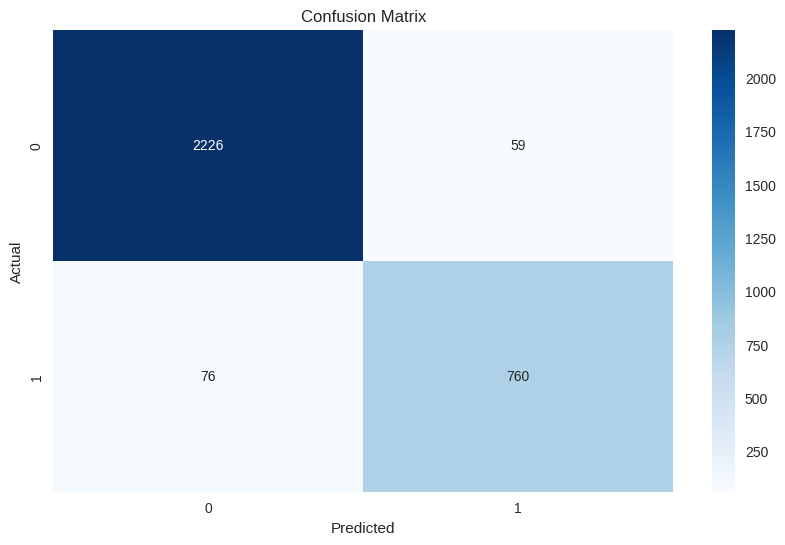

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier(n_estimators=10, criterion='entropy', random_state=0)

#Train the model using the training sets
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test.fillna(0))

model_result(y_test,y_pred, version='ExtraTreesClassifier_entropy')

roc_auc_score :  0.9469012071655167
accuracy_score:  0.9583466837552067
precision_score:  0.9222488038277512
recall_score:  0.9222488038277512
f1-score : 0.9222488038277511
confusion_matrix:  [[2220   65]
 [  65  771]]

confusion_matrix



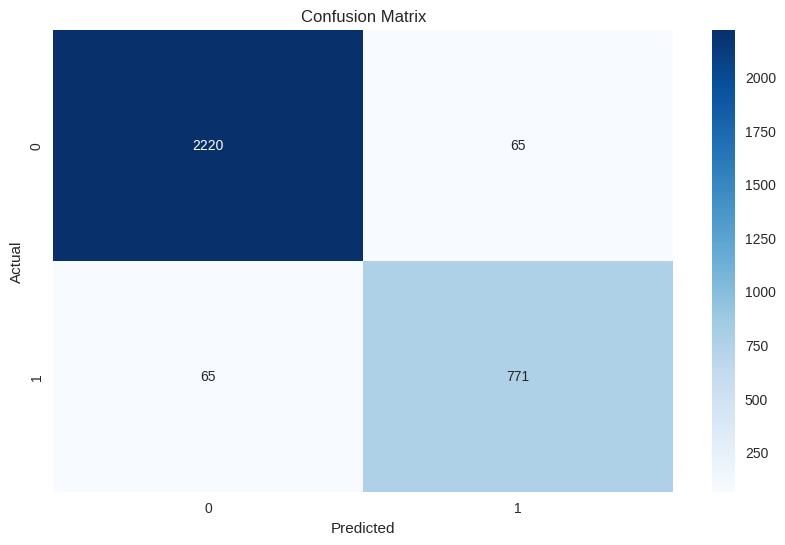

In [ ]:
from sklearn.ensemble import RandomForestClassifier


random_forest_clf = RandomForestClassifier(max_depth=20)
#Train the model using the training sets
random_forest_clf.fit(x_train, y_train)
y_pred = random_forest_clf.predict(x_test.fillna(0))
model_result(y_test,y_pred, version='RandomForestClassifier')

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 9.1 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

# initializing the model
cbc = CatBoostClassifier(iterations=100, max_depth=16)

# training the model
cbc.fit(x_train, y_train)
y_pred = cbc.predict(x_test)

model_result(y_test,y_pred, version='CatBoostClassifier')

roc_auc_score :  0.9402926826714688
accuracy_score:  0.9420057673822493
precision_score:  0.8594950603732162
recall_score:  0.9366028708133971
f1-score : 0.8963938179736692
confusion_matrix:  [[2157  128]
 [  53  783]]

confusion_matrix



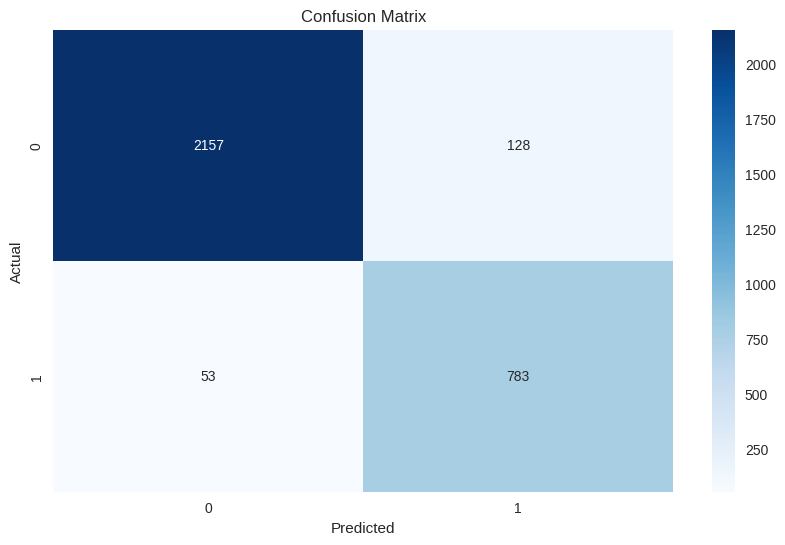

In [ ]:
import xgboost as xgb

xgb_cl = xgb.XGBClassifier()

xgb_cl.fit(x_train, y_train)

y_pred = xgb_cl.predict(x_test)

model_result(y_test,y_pred, version='XGBClassifier')

In [ ]:
x_train

,depth,title_content_intersection_ratio,words in content
2,-0.564734,0.833333,-0.252716
2,-0.564734,1.000000,0.754851
3,-0.564734,0.727273,0.006880
4,-0.564734,0.210526,0.484123
3,-0.564734,0.222222,2.703460
...,...,...,...
6,-0.973146,0.025000,3.975588
12,-0.156322,0.111111,-0.161370
6,2.294150,0.200000,-0.125693
3,-0.564734,1.000000,0.206567


In [ ]:
xgb_cl.feature_importances_

array([0.87145114, 0.11311559, 0.01543328], dtype=float32)

roc_auc_score :  0.8528551087286548
accuracy_score:  0.8856135853892984
precision_score:  0.7889022919179735
recall_score:  0.7822966507177034
f1-score : 0.7855855855855856
confusion_matrix:  [[2110  175]
 [ 182  654]]

confusion_matrix



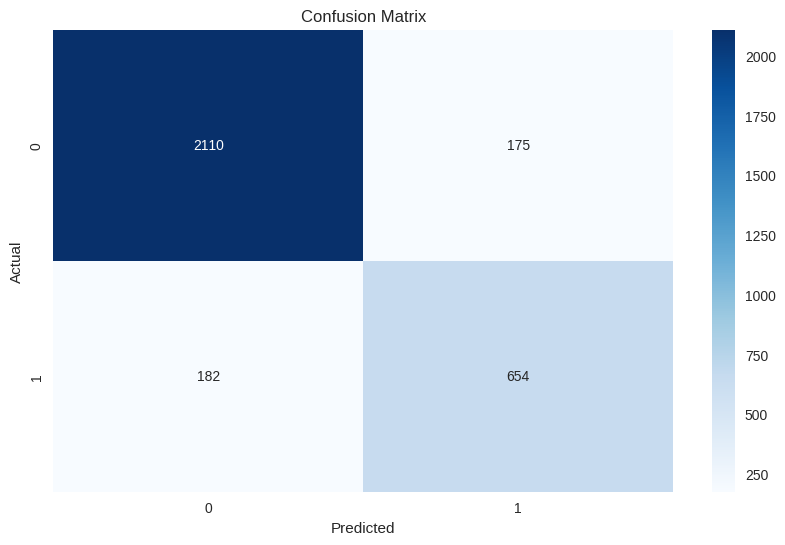

In [ ]:
from sklearn.svm import SVC
# define outlier detection model
svm_model = SVC()
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)

model_result(y_test,y_pred, version='XGBClassifier')